<a href="https://colab.research.google.com/github/HaoYu2024/COVID-19-PREDICTION-PROJECT/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Capstone Project Code
*Author: Sizhang Lyu*

# Preprocesssing & Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
brand_df = pd.read_csv('/content/drive/MyDrive/Capstone/Product List_clean_03_07 - Sheet1.csv')
venue_df = pd.read_csv('/content/drive/MyDrive/Capstone/venues-21-03-25.csv')
brand_df.head()

,Product,Price,ABV,URL,UK Distributor,UK Distributor_Label,Price_Tag,Description
0,MR L'S 1930'S COSMO 15% 70CL,£ 12.48,15.00%,https://www.mrlcocktails.com/1930s-cosmo/,NaN,0,Value,NaN
1,MR L'S PINA COLADA 15% 70CL,£ 12.48,15.00%,https://www.mrlcocktails.com/pina-colada/,NaN,0,Value,NaN
2,MR L'S PORNSTAR MARTINI 15% 70CL,£ 12.48,15.00%,https://www.mrlcocktails.com/prnstar-martini/,NaN,0,Value,NaN
3,MR L'S WHISKEY SOUR 15% 70CL,£ 12.60,15.00%,https://www.mrlcocktails.com/whiskey-sour/,NaN,0,Value,NaN
4,MR L'S ESPRESSO MARTINI 15% 70CL,£ 12.42,15.00%,NaN,NaN,0,Value,NaN


In [ ]:
venue_df.head()

,id,name,telephone,instagram_handle,facebook_handle,twitter_handle,website,category,subcategory,cuisine,...,venue_group_id,venue_group_name,venue_group_website,venue_group_telephone,venue_group_email,venue_group_instagram_handle,venue_group_facebook_handle,venue_group_tiktok_handle,venue_group_linkedin_slug,description
0,d38ee979-bff1-4759-a925-75e26926ba23,£2 Pizza Slice,+44 131 237 5429,NaN,2pizzaslice,NaN,https://2pizzaslice.com/,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1b1be255-9869-47a7-8153-1e2297ec661c,0161 Burger,+44 161 637 5775,0161flamingrill,0161burger,NaN,https://0161burger.co.uk/?utm_source=GMBwebsit...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e537c7ca-4106-4a2a-873a-875dbd8ab144,01 Adana Restaurant,+44 20 7359 4911,explore/locations/229377155/01-adana-restaurant,01AdanaRestaurant,NaN,http://linktr.ee/01adana,Restaurant,Casual Dining,Turkish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4d6761cb-53d5-46aa-b57e-b68765ac80d1,01 Cafe Bar & Lounge,+44 7305 629493,NaN,NaN,NaN,NaN,Restaurant,Cafe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ff6db206-e0b3-421f-967a-823d2f446e12,01 PIZZA,01502 819775,NaN,p/01-Pizza-Beccles-61556765544562,NaN,http://www.01pizzaonline.com/,Restaurant,Fast Casual,Pizza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
brand_df = brand_df[['Product', 'URL', 'Price_Tag']]
venue_df = venue_df[['name', 'website', 'category', 'subcategory', 'cuisine']]
venue_df.head()

,name,website,category,subcategory,cuisine
0,£2 Pizza Slice,https://2pizzaslice.com/,NaN,NaN,NaN
1,0161 Burger,https://0161burger.co.uk/?utm_source=GMBwebsit...,NaN,NaN,NaN
2,01 Adana Restaurant,http://linktr.ee/01adana,Restaurant,Casual Dining,Turkish
3,01 Cafe Bar & Lounge,NaN,Restaurant,Cafe,NaN
4,01 PIZZA,http://www.01pizzaonline.com/,Restaurant,Fast Casual,Pizza


In [ ]:
mask_venue = pd.isna(venue_df[['website']]).all(axis=1)
mask_brand = pd.isna(brand_df[['URL']]).all(axis=1)
brand_df = brand_df[~mask_brand]
venue_df = venue_df[~mask_venue]
brand_df.reset_index(inplace=True, drop=True)
venue_df.reset_index(inplace=True, drop=True)
venue_df.head()

,name,website,category,subcategory,cuisine
0,£2 Pizza Slice,https://2pizzaslice.com/,NaN,NaN,NaN
1,0161 Burger,https://0161burger.co.uk/?utm_source=GMBwebsit...,NaN,NaN,NaN
2,01 Adana Restaurant,http://linktr.ee/01adana,Restaurant,Casual Dining,Turkish
3,01 PIZZA,http://www.01pizzaonline.com/,Restaurant,Fast Casual,Pizza
4,042 Lounge London,http://www.042loungelondon.co.uk/,Bars,Nightclub,NaN


In [ ]:
# Make sure you have url2text.py in your folder!
import sys
sys.path.insert(0,'/content/drive/MyDrive/Capstone')
from url2text import get_relevant_text

In [ ]:
# These URL will cause the function to get stuck, so remove
brand_df = brand_df[brand_df.URL != 'https://www.oneloverum.com/']
brand_df.reset_index(inplace=True, drop=True)
venue_df = venue_df[venue_df.website != 'http://www.90boldmere.co.uk/']
venue_df = venue_df[~venue_df['website'].str.contains('20%', na=False)]
venue_df.reset_index(inplace=True, drop=True)

In [ ]:
brand_txt = []
for url in brand_df['URL']:
  brand_txt.append(get_relevant_text(url))

Fetching URL: https://www.mrlcocktails.com/1930s-cosmo/
Successfully extracted text from https://www.mrlcocktails.com/1930s-cosmo/
Fetching URL: https://www.mrlcocktails.com/pina-colada/
Successfully extracted text from https://www.mrlcocktails.com/pina-colada/
Fetching URL: https://www.mrlcocktails.com/prnstar-martini/
Successfully extracted text from https://www.mrlcocktails.com/prnstar-martini/
Fetching URL: https://www.mrlcocktails.com/whiskey-sour/
Successfully extracted text from https://www.mrlcocktails.com/whiskey-sour/
Fetching URL: https://distilleduk.com/spirits/highland-poacher/
Successfully extracted text from https://distilleduk.com/spirits/highland-poacher/
Fetching URL: https://ahascraghdistillery.com/pages/uais-irish-whiskey
Successfully extracted text from https://ahascraghdistillery.com/pages/uais-irish-whiskey
Fetching URL: https://amrutdistilleries.com/limited-edition/
Successfully extracted text from https://amrutdistilleries.com/limited-edition/
Fetching URL: htt

Error fetching https://theforestdistillery.com/product/forest-whisky-blend-number-twenty-six-3/?srsltid=AfmBOormYbTBE2RK7ix0fQ1VzyAbv7HpEOkoKVxAOjrCvkZxsLmUBfne: HTTPSConnectionPool(host='theforestdistillery.com', port=443): Max retries exceeded with url: /product/forest-whisky-blend-number-twenty-six-3/?srsltid=AfmBOormYbTBE2RK7ix0fQ1VzyAbv7HpEOkoKVxAOjrCvkZxsLmUBfne (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.jackdaniels.com/en-gb/our-products
Successfully extracted text from https://www.jackdaniels.com/en-gb/our-products
Fetching URL: https://scotchwhisky.com/whiskypedia/2323/black-bottle/
Successfully extracted text from https://scotchwhisky.com/whiskypedia/2323/black-bottle/
Fetching URL: https://www.grantswhisky.com/en/
Successfully extracted text from https://www.grantswhisky.com/en/
Fetching URL: https://www.haigwhisky.com/haig-club-scotch-whisky/
Successfully extracted text from

Error fetching https://www.tullamoredew.com/en-gb/: HTTPSConnectionPool(host='www.tullamoredew.com', port=443): Max retries exceeded with url: /en-gb/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))


Fetching URL: https://www.tullamoredew.com/en-gb/


Error fetching https://www.tullamoredew.com/en-gb/: HTTPSConnectionPool(host='www.tullamoredew.com', port=443): Max retries exceeded with url: /en-gb/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))


Fetching URL: https://www.tullamoredew.com/en-gb/


Error fetching https://www.tullamoredew.com/en-gb/: HTTPSConnectionPool(host='www.tullamoredew.com', port=443): Max retries exceeded with url: /en-gb/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))
Fetching URL: https://whyteandmackay.com/
Successfully extracted text from https://whyteandmackay.com/
Fetching URL: https://www.woodfordreserve.com/
Successfully extracted text from https://www.woodfordreserve.com/
Fetching URL: https://www.aberfeldy.com/
Successfully extracted text from https://www.aberfeldy.com/
Fetching URL: https://www.aberfeldy.com/
Successfully extracted text from https://www.aberfeldy.com/
Fetching URL: https://www.aberlour.com/en/
Error fetching https://www.aberlour.com/en/: 403 Client Error: Forbidden for url: https://www.aberlour.com/en/
Fetching URL: https://www.aberlour.com/en/
Error fetching https://www.aberlour.com/en/: 403 Client Error: Forbi

Error fetching https://glenfarclas.com/whisky/: HTTPSConnectionPool(host='glenfarclas.com', port=443): Max retries exceeded with url: /whisky/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.glenfiddich.com/
Successfully extracted text from https://www.glenfiddich.com/
Fetching URL: https://www.glenfiddich.com/
Successfully extracted text from https://www.glenfiddich.com/
Fetching URL: https://www.glenfiddich.com/
Successfully extracted text from https://www.glenfiddich.com/
Fetching URL: https://www.glenfiddich.com/
Successfully extracted text from https://www.glenfiddich.com/
Fetching URL: https://www.glenfiddich.com/
Successfully extracted text from https://www.glenfiddich.com/
Fetching URL: https://www.glenfiddich.com/
Successfully extracted text from https://www.glenfiddich.com/
Fetching URL: https://www.glenfiddich.com/en-gb/
Successfully extracted text from https://www.glenfiddich.com

Error fetching https://theforestdistillery.com/product/forest-whisky-limited-release-single-malt-english-whisky-70cl/?srsltid=AfmBOopbG5Zqu8Qq2wt2aBAAztMU8DhaZteF-qCKpIGZb1gCfJh6WQ-d: HTTPSConnectionPool(host='theforestdistillery.com', port=443): Max retries exceeded with url: /product/forest-whisky-limited-release-single-malt-english-whisky-70cl/?srsltid=AfmBOopbG5Zqu8Qq2wt2aBAAztMU8DhaZteF-qCKpIGZb1gCfJh6WQ-d (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.aberfallsdistillery.com/
Successfully extracted text from https://www.aberfallsdistillery.com/
Fetching URL: https://www.courvoisier.com/en-gb/
Successfully extracted text from https://www.courvoisier.com/en-gb/
Fetching URL: https://www.nectar.net/product/lou002/louis-royer-vs-cognac#
Successfully extracted text from https://www.nectar.net/product/lou002/louis-royer-vs-cognac#
Fetching URL: https://akashisakebrewery.com/brands/135-east/

Error fetching https://www.boatyarddistillery.com/: HTTPSConnectionPool(host='www.boatyarddistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.boatyarddistillery.com/


Error fetching https://www.boatyarddistillery.com/: HTTPSConnectionPool(host='www.boatyarddistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.houseofboe.com/
Successfully extracted text from https://www.houseofboe.com/
Fetching URL: https://www.houseofboe.com/
Successfully extracted text from https://www.houseofboe.com/
Fetching URL: https://www.houseofboe.com/
Successfully extracted text from https://www.houseofboe.com/
Fetching URL: https://www.houseofboe.com/
Successfully extracted text from https://www.houseofboe.com/
Fetching URL: https://www.houseofboe.com/
Successfully extracted text from https://www.houseofboe.com/
Fetching URL: https://www.houseofboe.com/
Successfully extracted text from https://www.houseofboe.com/
Fetching URL: https://www.npbbrands.com/bogart-spirits/
Successfully extracted text from https://www.npbbrands.co

Error fetching https://bwhdrinks.co.uk/?product=colonel-foxs-gin: HTTPSConnectionPool(host='bwhdrinks.co.uk', port=443): Max retries exceeded with url: /?product=colonel-foxs-gin (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.copperhead.be/
Successfully extracted text from https://www.copperhead.be/
Fetching URL: https://www.copperhead.be/
Successfully extracted text from https://www.copperhead.be/
Fetching URL: https://www.copperhead.be/
Successfully extracted text from https://www.copperhead.be/
Fetching URL: https://www.copperhead.be/
Successfully extracted text from https://www.copperhead.be/
Fetching URL: https://www.cotswoldsdistillery.com/
Successfully extracted text from https://www.cotswoldsdistillery.com/
Fetching URL: https://www.cotswoldsdistillery.com/
Successfully extracted text from https://www.cotswoldsdistillery.com/
Fetching URL: https://www.craftersgin.com/
Successfully e

Error fetching https://xoriguer.es/en/: HTTPSConnectionPool(host='xoriguer.es', port=443): Max retries exceeded with url: /en/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.ginraw.com/en/madness-for-perfection-en/
Successfully extracted text from https://www.ginraw.com/en/madness-for-perfection-en/
Fetching URL: https://theglasgowgin.com/
Successfully extracted text from https://theglasgowgin.com/
Fetching URL: https://glaswegin.com/
Successfully extracted text from https://glaswegin.com/
Fetching URL: https://www.newyorkcraftspirits.com/products/breuckelen-distilling-glorious-gin?srsltid=AfmBOop23uIGy2EPROonHskl89PomLXH6GVd9h0W5hV-LvSy1xMpwzQg
Successfully extracted text from https://www.newyorkcraftspirits.com/products/breuckelen-distilling-glorious-gin?srsltid=AfmBOop23uIGy2EPROonHskl89PomLXH6GVd9h0W5hV-LvSy1xMpwzQg
Fetching URL: https://www.gordonsgin.com/es-es/inicio/
Successfully ext

Error fetching http://www.bermondseygin.com/: HTTPSConnectionPool(host='www.bermondseygin.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Fetching URL: http://www.bermondseygin.com/


Error fetching http://www.bermondseygin.com/: HTTPSConnectionPool(host='www.bermondseygin.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Fetching URL: https://www.jimandtonic.com/
Successfully extracted text from https://www.jimandtonic.com/
Fetching URL: https://www.jimandtonic.com/
Successfully extracted text from https://www.jimandtonic.com/
Fetching URL: https://www.kinobigin.com/en/products/ki-no-bi/
Error fetching https://www.kinobigin.com/en/products/ki-no-bi/: 403 Client Error: Forbidden for url: https://www.kinobigin.com/en/products/ki-no-bi/
Fetching URL: https://spiritofsoho.com/
Successfully extracted text from https://spiritofsoho.com/
Fetching URL: https://kokorogin.com/shop/
Successfully extracted text from https://kokorogin.com/shop/
Fetching URL: https://kokorogin.com/shop/
Successfully extracted text from https://kok

Fetching URL: https://www.langleysgin.com/


Error fetching https://www.langleysgin.com/: HTTPSConnectionPool(host='www.langleysgin.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.leopoldbros.com/
Fetching URL: https://liverpoolgindistillery.com/collections/core-gin-range
Successfully extracted text from https://liverpoolgindistillery.com/collections/core-gin-range
Fetching URL: https://www.locksleydistilling.com/
Successfully extracted text from https://www.locksleydistilling.com/
Fetching URL: https://www.locksleydistilling.com/
Successfully extracted text from https://www.locksleydistilling.com/
Fetching URL: https://thelondon1.com/
Successfully extracted text from https://thelondon1.com/
Fetching URL: https://www.lonewolfgin.com/
Successfully extracted text from https://www.lonewolfgin.com/
Fetching URL: https://www.lonewolfgin.com/
Successfully extracted text from https://www.lonew

Error fetching https://audemus-spirits.com/spirits/: HTTPSConnectionPool(host='audemus-spirits.com', port=443): Max retries exceeded with url: /spirits/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.pinkstergin.com/
Successfully extracted text from https://www.pinkstergin.com/
Fetching URL: https://www.pinkstergin.com/
Successfully extracted text from https://www.pinkstergin.com/
Fetching URL: https://www.pinkstergin.com/
Successfully extracted text from https://www.pinkstergin.com/
Fetching URL: https://www.pistondistillery.com/
Successfully extracted text from https://www.pistondistillery.com/
Fetching URL: https://www.pistondistillery.com/
Successfully extracted text from https://www.pistondistillery.com/
Fetching URL: https://www.pistondistillery.com/
Successfully extracted text from https://www.pistondistillery.com/
Fetching URL: https://www.plymouthgin.com/
Error fetching https://www

Error fetching https://rosemulliondistillery.com/product-category/cornish-gin/: HTTPSConnectionPool(host='rosemulliondistillery.com', port=443): Max retries exceeded with url: /product-category/cornish-gin/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://rosemulliondistillery.com/product-category/cornish-gin/


Error fetching https://rosemulliondistillery.com/product-category/cornish-gin/: HTTPSConnectionPool(host='rosemulliondistillery.com', port=443): Max retries exceeded with url: /product-category/cornish-gin/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://rosemulliondistillery.com/product-category/cornish-gin/


Error fetching https://rosemulliondistillery.com/product-category/cornish-gin/: HTTPSConnectionPool(host='rosemulliondistillery.com', port=443): Max retries exceeded with url: /product-category/cornish-gin/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://rosemulliondistillery.com/product-category/cornish-gin/


Error fetching https://rosemulliondistillery.com/product-category/cornish-gin/: HTTPSConnectionPool(host='rosemulliondistillery.com', port=443): Max retries exceeded with url: /product-category/cornish-gin/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://ruddyfine.co.uk/


Error fetching https://ruddyfine.co.uk/: HTTPSConnectionPool(host='ruddyfine.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://ruddyfine.co.uk/


Error fetching https://ruddyfine.co.uk/: HTTPSConnectionPool(host='ruddyfine.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.rutte.com/
Successfully extracted text from https://www.rutte.com/
Fetching URL: https://sacredgin.com/
Successfully extracted text from https://sacredgin.com/
Fetching URL: https://sacredgin.com/
Successfully extracted text from https://sacredgin.com/
Fetching URL: https://boudier.com/en/gin-vodka/25-saffron-gin-3252560600047.html
Successfully extracted text from https://boudier.com/en/gin-vodka/25-saffron-gin-3252560600047.html
Fetching URL: https://salcombegin.com/
Successfully extracted text from https://salcombegin.com/
Fetching URL: https://vedrenne.fr/en/salers/
Successfully extracted text from https://vedrenne.fr/en/salers/
Fetching URL: https://scapegracedistillery.com/
Successfully extracted text from https:

Fetching URL: https://angleseyrum.com/


Error fetching https://angleseyrum.com/: HTTPSConnectionPool(host='angleseyrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aba93710>: Failed to resolve 'angleseyrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.angostura.com/
Successfully extracted text from https://www.angostura.com/
Fetching URL: https://www.bacardi.com/uk/en/our-rums/bacardi-reserva-ocho/
Error fetching https://www.bacardi.com/uk/en/our-rums/bacardi-reserva-ocho/: 404 Client Error: Not Found for url: https://www.bacardi.com/uk/en/our-rums/bacardi-reserva-ocho/
Fetching URL: https://www.bacardi.com/uk/en/our-rums/bacardi-carta-blanca/
Error fetching https://www.bacardi.com/uk/en/our-rums/bacardi-carta-blanca/: 404 Client Error: Not Found for url: https://www.bacardi.com/uk/en/our-rums/bacardi-carta-blanca/
Fetching URL: https://www.bacardi.com/uk/en/our-rums/bacardi-carta-blanca/
Error fetching https:/

Error fetching https://www.clairin.eu/: HTTPSConnectionPool(host='www.clairin.eu', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.clairin.eu'. (_ssl.c:1006)")))
Fetching URL: https://www.clairin.eu/


Error fetching https://www.clairin.eu/: HTTPSConnectionPool(host='www.clairin.eu', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.clairin.eu'. (_ssl.c:1006)")))
Fetching URL: https://www.clairin.eu/


Error fetching https://www.clairin.eu/: HTTPSConnectionPool(host='www.clairin.eu', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.clairin.eu'. (_ssl.c:1006)")))
Fetching URL: https://www.clairin.eu/


Error fetching https://www.clairin.eu/: HTTPSConnectionPool(host='www.clairin.eu', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.clairin.eu'. (_ssl.c:1006)")))
Fetching URL: https://www.clairin.eu/


Error fetching https://www.clairin.eu/: HTTPSConnectionPool(host='www.clairin.eu', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.clairin.eu'. (_ssl.c:1006)")))
Fetching URL: https://www.cockspurrum.com/
Error fetching https://www.cockspurrum.com/: 404 Client Error: Not Found for url: https://www.cockspurrum.com/


Fetching URL: https://www.cortezrum.com/


Error fetching https://www.cortezrum.com/: HTTPSConnectionPool(host='www.cortezrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab067b10>: Failed to resolve 'www.cortezrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.damoiseau.com/


Error fetching https://www.damoiseau.com/: HTTPSConnectionPool(host='www.damoiseau.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9aab17450>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: https://www.deadmansfingers.com/
Successfully extracted text from https://www.deadmansfingers.com/


Fetching URL: https://www.doorlysrum.com/


Error fetching https://www.doorlysrum.com/: HTTPSConnectionPool(host='www.doorlysrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aadf75d0>: Failed to resolve 'www.doorlysrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.thefatrumpirate.com/doorlys-3-year-old-white-rum
Error fetching https://www.thefatrumpirate.com/doorlys-3-year-old-white-rum: 404 Client Error: Not Found for url: https://thefatrumpirate.com/doorlys-3-year-old-white-rum


Fetching URL: https://www.dropworksdistillery.com/


Error fetching https://www.dropworksdistillery.com/: HTTPSConnectionPool(host='www.dropworksdistillery.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aacc08d0>: Failed to resolve 'www.dropworksdistillery.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.dropworksdistillery.com/


Error fetching https://www.dropworksdistillery.com/: HTTPSConnectionPool(host='www.dropworksdistillery.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab378d90>: Failed to resolve 'www.dropworksdistillery.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.dropworksdistillery.com/


Error fetching https://www.dropworksdistillery.com/: HTTPSConnectionPool(host='www.dropworksdistillery.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aac70810>: Failed to resolve 'www.dropworksdistillery.com' ([Errno -2] Name or service not known)"))
Fetching URL: Not Available
Error fetching Not Available: Invalid URL 'Not Available': No scheme supplied. Perhaps you meant https://Not Available?
Fetching URL: https://flordecana.com/
Successfully extracted text from https://flordecana.com/
Fetching URL: https://havana-club.com/en-ww/3-anos
Error fetching https://havana-club.com/en-ww/3-anos: 404 Client Error: Not Found for url: https://havana-club.com/en/3-anos
Fetching URL: https://www.houseofelrick.co.uk/
Successfully extracted text from https://www.houseofelrick.co.uk/
Fetching URL: https://hoxtonspirits.com/
Successfully extracted text from https://hoxtonspirits.com/


Fetching URL: https://www.jah45rum.com/


Error fetching https://www.jah45rum.com/: HTTPSConnectionPool(host='www.jah45rum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaeeb510>: Failed to resolve 'www.jah45rum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.kingston62.com/


Error fetching https://www.kingston62.com/: HTTPSConnectionPool(host='www.kingston62.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aae75590>: Failed to resolve 'www.kingston62.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.langsrum.com/
Successfully extracted text from https://www.langsrum.com/
Fetching URL: https://www.langsrum.com/
Successfully extracted text from https://www.langsrum.com/
Fetching URL: https://www.langsrum.com/
Successfully extracted text from https://www.langsrum.com/
Fetching URL: Not Available
Error fetching Not Available: Invalid URL 'Not Available': No scheme supplied. Perhaps you meant https://Not Available?
Fetching URL: https://www.legendario.com/en/elixir-de-cuba/
Successfully extracted text from https://www.legendario.com/en/elixir-de-cuba/
Fetching URL: https://www.legendario.com/en/anejo-blanco/
Error fetching https://www.legendario.com/en/an

Fetching URL: https://www.merchants-spirits.com/


Error fetching https://www.merchants-spirits.com/: HTTPSConnectionPool(host='www.merchants-spirits.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad97dd0>: Failed to resolve 'www.merchants-spirits.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.nusacanarum.com/


Error fetching https://www.nusacanarum.com/: HTTPSConnectionPool(host='www.nusacanarum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.nusacanarum.com'. (_ssl.c:1006)")))
Fetching URL: https://www.nusacanarum.com/


Error fetching https://www.nusacanarum.com/: HTTPSConnectionPool(host='www.nusacanarum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.nusacanarum.com'. (_ssl.c:1006)")))
Fetching URL: https://www.ronpampero.com/


Error fetching https://www.ronpampero.com/: HTTPSConnectionPool(host='www.ronpampero.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab3d64d0>: Failed to resolve 'www.ronpampero.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.pangeaspirits.com/


Error fetching https://www.pangeaspirits.com/: HTTPSConnectionPool(host='www.pangeaspirits.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaee86d0>: Failed to resolve 'www.pangeaspirits.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.passionfruitbellini.com/


Error fetching https://www.passionfruitbellini.com/: HTTPSConnectionPool(host='www.passionfruitbellini.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab3c8d90>: Failed to resolve 'www.passionfruitbellini.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.plantationrum.com/


Error fetching https://www.plantationrum.com/: HTTPSConnectionPool(host='www.plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://www.plantationrum.com/


Error fetching https://www.plantationrum.com/: HTTPSConnectionPool(host='www.plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://www.pullthepinrum.com/


Error fetching https://www.pullthepinrum.com/: HTTPSConnectionPool(host='www.pullthepinrum.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9aa00a5d0>, 'Connection to www.pullthepinrum.com timed out. (connect timeout=15)'))
Fetching URL: https://www.revivalrum.com/
Successfully extracted text from https://www.revivalrum.com/
Fetching URL: https://damoiseau.com/


Error fetching https://damoiseau.com/: HTTPSConnectionPool(host='damoiseau.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9ab0af1d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


Fetching URL: https://damoiseau.com/


Error fetching https://damoiseau.com/: HTTPSConnectionPool(host='damoiseau.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9aaeb2210>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: Not Available
Error fetching Not Available: Invalid URL 'Not Available': No scheme supplied. Perhaps you meant https://Not Available?
Fetching URL: https://www.ronpiet.com/
Successfully extracted text from https://www.ronpiet.com/
Fetching URL: https://rosemulliondistillery.com/


Error fetching https://rosemulliondistillery.com/: HTTPSConnectionPool(host='rosemulliondistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: https://www.rumbarjamaica.com/


Error fetching https://www.rumbarjamaica.com/: HTTPSConnectionPool(host='www.rumbarjamaica.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaf264d0>: Failed to resolve 'www.rumbarjamaica.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.rhum-saintjames.com/
Successfully extracted text from https://www.rhum-saintjames.com/
Fetching URL: https://tanduay.com/
Fetching URL: https://www.realmccoyrum.com/


Error fetching https://www.realmccoyrum.com/: HTTPSConnectionPool(host='www.realmccoyrum.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9aae5b290>, 'Connection to www.realmccoyrum.com timed out. (connect timeout=15)'))
Fetching URL: https://www.totirum.com/
Successfully extracted text from https://www.totirum.com/
Fetching URL: https://www.totirum.com/
Successfully extracted text from https://www.totirum.com/
Fetching URL: https://www.troisrivieres.com/
Error fetching https://www.troisrivieres.com/: 439 Client Error: status code 439 for url: https://www.troisrivieres.com/


Fetching URL: https://www.veritasrum.com/


Error fetching https://www.veritasrum.com/: HTTPSConnectionPool(host='www.veritasrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaeb3710>: Failed to resolve 'www.veritasrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://wildjac.co.uk/
Successfully extracted text from https://wildjac.co.uk/
Fetching URL: https://www.jwrayandnephew.com/
Successfully extracted text from https://www.jwrayandnephew.com/
Fetching URL: saintluciarums.com/rum/admiral-rodney-hms-formidable
Error fetching saintluciarums.com/rum/admiral-rodney-hms-formidable: Invalid URL 'saintluciarums.com/rum/admiral-rodney-hms-formidable': No scheme supplied. Perhaps you meant https://saintluciarums.com/rum/admiral-rodney-hms-formidable?
Fetching URL: saintluciarums.com/rum/admiral-rodney-hms-princessa
Error fetching saintluciarums.com/rum/admiral-rodney-hms-princessa: Invalid URL 'saintluciarums.com/rum/admiral-rod

Fetching URL: https://angleseyrumco.com


Error fetching https://angleseyrumco.com: HTTPSConnectionPool(host='angleseyrumco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaf81f90>: Failed to resolve 'angleseyrumco.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://angostura.com/our-brands/angostura-1787
Successfully extracted text from https://angostura.com/our-brands/angostura-1787
Fetching URL: angostura.com
Error fetching angostura.com: Invalid URL 'angostura.com': No scheme supplied. Perhaps you meant https://angostura.com?
Fetching URL: angostura.com
Error fetching angostura.com: Invalid URL 'angostura.com': No scheme supplied. Perhaps you meant https://angostura.com?
Fetching URL: https://appletonestate.com
Successfully extracted text from https://appletonestate.com
Fetching URL: appletonestate.com/en-us/the-selection/12-year-old-rare-casks
Error fetching appletonestate.com/en-us/the-selection/12-year-old-rare-casks:

Fetching URL: https://bountyrum.com


Error fetching https://bountyrum.com: HTTPSConnectionPool(host='bountyrum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://brugal-rum.com
Error fetching https://brugal-rum.com: 403 Client Error: Forbidden for url: https://brugal-rum.com/
Fetching URL: https://bumbu.com
Successfully extracted text from https://bumbu.com
Fetching URL: https://bumbu.com
Successfully extracted text from https://bumbu.com
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: https://cabalrum.com


Error fetching https://cabalrum.com: HTTPSConnectionPool(host='cabalrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'cabalrum.com'. (_ssl.c:1006)")))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: captainmorgan.com
Error fetching captainmorgan.com: Invalid URL 'captainmorgan.com': No scheme supplied. Perhaps you meant https://captainmorgan.com?


Fetching URL: https://compagniedindesrum.com


Error fetching https://compagniedindesrum.com: HTTPSConnectionPool(host='compagniedindesrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa8d9a50>: Failed to resolve 'compagniedindesrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://compagniedindesrum.com


Error fetching https://compagniedindesrum.com: HTTPSConnectionPool(host='compagniedindesrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa8d9710>: Failed to resolve 'compagniedindesrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://compagniedindesrum.com


Error fetching https://compagniedindesrum.com: HTTPSConnectionPool(host='compagniedindesrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab0289d0>: Failed to resolve 'compagniedindesrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://chairmansreserverum.com


Error fetching https://chairmansreserverum.com: HTTPSConnectionPool(host='chairmansreserverum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: chairmansreserve.com
Error fetching chairmansreserve.com: Invalid URL 'chairmansreserve.com': No scheme supplied. Perhaps you meant https://chairmansreserve.com?
Fetching URL: https://soggydollarrum.com
Successfully extracted text from https://soggydollarrum.com
Fetching URL: saintluciarums.com/rum/chairmans-reserve
Error fetching saintluciarums.com/rum/chairmans-reserve: Invalid URL 'saintluciarums.com/rum/chairmans-reserve': No scheme supplied. Perhaps you meant https://saintluciarums.com/rum/chairmans-reserve?
Fetching URL: cockspurrum.com
Error fetching cockspurrum.com: Invalid URL 'cockspurrum.com': No scheme supplied. Perhaps you meant https://cockspurrum.com?
Fetching URL: https://companero.com
Fetching URL:

Error fetching https://damoiseau.com: HTTPSConnectionPool(host='damoiseau.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9aa8f54d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


Fetching URL: https://damoiseau.com


Error fetching https://damoiseau.com: HTTPSConnectionPool(host='damoiseau.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9ab28ff50>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: damoiseau.com/en/our-rums/arranges/pink-guava
Error fetching damoiseau.com/en/our-rums/arranges/pink-guava: Invalid URL 'damoiseau.com/en/our-rums/arranges/pink-guava': No scheme supplied. Perhaps you meant https://damoiseau.com/en/our-rums/arranges/pink-guava?
Fetching URL: https://deadmansfingers.com
Successfully extracted text from https://deadmansfingers.com
Fetching URL: deadmansfingers.com
Error fetching deadmansfingers.com: Invalid URL 'deadmansfingers.com': No scheme supplied. Perhaps you meant https://deadmansfingers.com?
Fetching URL: https://deadmansfingers.com
Successfully extracted text from https://deadmansfingers.com
Fetching URL: https://ronbarcelo.com
Successfully extrac

Fetching URL: https://rlseale.com/doorlys


Error fetching https://rlseale.com/doorlys: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /doorlys (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad1ed10>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rlseale.com/doorlys


Error fetching https://rlseale.com/doorlys: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /doorlys (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab06ce90>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rlseale.com/doorlys


Error fetching https://rlseale.com/doorlys: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /doorlys (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad29550>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))
Fetching URL: rlseale.com
Error fetching rlseale.com: Invalid URL 'rlseale.com': No scheme supplied. Perhaps you meant https://rlseale.com?
Fetching URL: https://eastlondonliquorcompany.com
Successfully extracted text from https://eastlondonliquorcompany.com
Fetching URL: https://eastlondonliquorcompany.com
Successfully extracted text from https://eastlondonliquorcompany.com
Fetching URL: eldoradorum.com
Error fetching eldoradorum.com: Invalid URL 'eldoradorum.com': No scheme supplied. Perhaps you meant https://eldoradorum.com?
Fetching URL: eldoradorum.com
Error fetching eldoradorum.com: Invalid URL 'eldoradorum.com': No scheme supplied. Perhaps you meant https://eldoradorum.com?
Fetchi

Fetching URL: https://rlseale.com/foursquare


Error fetching https://rlseale.com/foursquare: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /foursquare (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa5f0590>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rlseale.com/foursquare


Error fetching https://rlseale.com/foursquare: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /foursquare (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa1ad3d0>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rlseale.com/foursquare


Error fetching https://rlseale.com/foursquare: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /foursquare (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa17abd0>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rlseale.com/foursquare


Error fetching https://rlseale.com/foursquare: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /foursquare (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa1b4e90>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rlseale.com/foursquare


Error fetching https://rlseale.com/foursquare: HTTPSConnectionPool(host='rlseale.com', port=443): Max retries exceeded with url: /foursquare (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa223650>: Failed to resolve 'rlseale.com' ([Errno -2] Name or service not known)"))
Fetching URL: goslingsrum.com
Error fetching goslingsrum.com: Invalid URL 'goslingsrum.com': No scheme supplied. Perhaps you meant https://goslingsrum.com?
Fetching URL: goslingsrum.com
Error fetching goslingsrum.com: Invalid URL 'goslingsrum.com': No scheme supplied. Perhaps you meant https://goslingsrum.com?
Fetching URL: https://goslingsrum.com
Successfully extracted text from https://goslingsrum.com
Fetching URL: goslingsrum.com
Error fetching goslingsrum.com: Invalid URL 'goslingsrum.com': No scheme supplied. Perhaps you meant https://goslingsrum.com?


Fetching URL: https://hampdenestaterum.com


Error fetching https://hampdenestaterum.com: HTTPSConnectionPool(host='hampdenestaterum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: https://hampdenestaterum.com


Error fetching https://hampdenestaterum.com: HTTPSConnectionPool(host='hampdenestaterum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: havana-club.com/en/7-anos
Error fetching havana-club.com/en/7-anos: Invalid URL 'havana-club.com/en/7-anos': No scheme supplied. Perhaps you meant https://havana-club.com/en/7-anos?
Fetching URL: havana-club.com
Error fetching havana-club.com: Invalid URL 'havana-club.com': No scheme supplied. Perhaps you meant https://havana-club.com?


Fetching URL: https://jaffacakedrinks.com


Error fetching https://jaffacakedrinks.com: HTTPSConnectionPool(host='jaffacakedrinks.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaceedd0>: Failed to resolve 'jaffacakedrinks.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://jah45rum.com


Error fetching https://jah45rum.com: HTTPSConnectionPool(host='jah45rum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad0d690>: Failed to resolve 'jah45rum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://kirkandsweeney.com
Fetching URL: lambsnavyrum.com
Error fetching lambsnavyrum.com: Invalid URL 'lambsnavyrum.com': No scheme supplied. Perhaps you meant https://lambsnavyrum.com?


Fetching URL: https://lazydogrum.com


Error fetching https://lazydogrum.com: HTTPSConnectionPool(host='lazydogrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aacb4090>: Failed to resolve 'lazydogrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: legendario.com/en/ron-anejo
Error fetching legendario.com/en/ron-anejo: Invalid URL 'legendario.com/en/ron-anejo': No scheme supplied. Perhaps you meant https://legendario.com/en/ron-anejo?
Fetching URL: legendario.com/en/ron-dorado
Error fetching legendario.com/en/ron-dorado: Invalid URL 'legendario.com/en/ron-dorado': No scheme supplied. Perhaps you meant https://legendario.com/en/ron-dorado?
Fetching URL: https://lostyearsrum.com
Successfully extracted text from https://lostyearsrum.com
Fetching URL: https://matusalem.com
Successfully extracted text from https://matusalem.com
Fetching URL: https://matusalem.com
Successfully extracted text from https://matusalem.com
Fetching UR

Fetching URL: https://mountgayrum.com


Error fetching https://mountgayrum.com: HTTPSConnectionPool(host='mountgayrum.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9aba9f3d0>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: mountgayrum.com
Error fetching mountgayrum.com: Invalid URL 'mountgayrum.com': No scheme supplied. Perhaps you meant https://mountgayrum.com?


Fetching URL: https://mountgayrum.com


Error fetching https://mountgayrum.com: HTTPSConnectionPool(host='mountgayrum.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9aba9c810>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: myerssrum.com
Error fetching myerssrum.com: Invalid URL 'myerssrum.com': No scheme supplied. Perhaps you meant https://myerssrum.com?
Fetching URL: https://nbrum.com
Successfully extracted text from https://nbrum.com
Fetching URL: https://deadmansfingers.com
Successfully extracted text from https://deadmansfingers.com
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not a

Fetching URL: https://ovdrum.com


Error fetching https://ovdrum.com: HTTPSConnectionPool(host='ovdrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab345f90>: Failed to resolve 'ovdrum.com' ([Errno -5] No address associated with hostname)"))
Fetching URL: https://oldj.com


Error fetching https://oldj.com: HTTPSConnectionPool(host='oldj.com', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='oldj.com', port=443): Read timed out. (read timeout=15)"))
Fetching URL: Not Available
Error fetching Not Available: Invalid URL 'Not Available': No scheme supplied. Perhaps you meant https://Not Available?
Fetching URL: pampero.com/en/our-rums/aniversario
Error fetching pampero.com/en/our-rums/aniversario: Invalid URL 'pampero.com/en/our-rums/aniversario': No scheme supplied. Perhaps you meant https://pampero.com/en/our-rums/aniversario?
Fetching URL: piratesgrog.com
Error fetching piratesgrog.com: Invalid URL 'piratesgrog.com': No scheme supplied. Perhaps you meant https://piratesgrog.com?
Fetching URL: piratesgrog.com
Error fetching piratesgrog.com: Invalid URL 'piratesgrog.com': No scheme supplied. Perhaps you meant https://piratesgrog.com?
Fetching URL: https://piratesgrogrum.com
Successfully extracted text from ht

Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: plantationrum.com/experience
Error fetching plantationrum.com/experience: Invalid URL 'plantationrum.com/experience': No scheme supplied. Perhaps you meant https://plantationrum.com/experience?
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: plantationrum.com
Error fetching plantationrum.com: Invalid URL 'plantationrum.com': No scheme supplied. Perhaps you meant https://plantationrum.com?
Fetching URL: https://plantationrum.com


Error fetching https://plantationrum.com: HTTPSConnectionPool(host='plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: https://masterofmalt.com
Error fetching https://masterofmalt.com: 403 Client Error: Forbidden for url: https://masterofmalt.com/
Fetching URL: https:/

Fetching URL: https://ronizalco.com


Error fetching https://ronizalco.com: HTTPSConnectionPool(host='ronizalco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab186a50>: Failed to resolve 'ronizalco.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://ronizalco.com


Error fetching https://ronizalco.com: HTTPSConnectionPool(host='ronizalco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad7f1d0>: Failed to resolve 'ronizalco.com' ([Errno -2] Name or service not known)"))
Fetching URL: ronzacapa.com
Error fetching ronzacapa.com: Invalid URL 'ronzacapa.com': No scheme supplied. Perhaps you meant https://ronzacapa.com?
Fetching URL: https://rosemulliondistillery.com


Error fetching https://rosemulliondistillery.com: HTTPSConnectionPool(host='rosemulliondistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?


Fetching URL: https://rummalecon.com


Error fetching https://rummalecon.com: HTTPSConnectionPool(host='rummalecon.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab22c7d0>: Failed to resolve 'rummalecon.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rumbarrum.com


Error fetching https://rumbarrum.com: HTTPSConnectionPool(host='rumbarrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aada3810>: Failed to resolve 'rumbarrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://rumbarrum.com


Error fetching https://rumbarrum.com: HTTPSConnectionPool(host='rumbarrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad7ecd0>: Failed to resolve 'rumbarrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: saintbenevolence.com
Error fetching saintbenevolence.com: Invalid URL 'saintbenevolence.com': No scheme supplied. Perhaps you meant https://saintbenevolence.com?
Fetching URL: rumsantateresa.com
Error fetching rumsantateresa.com: Invalid URL 'rumsantateresa.com': No scheme supplied. Perhaps you meant https://rumsantateresa.com?
Fetching URL: rumsantateresa.com
Error fetching rumsantateresa.com: Invalid URL 'rumsantateresa.com': No scheme supplied. Perhaps you meant https://rumsantateresa.com?
Fetching URL: rumsantateresa.com
Error fetching rumsantateresa.com: Invalid URL 'rumsantateresa.com': No scheme supplied. Perhaps you meant https://rumsantateresa.com?
Fetching URL: https://142

Fetching URL: https://sbsrum.com


Error fetching https://sbsrum.com: HTTPSConnectionPool(host='sbsrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab0d2ed0>: Failed to resolve 'sbsrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://sbsrum.com


Error fetching https://sbsrum.com: HTTPSConnectionPool(host='sbsrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab185dd0>: Failed to resolve 'sbsrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://1423.dk
Successfully extracted text from https://1423.dk
Fetching URL: https://1423.dk
Successfully extracted text from https://1423.dk
Fetching URL: https://sixsaintsrum.com


Error fetching https://sixsaintsrum.com: HTTPSConnectionPool(host='sixsaintsrum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.masterofmalt.com/rum/skipper-demerara-rum/
Error fetching https://www.masterofmalt.com/rum/skipper-demerara-rum/: 403 Client Error: Forbidden for url: https://www.masterofmalt.com/rum/skipper-demerara-rum/


Fetching URL: https://smithandcross.com


Error fetching https://smithandcross.com: HTTPSConnectionPool(host='smithandcross.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aae5dc50>: Failed to resolve 'smithandcross.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://soggydollarrum.com
Successfully extracted text from https://soggydollarrum.com


Fetching URL: https://soltarasco.com


Error fetching https://soltarasco.com: HTTPSConnectionPool(host='soltarasco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaf37190>: Failed to resolve 'soltarasco.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://soltarasco.com


Error fetching https://soltarasco.com: HTTPSConnectionPool(host='soltarasco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaf35d10>: Failed to resolve 'soltarasco.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://soltarasco.com


Error fetching https://soltarasco.com: HTTPSConnectionPool(host='soltarasco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaf34c50>: Failed to resolve 'soltarasco.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://soltarasco.com


Error fetching https://soltarasco.com: HTTPSConnectionPool(host='soltarasco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaea22d0>: Failed to resolve 'soltarasco.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://spytailrum.com


Error fetching https://spytailrum.com: HTTPSConnectionPool(host='spytailrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab22d0d0>: Failed to resolve 'spytailrum.com' ([Errno -5] No address associated with hostname)"))
Fetching URL: takamakarum.com
Error fetching takamakarum.com: Invalid URL 'takamakarum.com': No scheme supplied. Perhaps you meant https://takamakarum.com?
Fetching URL: https://tanduay.com
Fetching URL: https://tanduay.com
Fetching URL: https://tanduay.com
Fetching URL: https://therealmccoyrum.com
Successfully extracted text from https://therealmccoyrum.com
Fetching URL: https://therealmccoyrum.com
Successfully extracted text from https://therealmccoyrum.com
Fetching URL: https://therealmccoyrum.com
Successfully extracted text from https://therealmccoyrum.com
Fetching URL: troisrivieres.com/en/our-rums/vsop-reserve-speciale
Error fetching troisrivieres.com/en/our-rums/vsop-reserve-s

Fetching URL: https://admiralrodneyrum.com


Error fetching https://admiralrodneyrum.com: HTTPSConnectionPool(host='admiralrodneyrum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: https://angleseyrumco.com


Error fetching https://angleseyrumco.com: HTTPSConnectionPool(host='angleseyrumco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab52d350>: Failed to resolve 'angleseyrumco.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://angleseyrumco.com


Error fetching https://angleseyrumco.com: HTTPSConnectionPool(host='angleseyrumco.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9abed1490>: Failed to resolve 'angleseyrumco.com' ([Errno -2] Name or service not known)"))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?


Fetching URL: https://arcane-rum.com


Error fetching https://arcane-rum.com: HTTPSConnectionPool(host='arcane-rum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ac21be50>: Failed to resolve 'arcane-rum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://bayourum.com
Successfully extracted text from https://bayourum.com
Fetching URL: https://bayourum.com
Successfully extracted text from https://bayourum.com
Fetching URL: https://bayourum.com
Successfully extracted text from https://bayourum.com
Fetching URL: https://blackmagicrum.com
Successfully extracted text from https://blackmagicrum.com
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: https://burningbarnrum.com
Successfully extracted text from https://burningbarnrum.com
Fetching URL: https://burningbarnrum.com
Successfully extracted text from https://burni

Fetching URL: https://www.chairmansreserverum.com


Error fetching https://www.chairmansreserverum.com: HTTPSConnectionPool(host='www.chairmansreserverum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: https://www.chairmansreserverum.com


Error fetching https://www.chairmansreserverum.com: HTTPSConnectionPool(host='www.chairmansreserverum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: https://www.chairmansreserverum.com


Error fetching https://www.chairmansreserverum.com: HTTPSConnectionPool(host='www.chairmansreserverum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: https://www.chairmansreserverum.com


Error fetching https://www.chairmansreserverum.com: HTTPSConnectionPool(host='www.chairmansreserverum.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.rhum-clement.com
Successfully extracted text from https://www.rhum-clement.com
Fetching URL: https://www.cockspurrum.com
Error fetching https://www.cockspurrum.com: 404 Client Error: Not Found for url: https://www.cockspurrum.com/
Fetching URL: https://www.cockspurrum.com
Error fetching https://www.cockspurrum.com: 404 Client Error: Not Found for url: https://www.cockspurrum.com/
Fetching URL: https://www.cockspurrum.com
Error fetching https://www.cockspurrum.com: 404 Client Error: Not Found for url: https://www.cockspurrum.com/
Fetching URL: https://www.cockspurrum.com
Error fetching https://www.cockspurrum.com: 404 Client Error: Not Found for url: https://www.cockspurrum.com/
Fetching URL: htt

Fetching URL: https://www.devilspointrum.com


Error fetching https://www.devilspointrum.com: HTTPSConnectionPool(host='www.devilspointrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aad50bd0>: Failed to resolve 'www.devilspointrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.devilspointrum.com


Error fetching https://www.devilspointrum.com: HTTPSConnectionPool(host='www.devilspointrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9a9ff1950>: Failed to resolve 'www.devilspointrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.devilspointrum.com


Error fetching https://www.devilspointrum.com: HTTPSConnectionPool(host='www.devilspointrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa046f50>: Failed to resolve 'www.devilspointrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.diablesserum.co.uk
Successfully extracted text from https://www.diablesserum.co.uk
Fetching URL: https://www.diablesserum.co.uk
Successfully extracted text from https://www.diablesserum.co.uk
Fetching URL: https://www.discardedspirits.com
Successfully extracted text from https://www.discardedspirits.com
Fetching URL: https://www.donq.com
Successfully extracted text from https://www.donq.com
Fetching URL: https://www.donq.com
Successfully extracted text from https://www.donq.com
Fetching URL: https://www.donq.com
Successfully extracted text from https://www.donq.com
Fetching URL: https://www.donq.com
Successfully extracted text from https://www.

Fetching URL: https://www.elements-eight.com


Error fetching https://www.elements-eight.com: HTTPSConnectionPool(host='www.elements-eight.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa82ce90>: Failed to resolve 'www.elements-eight.com' ([Errno -2] Name or service not known)"))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?


Fetching URL: https://www.fallenangel.co


Error fetching https://www.fallenangel.co: HTTPSConnectionPool(host='www.fallenangel.co', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa0315d0>: Failed to resolve 'www.fallenangel.co' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.findersspirits.com


Error fetching https://www.findersspirits.com: HTTPSConnectionPool(host='www.findersspirits.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa767910>: Failed to resolve 'www.findersspirits.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.findersspirits.com


Error fetching https://www.findersspirits.com: HTTPSConnectionPool(host='www.findersspirits.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa810fd0>: Failed to resolve 'www.findersspirits.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.findersspirits.com


Error fetching https://www.findersspirits.com: HTTPSConnectionPool(host='www.findersspirits.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aaa4db10>: Failed to resolve 'www.findersspirits.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.foursquare-rum.com


Error fetching https://www.foursquare-rum.com: HTTPSConnectionPool(host='www.foursquare-rum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa56f8d0>: Failed to resolve 'www.foursquare-rum.com' ([Errno -2] Name or service not known)"))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available':

Fetching URL: https://www.gethooch.co.uk


Error fetching https://www.gethooch.co.uk: HTTPSConnectionPool(host='www.gethooch.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa932590>: Failed to resolve 'www.gethooch.co.uk' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.houseofelrick.co.uk
Successfully extracted text from https://www.houseofelrick.co.uk
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?


Fetching URL: https://www.jah45rum.com


Error fetching https://www.jah45rum.com: HTTPSConnectionPool(host='www.jah45rum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa1aecd0>: Failed to resolve 'www.jah45rum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.jah45rum.com


Error fetching https://www.jah45rum.com: HTTPSConnectionPool(host='www.jah45rum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa24f250>: Failed to resolve 'www.jah45rum.com' ([Errno -2] Name or service not known)"))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplie

Fetching URL: https://www.marketrowrum.com


Error fetching https://www.marketrowrum.com: HTTPSConnectionPool(host='www.marketrowrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa765150>: Failed to resolve 'www.marketrowrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.islandspirits.co.uk
Fetching URL: https://www.neptunerum.com
Successfully extracted text from https://www.neptunerum.com
Fetching URL: https://www.neptunerum.com
Successfully extracted text from https://www.neptunerum.com
Fetching URL: https://www.neptunerum.com
Successfully extracted text from https://www.neptunerum.com
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?


Fetching URL: https://www.oldjrum.com


Error fetching https://www.oldjrum.com: HTTPSConnectionPool(host='www.oldjrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab31ead0>: Failed to resolve 'www.oldjrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.oldjrum.com


Error fetching https://www.oldjrum.com: HTTPSConnectionPool(host='www.oldjrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa84b510>: Failed to resolve 'www.oldjrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.oldjrum.com


Error fetching https://www.oldjrum.com: HTTPSConnectionPool(host='www.oldjrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa483d90>: Failed to resolve 'www.oldjrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.oldjrum.com


Error fetching https://www.oldjrum.com: HTTPSConnectionPool(host='www.oldjrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa1ac710>: Failed to resolve 'www.oldjrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.oldjrum.com


Error fetching https://www.oldjrum.com: HTTPSConnectionPool(host='www.oldjrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa4826d0>: Failed to resolve 'www.oldjrum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.oldjrum.com


Error fetching https://www.oldjrum.com: HTTPSConnectionPool(host='www.oldjrum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab52ccd0>: Failed to resolve 'www.oldjrum.com' ([Errno -2] Name or service not known)"))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: https://www.oneeyedrebel.co.uk
Successfully extracted text from https://www.oneeyedrebel.co.uk
Fetching URL: https://www.oneeyedrebel.co.uk
Successfully extracted text from https://www.oneeyedrebel.co.uk
Fetching URL: https://www.oneeyedrebel.co.uk
Successfully extracted text from https://www.oneeyedrebel.co.uk
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not a

Error fetching https://www.plantationrum.com: HTTPSConnectionPool(host='www.plantationrum.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://www.pullthepinrum.com


Error fetching https://www.pullthepinrum.com: HTTPSConnectionPool(host='www.pullthepinrum.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9aacc3890>, 'Connection to www.pullthepinrum.com timed out. (connect timeout=15)'))
Fetching URL: https://www.pullthepinrum.com


Error fetching https://www.pullthepinrum.com: HTTPSConnectionPool(host='www.pullthepinrum.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9ab3d51d0>, 'Connection to www.pullthepinrum.com timed out. (connect timeout=15)'))
Fetching URL: https://www.pussersrum.com
Successfully extracted text from https://www.pussersrum.com
Fetching URL: https://www.redlegrum.com
Successfully extracted text from https://www.redlegrum.com
Fetching URL: https://www.redlegrum.com
Successfully extracted text from https://www.redlegrum.com
Fetching URL: https://www.redlegrum.com
Successfully extracted text from https://www.redlegrum.com
Fetching URL: https://www.revivalrum.co.uk
Fetching URL: https://www.rhumclement.com
Successfully extracted text from https://www.rhumclement.com
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fe

Error fetching https://www.rosemulliondistillery.com: HTTPSConnectionPool(host='www.rosemulliondistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.rosemulliondistillery.com


Error fetching https://www.rosemulliondistillery.com: HTTPSConnectionPool(host='www.rosemulliondistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.rosemulliondistillery.com


Error fetching https://www.rosemulliondistillery.com: HTTPSConnectionPool(host='www.rosemulliondistillery.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.rumting.com


Error fetching https://www.rumting.com: HTTPSConnectionPool(host='www.rumting.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aacc1f10>: Failed to resolve 'www.rumting.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://www.masterofmalt.com
Error fetching https://www.masterofmalt.com: 403 Client Error: Forbidden for url: https://www.masterofmalt.com/
Fetching URL: https://www.masterofmalt.com
Error fetching https://www.masterofmalt.com: 403 Client Error: Forbidden for url: https://www.masterofmalt.com/
Fetching URL: https://www.masterofmalt.com
Error fetching https://www.masterofmalt.com: 403 Client Error: Forbidden for url: https://www.masterofmalt.com/
Fetching URL: https://www.sailorjerry.com
Successfully extracted text from https://www.sailorjerry.com
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https:

Error fetching https://www.slydogrum.com: HTTPSConnectionPool(host='www.slydogrum.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9ab38dc90>, 'Connection to www.slydogrum.com timed out. (connect timeout=15)'))
Fetching URL: https://www.slydogrum.com


Error fetching https://www.slydogrum.com: HTTPSConnectionPool(host='www.slydogrum.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9aa22cd10>, 'Connection to www.slydogrum.com timed out. (connect timeout=15)'))
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?


Fetching URL: https://www.saintluciarum.com


Error fetching https://www.saintluciarum.com: HTTPSConnectionPool(host='www.saintluciarum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab364a10>: Failed to resolve 'www.saintluciarum.com' ([Errno -2] Name or service not known)"))


Fetching URL: https://www.saintluciarum.com


Error fetching https://www.saintluciarum.com: HTTPSConnectionPool(host='www.saintluciarum.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ac732b90>: Failed to resolve 'www.saintluciarum.com' ([Errno -2] Name or service not known)"))
Fetching URL: Master of Malt
Error fetching Master of Malt: Invalid URL 'Master of Malt': No scheme supplied. Perhaps you meant https://Master of Malt?
Fetching URL: Master of Malt
Error fetching Master of Malt: Invalid URL 'Master of Malt': No scheme supplied. Perhaps you meant https://Master of Malt?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not available': No scheme supplied. Perhaps you meant https://Not available?
Fetching URL: Not available
Error fetching Not available: Invalid URL 'Not availa

Error fetching http://www.1066chequers.com/: HTTPSConnectionPool(host='www.1066chequers.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))
Fetching URL: https://www.1066bakery.com/
Successfully extracted text from https://www.1066bakery.com/
Fetching URL: https://www.1066bakery.com/1066-cafe-priory-meadow-hastings
Successfully extracted text from https://www.1066bakery.com/1066-cafe-priory-meadow-hastings
Fetching URL: http://www.1066bakery.com/1066-cafe--conquest-hospital-hastings
Successfully extracted text from http://www.1066bakery.com/1066-cafe--conquest-hospital-hastings
Fetching URL: https://www.1066deli.co.uk/
Successfully extracted text from https://www.1066deli.co.uk/
Fetching URL: https://www.106bakerst.co.uk/
Successfully extracted text from https://www.106bakerst.co.uk/
Fetching URL: https://www.107diningroom.c

Error fetching http://www.10belowbeckenham.com/: HTTPConnectionPool(host='www.10belowbeckenham.com', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7bb9aa1cfdd0>, 'Connection to www.10belowbeckenham.com timed out. (connect timeout=15)'))
Fetching URL: http://www.bar10.co.uk/
Successfully extracted text from http://www.bar10.co.uk/
Fetching URL: 10castlestreet.com
Error fetching 10castlestreet.com: Invalid URL '10castlestreet.com': No scheme supplied. Perhaps you meant https://10castlestreet.com?
Fetching URL: appetiteforale.co.uk
Error fetching appetiteforale.co.uk: Invalid URL 'appetiteforale.co.uk': No scheme supplied. Perhaps you meant https://appetiteforale.co.uk?
Fetching URL: http://www.10diningstreet.co.uk/
Successfully extracted text from http://www.10diningstreet.co.uk/
Fetching URL: 10tiblane.com
Error fetching 10tiblane.com: Invalid URL '10tiblane.com': No scheme supplied. Perhaps you meant https://10t

Successfully extracted text from https://1498-thespiceaffair.co.uk
Fetching URL: https://149karaokeclub.com/
Successfully extracted text from https://149karaokeclub.com/
Fetching URL: http://www.14barandgrill.co.uk/
Successfully extracted text from http://www.14barandgrill.co.uk/
Fetching URL: https://14hills.co.uk
Successfully extracted text from https://14hills.co.uk
Fetching URL: http://www.14mileseast.co.uk/
Successfully extracted text from http://www.14mileseast.co.uk/
Fetching URL: http://www.14stanleystreet.co.uk/
Fetching URL: https://doubletree3.hilton.com/en/hotels/united-kingdom/doubletree-by-hilton-hotel-swindon-swihndi/dining/index.html
Error fetching https://doubletree3.hilton.com/en/hotels/united-kingdom/doubletree-by-hilton-hotel-swindon-swihndi/dining/index.html: 403 Client Error: Forbidden for url: https://doubletree3.hilton.com/en/hotels/united-kingdom/doubletree-by-hilton-hotel-swindon-swihndi/dining/index.html
Fetching URL: https://1580.co.uk/
Successfully extracte

Error fetching https://www.1751.co.uk/: HTTPSConnectionPool(host='www.1751.co.uk', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9ab438210>, 'Connection to www.1751.co.uk timed out. (connect timeout=15)'))
Fetching URL: https://instagram.com/175.balham
Error fetching https://instagram.com/175.balham: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2F175.balham%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Fetching URL: https://barnsdalerutland.com/eat/
Successfully extracted text from https://barnsdalerutland.com/eat/
Fetching URL: https://bristololdvic.org.uk/eat-drink
Successfully extracted text from https://bristololdvic.org.uk/eat-drink
Fetching URL: theinnatgrasmere.co.uk
Error fetching theinnatgrasmere.co.uk: Invalid URL 'theinnatgrasmere.co.uk': No scheme supplied. Perhaps you mean

Fetching URL: https://www.180barkitchen.co.uk


Error fetching https://www.180barkitchen.co.uk: HTTPSConnectionPool(host='www.180barkitchen.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.facebook.com/180SportsBar/
Error fetching https://www.facebook.com/180SportsBar/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2F180SportsBar%2F
Fetching URL: http://www.1810cafe.wordpress.com
Successfully extracted text from http://www.1810cafe.wordpress.com
Fetching URL: 1815bangor.co.uk
Error fetching 1815bangor.co.uk: Invalid URL '1815bangor.co.uk': No scheme supplied. Perhaps you meant https://1815bangor.co.uk?
Fetching URL: https://trentanddove.org/warm-spaces
Successfully extracted text from https://trentanddove.org/warm-spaces
Fetching URL: https://forestlodge.newforesthotels.co.uk/eat-and-drink
Successfully extracted text from https:

Fetching URL: https://1832barista.com/


Error fetching https://1832barista.com/: HTTPSConnectionPool(host='1832barista.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7bb9aa046590>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: https://www.clapham1833.co.uk/
Error fetching https://www.clapham1833.co.uk/: 404 Client Error: Not Found for url: https://www.clapham1833.co.uk/
Fetching URL: https://www.instagram.com/1841.coffee?igshid=MzMyNGUyNmU2YQ==
Error fetching https://www.instagram.com/1841.coffee?igshid=MzMyNGUyNmU2YQ==: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2F1841.coffee%2F%3Figshid%3DMzMyNGUyNmU2YQ%253D%253D&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Fetching URL: bar1842.co.uk
Error fetching bar1842.co.uk: Invalid URL 'bar1842.co.uk': No scheme supplied. Perhaps you meant h

Error fetching https://1903hootonpagnell.co.uk: HTTPSConnectionPool(host='1903hootonpagnell.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Fetching URL: bristolairport.co.uk
Error fetching bristolairport.co.uk: Invalid URL 'bristolairport.co.uk': No scheme supplied. Perhaps you meant https://bristolairport.co.uk?
Fetching URL: https://www.bristolairport.co.uk/at-the-airport/airport-lounges/1903-lounge/
Error fetching https://www.bristolairport.co.uk/at-the-airport/airport-lounges/1903-lounge/: 403 Client Error: Forbidden for url: https://www.bristolairport.co.uk/at-the-airport/airport-lounges/1903-lounge/
Fetching URL: https://www.manchesterairport.co.uk/at-the-airport/airport-lounges/1903-lounge/
Successfully extracted text from https://www.manchesterairport.co.uk/at-the-airport/airport-lounges/1903-lounge/
Fetching URL: https://ww

Error fetching http://www.1917chillcafe.co.uk/: HTTPConnectionPool(host='www.1917chillcafe.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: http://www.19-20.co.uk/
Successfully extracted text from http://www.19-20.co.uk/
Fetching URL: https://nineteen-twentyone.co.uk
Successfully extracted text from https://nineteen-twentyone.co.uk
Fetching URL: https://www.1922barandkitchen.co.uk/
Successfully extracted text from https://www.1922barandkitchen.co.uk/
Fetching URL: https://stbridget.uk/cafe/
Successfully extracted text from https://stbridget.uk/cafe/
Fetching URL: https://mymenuweb.com/uk/restaurants/716708/?utm_source=google_profile&utm_medium=google_profile&utm_campaign=admin
Successfully extracted text from https://mymenuweb.com/uk/restaurants/716708/?utm_source=google_profile&utm_medium=google_profile&utm_campaign=admin
Fetching URL: http://www.1932.b

Error fetching http://www.1932.bar/: HTTPConnectionPool(host='www.1932.bar', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://hisouthend.com/dining/1935-rooftop-restaurant-bar/
Successfully extracted text from https://hisouthend.com/dining/1935-rooftop-restaurant-bar/
Fetching URL: http://1947restaurant.co.uk/
Successfully extracted text from http://1947restaurant.co.uk/
Fetching URL: http://www.the50samericandiner.co.uk/
Successfully extracted text from http://www.the50samericandiner.co.uk/
Fetching URL: 1953restaurant.com
Error fetching 1953restaurant.com: Invalid URL '1953restaurant.com': No scheme supplied. Perhaps you meant https://1953restaurant.com?
Fetching URL: https://blcgroup.co.uk/activity/1955-kitchen-bar/
Successfully extracted text from https://blcgroup.co.uk/activity/1955-kitchen-bar/
Fetching URL: https://www.pandjlive.com/premium/195-ba

Error fetching http://www.1townhallsquare.com/: HTTPConnectionPool(host='www.1townhallsquare.com', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7bb9aa45e590>, 'Connection to www.1townhallsquare.com timed out. (connect timeout=15)'))
Fetching URL: https://www.1upcafe.co.uk/


Error fetching https://www.1upcafe.co.uk/: HTTPSConnectionPool(host='www.1upcafe.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.1upcafe.co.uk'. (_ssl.c:1006)")))
Fetching URL: https://www.1yorkplace.co.uk/
Successfully extracted text from https://www.1yorkplace.co.uk/
Fetching URL: https://200degs.com/pages/location-york-york-designer-outlet
Successfully extracted text from https://200degs.com/pages/location-york-york-designer-outlet
Fetching URL: https://200degs.com/mosley-street-manchester
Successfully extracted text from https://200degs.com/mosley-street-manchester
Fetching URL: https://200degs.com/
Successfully extracted text from https://200degs.com/
Fetching URL: https://200degs.com/sheffield-division-street
Successfully extracted text from https://200degs.com/sheffield-division-street
Fetching URL: https://200degs.

Error fetching https://www.hydesbrewery.com/venue/plough-inn/: HTTPSConnectionPool(host='www.hydesbrewery.com', port=443): Max retries exceeded with url: /venue/plough-inn/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: http://twopointzerocoffee.com/
Successfully extracted text from http://twopointzerocoffee.com/
Fetching URL: http://20stories.co.uk/
Successfully extracted text from http://20stories.co.uk/
Fetching URL: https://www.210bistro.com/
Successfully extracted text from https://www.210bistro.com/
Fetching URL: twoonetwolounge.com
Error fetching twoonetwolounge.com: Invalid URL 'twoonetwolounge.com': No scheme supplied. Perhaps you meant https://twoonetwolounge.com?
Fetching URL: https://www.215hackney.co.uk/
Successfully extracted text from https://www.215hackney.co.uk/
Fetching URL: https://21co.org.uk/
Successfully extracted text from https://21co.org.uk/
Fetching URL: https://foodhouseorien

Error fetching http://www.22clifton.com/: HTTPConnectionPool(host='www.22clifton.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: http://www.22club.co.uk/
Successfully extracted text from http://www.22club.co.uk/


Fetching URL: https://22pizzaandshakes.co.uk/


Error fetching https://22pizzaandshakes.co.uk/: HTTPSConnectionPool(host='22pizzaandshakes.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aadde8d0>: Failed to resolve '22pizzaandshakes.co.uk' ([Errno -5] No address associated with hostname)"))
Fetching URL: https://www.22thesquare.com/
Fetching URL: https://22ventidue.co.uk/
Successfully extracted text from https://22ventidue.co.uk/
Fetching URL: https://22yardswine.com/?utm_source=local&utm_medium=organic&utm_campaign=gmb
Successfully extracted text from https://22yardswine.com/?utm_source=local&utm_medium=organic&utm_campaign=gmb
Fetching URL: https://www.instagram.com/2323coffee/
Error fetching https://www.instagram.com/2323coffee/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2F2323coffee%2F&is_from_rle (Caused by ResponseError('too many 429 error r

Fetching URL: https://241pizzadenton.com/


Error fetching https://241pizzadenton.com/: HTTPSConnectionPool(host='241pizzadenton.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa337e10>: Failed to resolve '241pizzadenton.com' ([Errno -2] Name or service not known)"))
Fetching URL: http://www.yahyasdiner.co.uk/
Successfully extracted text from http://www.yahyasdiner.co.uk/
Fetching URL: http://www.247enterprises.co.uk/
Successfully extracted text from http://www.247enterprises.co.uk/
Fetching URL: http://www.247munchies.co.uk/
Successfully extracted text from http://www.247munchies.co.uk/
Fetching URL: https://24karatchippy.co.uk/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=Google%20My%20Business
Successfully extracted text from https://24karatchippy.co.uk/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=Google%20My%20Business
Fetching URL: https://24mocktails.com/
Successfully extracted text from https://24mocktails.com/
Fetchi

Error fetching http://cote-restaurants.co.uk: HTTPConnectionPool(host='cote-restaurants.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7bb9aaeb2090>, 'Connection to cote-restaurants.co.uk timed out. (connect timeout=15)'))
Fetching URL: https://www.2850.co.uk
Successfully extracted text from https://www.2850.co.uk
Fetching URL: https://www.2850.co.uk/maddox
Successfully extracted text from https://www.2850.co.uk/maddox
Fetching URL: http://www.barandwok.com/
Successfully extracted text from http://www.barandwok.com/
Fetching URL: https://28churchrow.com
Successfully extracted text from https://28churchrow.com
Fetching URL: https://28marketplace.co.uk/


Error fetching https://28marketplace.co.uk/: HTTPSConnectionPool(host='28marketplace.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for '28marketplace.co.uk'. (_ssl.c:1006)")))
Fetching URL: restaurantsnapshot.com
Error fetching restaurantsnapshot.com: Invalid URL 'restaurantsnapshot.com': No scheme supplied. Perhaps you meant https://restaurantsnapshot.com?
Fetching URL: https://www.29spicesuk.com/
Successfully extracted text from https://www.29spicesuk.com/
Fetching URL: https://29states.uk/
Successfully extracted text from https://29states.uk/
Fetching URL: http://29states.co.uk
Successfully extracted text from http://29states.co.uk
Fetching URL: https://www.2amici.org/
Successfully extracted text from https://www.2amici.org/
Fetching URL: https://www.2amicihipperholme.co.uk/
Successfully extracted text from https://www.2amicih

Error fetching https://2guyspizzasaltash.co.uk/: HTTPSConnectionPool(host='2guyspizzasaltash.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab3a14d0>: Failed to resolve '2guyspizzasaltash.co.uk' ([Errno -2] Name or service not known)"))
Fetching URL: https://2kitchen.co.uk/storemenu
Fetching URL: 2likeusbistro.co.uk
Error fetching 2likeusbistro.co.uk: Invalid URL '2likeusbistro.co.uk': No scheme supplied. Perhaps you meant https://2likeusbistro.co.uk?
Fetching URL: http://2lovecoffeehouse.co.uk/
Successfully extracted text from http://2lovecoffeehouse.co.uk/
Fetching URL: https://2lovecoffeehouse.co.uk/location/
Successfully extracted text from https://2lovecoffeehouse.co.uk/location/
Fetching URL: https://www.2manywines.uk
Successfully extracted text from https://www.2manywines.uk
Fetching URL: http://www.2mfood.co.uk
Fetching URL: https://2mtcafe.co.uk/
Successfully extracted text from https://2m

Error fetching http://2pldragon.blogsport.com/: HTTPSConnectionPool(host='exploreinquiry.com', port=443): Max retries exceeded with url: /sk-domsale.php?dom=blogsport.com&eds=dWx0cmFwcmVtZG9tYWluQHlhaG9vLmNvbQ%3D%3D&frsmnv=500&_isk_=6865&domdesgn=1&frslpid=9POW48UIF (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))
Fetching URL: http://www.2sardi.co.uk/
Successfully extracted text from http://www.2sardi.co.uk/
Fetching URL: https://www.plumgarths.co.uk/the-2-sisters-cafe/
Error fetching https://www.plumgarths.co.uk/the-2-sisters-cafe/: 404 Client Error: Not Found for url: https://www.plumgarths.co.uk/the-2-sisters-cafe/
Fetching URL: https://2sisterscafeandbistro.co.uk/
Successfully extracted text from https://2sisterscafeandbistro.co.uk/
Fetching URL: https://2spiceindian.co.uk/
Error fetching https://2spiceindian.co.uk/: 403 Client Error: Forbidden for url: https://2spi

Fetching URL: https://www.300spartans.co.uk/


Error fetching https://www.300spartans.co.uk/: HTTPSConnectionPool(host='www.300spartans.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa66d5d0>: Failed to resolve 'www.300spartans.co.uk' ([Errno -2] Name or service not known)"))
Fetching URL: http://30mexborough.uk/
Fetching URL: https://www.at31.co.uk/
Successfully extracted text from https://www.at31.co.uk/
Fetching URL: https://314kitchenandbar.co.uk/
Successfully extracted text from https://314kitchenandbar.co.uk/
Fetching URL: http://www.318sandwich-bar.co.uk/
Error fetching http://www.318sandwich-bar.co.uk/: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/?utm_source=318sandwich-bar.co.uk&utm_medium=microsites&utm_campaign=microsites
Fetching URL: http://31below.co.uk/
Successfully extracted text from http://31below.co.uk/
Fetching URL: https://www.31knotts.com/
Fetching URL: https://31thequay.co.uk
Successfully extracted te

Error fetching https://329cafelounge.com/: HTTPSConnectionPool(host='329cafelounge.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))
Fetching URL: https://329coffeehouse.co.uk


Error fetching https://329coffeehouse.co.uk: HTTPSConnectionPool(host='329coffeehouse.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_UNRECOGNIZED_NAME] tlsv1 unrecognized name (_ssl.c:1006)')))
Fetching URL: https://no33cafe.co.uk
Successfully extracted text from https://no33cafe.co.uk
Fetching URL: http://www.bar33cankstreet.com/
Successfully extracted text from http://www.bar33cankstreet.com/
Fetching URL: https://33greenbottles.co.uk/
Successfully extracted text from https://33greenbottles.co.uk/
Fetching URL: https://www.instagram.com/33s_theoldgrocerystore
Error fetching https://www.instagram.com/33s_theoldgrocerystore: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2F33s_theoldgrocerystore%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Fetching URL: https://web.dojo.app/create_booking/vendor/UxDIiUdmFQU9JU4mYjvz

Error fetching https://cliftonobservatory.com/bristolcoffeeshop-360cafe/: HTTPSConnectionPool(host='cliftonobservatory.com', port=443): Max retries exceeded with url: /bristolcoffeeshop-360cafe/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://cliftonobservatory.com/


Error fetching https://cliftonobservatory.com/: HTTPSConnectionPool(host='cliftonobservatory.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://360skyloungenewcastle.co.uk/
Successfully extracted text from https://360skyloungenewcastle.co.uk/
Fetching URL: http://www.363coffeelounge.co.uk/
Successfully extracted text from http://www.363coffeelounge.co.uk/
Fetching URL: 365bristol.com
Error fetching 365bristol.com: Invalid URL '365bristol.com': No scheme supplied. Perhaps you meant https://365bristol.com?
Fetching URL: https://www.365drinks.co.uk/?utm_source=GBM&utm_medium=google+my+business
Successfully extracted text from https://www.365drinks.co.uk/?utm_source=GBM&utm_medium=google+my+business


Fetching URL: http://366kilburn.co.uk/home.html


Error fetching http://366kilburn.co.uk/home.html: HTTPConnectionPool(host='366kilburn.co.uk', port=80): Max retries exceeded with url: /home.html (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7bb9aa791a90>: Failed to resolve '366kilburn.co.uk' ([Errno -2] Name or service not known)"))
Fetching URL: https://36bridgest.co.uk/
Successfully extracted text from https://36bridgest.co.uk/
Fetching URL: http://www.36onthequay.com/
Successfully extracted text from http://www.36onthequay.com/
Fetching URL: https://www.36streets.co.uk/
Fetching URL: https://www.corney-barrow.co.uk/bars/jewryst.html
Error fetching https://www.corney-barrow.co.uk/bars/jewryst.html: 404 Client Error: Not Found for url: https://www.corney-barrow.co.uk/bars/jewryst.html
Fetching URL: https://rafabognorregis.co.uk/?fbclid=IwY2xjawHqINdleHRuA2FlbQIxMAABHaJDI8Gvif5B0znoJSc3_cHG3oU60bTg2fSaoc3cNUDU3dpJUd_1WRWo6g_aem_QY68ZRZ3SdBC9w4-Pk9XuA
Successfully extracted text from https://rafabognor

Error fetching http://www.cafe3sixty.co.uk/: HTTPConnectionPool(host='www.cafe3sixty.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: 3sixtynewcastle.co.uk
Error fetching 3sixtynewcastle.co.uk: Invalid URL '3sixtynewcastle.co.uk': No scheme supplied. Perhaps you meant https://3sixtynewcastle.co.uk?
Fetching URL: http://3starsfishbar.placeweb.site
Successfully extracted text from http://3starsfishbar.placeweb.site
Fetching URL: https://3stpeters.com/
Successfully extracted text from https://3stpeters.com/
Fetching URL: https://www.3thirty.co.uk/
Successfully extracted text from https://www.3thirty.co.uk/
Fetching URL: http://www.3threescoffee.com


Error fetching http://www.3threescoffee.com: HTTPConnectionPool(host='www.3threescoffee.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7bb9ab15b890>: Failed to establish a new connection: [Errno 111] Connection refused'))
Fetching URL: http://www.400dc.co.uk/
Successfully extracted text from http://www.400dc.co.uk/
Fetching URL: https://400pizza.co.uk/
Successfully extracted text from https://400pizza.co.uk/
Fetching URL: https://400pizzahallgreen.co/
Successfully extracted text from https://400pizzahallgreen.co/
Fetching URL: https://400pizzakingstanding.co.uk/
Successfully extracted text from https://400pizzakingstanding.co.uk/
Fetching URL: https://www.400rabbits.co.uk/
Successfully extracted text from https://www.400rabbits.co.uk/
Fetching URL: https://400rabbits.co.uk
Successfully extracted text from https://400rabbits.co.uk
Fetching URL: http://www.fourhundredrabbits.co.uk/
Successfully extracted text

Error fetching https://coffeeandsweets.co.uk/: HTTPSConnectionPool(host='coffeeandsweets.co.uk', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9ab25bd10>, 'Connection to coffeeandsweets.co.uk timed out. (connect timeout=15)'))
Fetching URL: http://42ndeastbakehouse.com/
Successfully extracted text from http://42ndeastbakehouse.com/
Fetching URL: https://www.42ndeastbakehouse.com/
Successfully extracted text from https://www.42ndeastbakehouse.com/
Fetching URL: caffeineweymouth.co.uk
Error fetching caffeineweymouth.co.uk: Invalid URL 'caffeineweymouth.co.uk': No scheme supplied. Perhaps you meant https://caffeineweymouth.co.uk?
Fetching URL: https://www.442barandgrill.co.uk/
Successfully extracted text from https://www.442barandgrill.co.uk/
Fetching URL: https://www.44bamboo.uk/
Successfully extracted text from https://www.44bamboo.uk/
Fetching URL: http://44poets.co.uk/
Successfully extracted text from http

Error fetching https://www.47cafebar.co.uk/: HTTPSConnectionPool(host='www.47cafebar.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa367710>: Failed to resolve 'www.47cafebar.co.uk' ([Errno -2] Name or service not known)"))
Fetching URL: http://www.47musselrow.com/
Successfully extracted text from http://www.47musselrow.com/
Fetching URL: https://47thestreet.com/


Error fetching https://47thestreet.com/: HTTPSConnectionPool(host='47thestreet.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: http://www.49beans.co.uk/


Error fetching http://www.49beans.co.uk/: HTTPConnectionPool(host='www.49beans.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Fetching URL: http://www.49beans.co.uk/


Error fetching http://www.49beans.co.uk/: HTTPConnectionPool(host='www.49beans.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.view.co.uk/london/v/49-cafe
Successfully extracted text from https://www.view.co.uk/london/v/49-cafe
Fetching URL: https://www.instagram.com/49mortimerstreet?igsh=eGk1YTA2bHI1c2d0
Error fetching https://www.instagram.com/49mortimerstreet?igsh=eGk1YTA2bHI1c2d0: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2F49mortimerstreet%2F%3Figsh%3DeGk1YTA2bHI1c2d0&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Fetching URL: http://www.49socialclub.com/
Successfully extracted text from http://www.49socialclub.com/
Fetching URL: https://4aburger.co.uk/
Successfully extracted text from https://4aburger.co.uk/
Fetch

Error fetching http://www.4seasonskent.co.uk/: HTTPSConnectionPool(host='www.4seasonskent.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate (_ssl.c:1006)')))
Fetching URL: https://4seasonstakeaway.com/
Successfully extracted text from https://4seasonstakeaway.com/
Fetching URL: https://www.4thurlestone.co.uk/?utm_source=google&utm_medium=wix_google_business_profile&utm_campaign=2972592389789675172
Successfully extracted text from https://www.4thurlestone.co.uk/?utm_source=google&utm_medium=wix_google_business_profile&utm_campaign=2972592389789675172
Fetching URL: http://www.4wayzfastfood.co.uk/
Successfully extracted text from http://www.4wayzfastfood.co.uk/
Fetching URL: https://www.bath.ac.uk/locations/4w-cafe/
Successfully extracted text from https://www.bath.ac.uk/locations/4w-cafe/
Fetching URL: http://www.500restaurant.co.uk/
Successfully extracte

Error fetching https://500degrees.co/east-dulwich-ltd/: HTTPSConnectionPool(host='500degrees.co', port=443): Max retries exceeded with url: /east-dulwich-ltd/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa0b4290>: Failed to resolve '500degrees.co' ([Errno -2] Name or service not known)"))
Fetching URL: https://500degrees.co/brixton/


Error fetching https://500degrees.co/brixton/: HTTPSConnectionPool(host='500degrees.co', port=443): Max retries exceeded with url: /brixton/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa539190>: Failed to resolve '500degrees.co' ([Errno -2] Name or service not known)"))
Fetching URL: http://500degreeshernehill.co.uk/
Error fetching http://500degreeshernehill.co.uk/: HTTPConnectionPool(host='500degreeshernehill.co.uk', port=80): Max retries exceeded with url: / (Caused by ResponseError('too many 500 error responses'))
Fetching URL: https://500degreessliced.co.uk/
Successfully extracted text from https://500degreessliced.co.uk/
Fetching URL: https://theoddfellowsbar.co.uk


Error fetching https://theoddfellowsbar.co.uk: HTTPSConnectionPool(host='theoddfellowsbar.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'theoddfellowsbar.co.uk'. (_ssl.c:1006)")))
Fetching URL: http://www.508coffee.co.uk/
Successfully extracted text from http://www.508coffee.co.uk/
Fetching URL: https://50kalo.it/
Successfully extracted text from https://50kalo.it/
Fetching URL: https://50nineluton.co.uk/wtm2
Fetching URL: https://50nineonline.co.uk/
Successfully extracted text from https://50nineonline.co.uk/
Fetching URL: http://513restaurant.com/
Fetching URL: https://51degreesnorthcoffee.com
Successfully extracted text from https://51degreesnorthcoffee.com
Fetching URL: http://www.51degreesnorthcoffee.com/
Successfully extracted text from http://www.51degreesnorthcoffee.com/
Fetching URL: http://www.51milllane.co.uk/
Succ

Error fetching http://www.56westsmithfield.co.uk/: HTTPConnectionPool(host='www.56westsmithfield.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.57bridgestreet.com/
Successfully extracted text from https://www.57bridgestreet.com/
Fetching URL: https://www.591byanatonis.com/
Successfully extracted text from https://www.591byanatonis.com/
Fetching URL: http://www.5adaycatering.co.uk/
Successfully extracted text from http://www.5adaycatering.co.uk/
Fetching URL: https://www.fiveakhis.com/
Successfully extracted text from https://www.fiveakhis.com/
Fetching URL: https://www.fiveakhis.com/menu
Successfully extracted text from https://www.fiveakhis.com/menu
Fetching URL: https://5asidechess.com/
Successfully extracted text from https://5asidechess.com/
Fetching URL: http://5blends.com/
Successfully extracted text from http://5blends.com/
Fetching 

Error fetching https://fivewest.co: HTTPSConnectionPool(host='fivewest.co', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9aa46ae10>: Failed to resolve 'fivewest.co' ([Errno -2] Name or service not known)"))
Fetching URL: https://5elementscafe.co.uk/
Successfully extracted text from https://5elementscafe.co.uk/
Fetching URL: https://5-fifty-bistro.ueniweb.com/
Successfully extracted text from https://5-fifty-bistro.ueniweb.com/
Fetching URL: https://5htakeawayblackpool.co.uk/
Successfully extracted text from https://5htakeawayblackpool.co.uk/
Fetching URL: https://eathome.co.uk/5-hot-chillies
Successfully extracted text from https://eathome.co.uk/5-hot-chillies
Fetching URL: 5in1longridge.com
Error fetching 5in1longridge.com: Invalid URL '5in1longridge.com': No scheme supplied. Perhaps you meant https://5in1longridge.com?
Fetching URL: https://thefivey.co.uk/MaOd
Fetching URL: http://www.5northstreetrestau

Error fetching https://64pizzeria.com/: HTTPSConnectionPool(host='64pizzeria.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9aaeb39d0>, 'Connection to 64pizzeria.com timed out. (connect timeout=15)'))
Fetching URL: http://65arestaurant.com
Successfully extracted text from http://65arestaurant.com
Fetching URL: https://65scafelongridge.co.uk/


Error fetching https://65scafelongridge.co.uk/: HTTPSConnectionPool(host='65scafelongridge.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://www.facebook.com/p/65-Degrees-100088313835537/
Error fetching https://www.facebook.com/p/65-Degrees-100088313835537/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fp%2F65-Degrees-100088313835537%2F
Fetching URL: http://65mmcoffee.co.uk/
Successfully extracted text from http://65mmcoffee.co.uk/
Fetching URL: http://66bistro.co.uk
Error fetching http://66bistro.co.uk: HTTPSConnectionPool(host='66bistro.co.uk', port=443): Max retries exceeded with url: / (Caused by ResponseError('too many 429 error responses'))
Fetching URL: https://www.67sourdough.com/
Successfully extracted text from https://www.67sourdough.com/
Fetching URL: http://www.68andbosto

Error fetching http://www.68andboston.com/: HTTPConnectionPool(host='www.68andboston.com', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7bb9ab3a1410>, 'Connection to www.68andboston.com timed out. (connect timeout=15)'))
Fetching URL: https://68k.coffee/
Fetching URL: https://the6acres.co.uk
Successfully extracted text from https://the6acres.co.uk
Fetching URL: http://www.6barrels.co.uk/
Fetching URL: https://www.6cut.uk
Successfully extracted text from https://www.6cut.uk
Fetching URL: https://le18oberkampf.fr
Successfully extracted text from https://le18oberkampf.fr
Fetching URL: http://sixdnorth.co.uk
Successfully extracted text from http://sixdnorth.co.uk
Fetching URL: https://www.6oz.co.uk/
Successfully extracted text from https://www.6oz.co.uk/
Fetching URL: https://www.sixbellscliffe.co.uk
Successfully extracted text from https://www.sixbellscliffe.co.uk
Fetching URL: https://70one.co.uk/


Error fetching https://70one.co.uk/: HTTPSConnectionPool(host='70one.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Fetching URL: https://71brewing.com/pages/71-beer-garden
Successfully extracted text from https://71brewing.com/pages/71-beer-garden
Fetching URL: http://www.73andpizza.co.uk/
Successfully extracted text from http://www.73andpizza.co.uk/
Fetching URL: https://www.northdevonuk.co.uk/MyMate/index.php
Successfully extracted text from https://www.northdevonuk.co.uk/MyMate/index.php
Fetching URL: https://www.hsdc.ac.uk/restaurant/
Successfully extracted text from https://www.hsdc.ac.uk/restaurant/
Fetching URL: https://76tavistock.co.uk/
Successfully extracted text from https://76tavistock.co.uk/
Fetching URL: https://alcafebirmingham.com/


Error fetching https://alcafebirmingham.com/: HTTPSConnectionPool(host='alcafebirmingham.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7bb9ab091390>: Failed to resolve 'alcafebirmingham.com' ([Errno -2] Name or service not known)"))
Fetching URL: https://777motorcyclecafe.co.uk/
Successfully extracted text from https://777motorcyclecafe.co.uk/
Fetching URL: https://find-and-update.company-information.service.gov.uk/company/06456284
Successfully extracted text from https://find-and-update.company-information.service.gov.uk/company/06456284
Fetching URL: fb.me/78degreesltd
Error fetching fb.me/78degreesltd: Invalid URL 'fb.me/78degreesltd': No scheme supplied. Perhaps you meant https://fb.me/78degreesltd?
Fetching URL: https://www.793spirits.co.uk/
Successfully extracted text from https://www.793spirits.co.uk/
Fetching URL: https://www.79claptoncafe.com/
Successfully extracted text from https://www.79clap

Fetching URL: http://www.smokingbillys.co.uk/


Error fetching http://www.smokingbillys.co.uk/: HTTPConnectionPool(host='www.smokingbillys.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7bb9aa71fe50>: Failed to resolve 'www.smokingbillys.co.uk' ([Errno -2] Name or service not known)"))
Fetching URL: https://7bone.co.uk/locations/camberley
Successfully extracted text from https://7bone.co.uk/locations/camberley
Fetching URL: https://7bone.co.uk/locations/bournemouth
Successfully extracted text from https://7bone.co.uk/locations/bournemouth
Fetching URL: https://7bone.co.uk/locations/hove
Successfully extracted text from https://7bone.co.uk/locations/hove
Fetching URL: https://7bone.co.uk/locations/coventry
Successfully extracted text from https://7bone.co.uk/locations/coventry
Fetching URL: https://7bone.co.uk/locations/newbury
Successfully extracted text from https://7bone.co.uk/locations/newbury
Fetching URL: https://7bone.co.uk/locations/northampton

Fetching URL: https://www.7ven.live/


Error fetching https://www.7ven.live/: HTTPSConnectionPool(host='www.7ven.live', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1006)')))
Fetching URL: http://www.7wok.co.uk
Fetching URL: https://800degreesglasgow.com/


Error fetching https://800degreesglasgow.com/: HTTPSConnectionPool(host='800degreesglasgow.com', port=443): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7bb9ab267290>, 'Connection to 800degreesglasgow.com timed out. (connect timeout=15)'))
Fetching URL: https://www.80-20winebar.com/
Successfully extracted text from https://www.80-20winebar.com/
Fetching URL: http://www.805restaurants.com/
Successfully extracted text from http://www.805restaurants.com/
Fetching URL: https://www.805restaurants.com/our-restaurants/old-kent-road
Successfully extracted text from https://www.805restaurants.com/our-restaurants/old-kent-road
Fetching URL: https://www.805restaurants.com/our-restaurants/hendon-central
Successfully extracted text from https://www.805restaurants.com/our-restaurants/hendon-central
Fetching URL: https://www.805restaurants.com/
Successfully extracted text from https://www.805restaurants.com/
Fetching URL: https://link

Error fetching http://www.subway.com/: HTTPSConnectionPool(host='www.subway.com', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.subway.com', port=443): Read timed out. (read timeout=15)"))
Fetching URL: https://81beachstreet.co.uk/
Successfully extracted text from https://81beachstreet.co.uk/
Fetching URL: https://www.hamburgerheaven81.co.uk
Successfully extracted text from https://www.hamburgerheaven81.co.uk
Fetching URL: https://81waterstreet.com/
Successfully extracted text from https://81waterstreet.com/
Fetching URL: http://www.vintageandvine.co.uk/
Successfully extracted text from http://www.vintageandvine.co.uk/
Fetching URL: https://theviaduct-shoreditch.com/


Error fetching https://theviaduct-shoreditch.com/: HTTPSConnectionPool(host='tensgeraete.net', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Fetching URL: https://www.84west.co.uk/
Successfully extracted text from https://www.84west.co.uk/
Fetching URL: https://85secretgarden.com/
Successfully extracted text from https://85secretgarden.com/
Fetching URL: https://placejuice.com/eighty-eight-chinese-restaurant-7apq2fm
Successfully extracted text from https://placejuice.com/eighty-eight-chinese-restaurant-7apq2fm
Fetching URL: https://www.8848restaurant.co.uk
Successfully extracted text from https://www.8848restaurant.co.uk
Fetching URL: http://89social.co.uk/
Fetching URL: 8ballbarandsports.co.uk
Error fetching 8ballbarandsports.co.uk: Invalid URL '8ballbarandsports.co.uk': No scheme supplied. Perhaps you meant https://8ballbarandsports.co.u

Error fetching https://8manchester.com: HTTPSConnectionPool(host='8manchester.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Fetching URL: https://8rocks.co.uk/
Successfully extracted text from https://8rocks.co.uk/
Fetching URL: https://www.8sailbrewery.com/
Successfully extracted text from https://www.8sailbrewery.com/
Fetching URL: https://www.8slicespizzeria.co.uk/
Successfully extracted text from https://www.8slicespizzeria.co.uk/
Fetching URL: http://www.8testreetfood.com/
Successfully extracted text from http://www.8testreetfood.com/
Fetching URL: 8whitefield.co.uk
Error fetching 8whitefield.co.uk: Invalid URL '8whitefield.co.uk': No scheme supplied. Perhaps you meant https://8whitefield.co.uk?
Fetching URL: https://www.900degrees.pizza/
Successfully extracted text from https://www.900degrees.pizza/
Fetching URL: http://www.90boldmere.co.uk/


KeyboardInterrupt: 

In [ ]:
venue_df_2 = venue_df.sample(n=3000, random_state=42)
venue_df_2.shape

(3000, 5)

In [ ]:
# # Some venue URL is not cleand, we need to decode it correctly
import re
import urllib.parse
from concurrent.futures import ThreadPoolExecutor, TimeoutError

def scrape_websites(venue_df):
    venue_txt = []

    # We'll create the ThreadPoolExecutor once, outside the loop.
    # `max_workers=1` ensures that each call to get_relevant_text is serialized,
    # so the time we measure only concerns the current website.
    with ThreadPoolExecutor(max_workers=1) as executor:
        for website in venue_df['website']:
            # Ensure it's a string
            if not website or not isinstance(website, str):
                venue_txt.append(None)
                continue
            # Decode URL-encoded characters ("%20")
            decoded_website = urllib.parse.unquote(website)
            # Strip leading/trailing whitespace
            decoded_website = decoded_website.strip()
            # Remove internal whitespace
            decoded_website = re.sub(r'\s+', '', decoded_website)
            # If missing a protocol, prepend "http://"
            if decoded_website and not decoded_website.startswith(("http://", "https://")):
                decoded_website = "http://" + decoded_website
            # Quick sanity check – skip if it’s clearly invalid
            if "." not in decoded_website or len(decoded_website) < 5:
                print(f"Skipping invalid URL: {decoded_website}")
                venue_txt.append(None)
                continue
            # Submit the scraping work to the thread pool
            future = executor.submit(get_relevant_text, decoded_website)
            try:
                # Wait up to 60 seconds for a result
                text = future.result(timeout=90)
                venue_txt.append(text)
            except TimeoutError:
                print(f"Timeout scraping {decoded_website} (exceeded 90 seconds).")
                venue_txt.append(None)
            except Exception as e:
                print(f"Error scraping {decoded_website}: {e}")
                venue_txt.append(None)

    return venue_txt

In [ ]:
venue_txt = scrape_websites(venue_df_2)

Error fetching https://zouklounge.com/: HTTPSConnectionPool(host='zouklounge.com', port=443): Max retries exceeded with url: / (Caused by ResponseError('too many 503 error responses'))


Error fetching https://merospizzahouse.co.uk/storemenu?utm_source=GMB&utm_medium=7966&utm_content=from_csd: HTTPSConnectionPool(host='merospizzahouse.co.uk', port=443): Max retries exceeded with url: /storemenu?utm_source=GMB&utm_medium=7966&utm_content=from_csd (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57895fd750>: Failed to resolve 'merospizzahouse.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://krapowthai.co.uk/: HTTPSConnectionPool(host='krapowthai.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.real-eating.co.uk/locations/kings-road-london/: 404 Client Error:  for url: https://www.real-eating.co.uk/locations/kings-road-london/
Error fetching https://www.facebook.com/people/Cousin-Normans/100063651247113/: 400 Client Error: Bad Request for url: https://www.facebook.com/people/Cousin-Normans/100063651247113/
Error fetching https://www.facebook.com/Long-Yuen-Court-chinese-restaurant-154558591257823/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FLong-Yuen-Court-chinese-restaurant-154558591257823%2F


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://kotacambridge.co.uk/: HTTPSConnectionPool(host='kotacambridge.co.uk', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f5788634150>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error fetching https://www.facebook.com/CafeBelge.MK/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FCafeBelge.MK%2F


Error fetching https://www.costa.co.uk/locations/store-locator/map: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /locations/store-locator/map (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://www.pitchero.com/clubs/​kingcrosscba/: 404 Client Error: Not Found for url: https://www.pitchero.com/clubs/%E2%80%8Bkingcrosscba


Error fetching https://www.brunchbase.co.uk/: HTTPSConnectionPool(host='www.brunchbase.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.thesussexoak.co.uk/: HTTPConnectionPool(host='www.thesussexoak.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57886266d0>: Failed to resolve 'www.thesussexoak.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.royaloakdevon.com/: HTTPConnectionPool(host='www.royaloakdevon.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://www.irosushi.com/: 403 Client Error: Forbidden for url: http://www.irosushi.com/
Error fetching https://gaskoskebab.co.uk/: 403 Client Error: Forbidden for url: https://gaskoskebab.co.uk/
Error fetching https://www.jdwetherspoon.com/pubs/all-pubs/england/county-durham/the-wicket-gate-chesterlestreet: Exceeded 30 redirects.


Error fetching http://Riascafe.com: HTTPConnectionPool(host='riascafe.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788944d50>: Failed to resolve 'riascafe.com' ([Errno -2] Name or service not known)"))
Error fetching https://www.belhavenpubs.co.uk/pubs/midlothian/bunker/: 403 Client Error: Forbidden for url: https://www.belhaven.co.uk/pubs/midlothian/bunker
Error fetching https://www.instagram.com/bageleatsuk/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fbageleatsuk%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.thecupcakebar.co.uk: 404 Client Error: Not Found for url: https://www.thecupcakebar.co.uk/
Error fetching http://facebook.com/RiverBealCafe: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook

Error fetching http://thesunsetlounge.co.uk: HTTPConnectionPool(host='thesunsetlounge.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d6ffe90>: Failed to resolve 'thesunsetlounge.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://malaya57.co.uk/: HTTPSConnectionPool(host='malaya57.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://mjsdesserts.com/order-now: 404 Client Error: Not Found for url: https://mjsdesserts.com/order-now


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://instagram.com/thecourtyardlytham: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fthecourtyardlytham%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching https://manorroadpizzabar.co.uk/: HTTPSConnectionPool(host='manorroadpizzabar.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='manorroadpizzabar.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.rusticabistrot.co.uk/: 520 Server Error:  for url: https://www.rusticabistrot.co.uk/


Error fetching https://www.costa.co.uk/locations/store-locator/map: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /locations/store-locator/map (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.nishiumura.co.uk: HTTPSConnectionPool(host='www.nishiumura.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b3524d0>: Failed to resolve 'www.nishiumura.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://catalanbarcelona.co.uk/: HTTPConnectionPool(host='catalanbarcelona.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578b2e6ad0>: Failed to resolve 'catalanbarcelona.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://fb.me/78degreesltd: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2F78degreesltd


Error fetching https://www.northmancoffee.uk: HTTPSConnectionPool(host='www.northmancoffee.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57880acc50>: Failed to resolve 'www.northmancoffee.uk' ([Errno -2] Name or service not known)"))
Error fetching http://beaumontpatisserie.co.uk: HTTPConnectionPool(host='beaumontpatisserie.co.uk', port=80): Max retries exceeded with url: / (Caused by ResponseError('too many 500 error responses'))


Error fetching https://www.kfc.co.uk/kfc-near-me/dorchester-weymouth-avenue?utm_term=Dorchester&utm_medium=organic&utm_source=uberall: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/dorchester-weymouth-avenue?utm_term=Dorchester&utm_medium=organic&utm_source=uberall (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.jintanathaicuisine.com/kendal/: 404 Client Error: Not Found for url: https://www.jintanathaicuisine.com/thai-restaurant-locations/kendal
Error fetching https://www.facebook.com/stjohnsclubbenchill: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fstjohnsclubbenchill
Error fetching http://www.facebook.com/FrankiesFleet: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FFrankiesFleet


Error fetching http://altitudecoffeeroasters.co.uk: HTTPConnectionPool(host='altitudecoffeeroasters.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578886f910>: Failed to resolve 'altitudecoffeeroasters.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.facebook.com/mandamatlockbath/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fmandamatlockbath%2F
Error fetching https://www.the-white-hart.co.uk/: 410 Client Error: Gone for url: https://www.the-white-hart.co.uk/
Error fetching http://www.spurreli.com/: 403 Client Error: Forbidden for url: http://www.spurreli.com/
Error fetching https://www.dominos.co.uk/pizza-near-me/sunningdale/109-london-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzc2MDItNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/sunningdale/109-london-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzc2MDItNzE1LWxvY2F0aW9uL

Error fetching https://www.kfc.co.uk/kfc-near-me/braintree-galleys-island: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/braintree-galleys-island (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://mckeesbrasserie.co.uk/: HTTPSConnectionPool(host='mckeesbrasserie.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.subway.com/: HTTPSConnectionPool(host='www.subway.com', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.subway.com', port=443): Read timed out. (read timeout=15)"))
Error fetching https://spicycubeonline.co.uk/order-now: 404 Client Error: Not Found for url: https://spicycubeonline.co.uk/order-now
Error fetching https://www.facebook.com/TheMillCoffeeHouse: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FTheMillCoffeeHouse
Error fetching https://www.facebook.com/The-Lobster-Pot-196142523732838/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-Lobster-Pot-196142523732838%2F
Error fetching https://www.facebook.com/TSSCDorset: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FTSSCDorset
Error fetching http://www.sheratonskyline.

Error fetching http://www.minibus8.co.uk: HTTPConnectionPool(host='www.minibus8.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578987a990>: Failed to resolve 'www.minibus8.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.shakeaholic.com: HTTPSConnectionPool(host='www.shakeaholic.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))


Error fetching https://www.theguildhallvillage.com/: HTTPSConnectionPool(host='www.theguildhallvillage.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.radissonhotels.com/en-us/hotels/radisson-blu-durham/restaurant-bar/collage: 403 Client Error: Forbidden for url: https://www.radissonhotels.com/en-us/hotels/radisson-blu-durham/restaurant-bar/collage


Error fetching https://kosumosu.co.uk: HTTPSConnectionPool(host='kosumosu.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.waltonsgrill.co.uk: HTTPConnectionPool(host='www.waltonsgrill.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578f8c4c90>: Failed to resolve 'www.waltonsgrill.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.riceandspiceonline.com: 530 Server Error:  for url: https://www.riceandspiceonline.com/


Error fetching http://knightsbarbeque.online: HTTPConnectionPool(host='knightsbarbeque.online', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578acc9290>: Failed to resolve 'knightsbarbeque.online' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/nicosfoodbar/?locale=en_GB: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fnicosfoodbar%2F%3Flocale%3Den_GB


Error fetching http://www.thecoachandfour.co.uk/: HTTPConnectionPool(host='www.thecoachandfour.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://harveys.org.uk/stockists/old-boot-inn: 404 Client Error: Not Found for url: https://harveys.org.uk/stockists/old-boot-inn
Error fetching https://www.jdwetherspoon.com/pubs/all-pubs/england/merseyside/the-lifeboat-formby: Exceeded 30 redirects.
Error fetching http://www.nopi-restaurant.com/: 404 Client Error: Not Found for url: http://www.nopi-restaurant.com/


Error fetching https://www.caffenero.co.uk: HTTPSConnectionPool(host='www.caffenero.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Error fetching http://instagram.com/espressogallerynottingham: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fespressogallerynottingham%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching http://www.318sandwich-bar.co.uk/: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/?utm_source=318sandwich-bar.co.uk&utm_medium=microsites&utm_campaign=microsites


Error fetching https://yeoldetollhouserestaurant.co.uk/: HTTPSConnectionPool(host='yeoldetollhouserestaurant.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Error fetching http://www.tiptreepressclub.co.uk/: 404 Client Error: Not Found for url: https://www.tiptreepressclub.co.uk/
Error fetching http://www.oddfellowsonthepark.com/eat-drink/the-galloping-major: 404 Client Error: Not Found for url: https://www.oddfellowsonthepark.com/eat-drink/the-galloping-major/
Error fetching https://kaspas.co.uk/location/oxford/: 404 Client Error: Not Found for url: https://kaspas.co.uk/location/oxford/
Error fetching https://barigrillmacclesfield.com/order-now: 530 Server Error:  for url: https://barigrillmacclesfield.com/order-now
Error fetching http://www.facebook.com/theblackbullshepley: 400 Client Error: Bad Request for url: https://www.faceboo

Error fetching http://oldsmythie.co.uk: HTTPConnectionPool(host='oldsmythie.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/franks.chipshop/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ffranks.chipshop%2F


Error fetching http://oultonparkcc.com/: HTTPSConnectionPool(host='www.oultonparkcc.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b82c310>: Failed to resolve 'www.oultonparkcc.com' ([Errno -2] Name or service not known)"))
Error fetching https://www.itv.com/theroyal: 404 Client Error: Not Found for url: https://www.itv.com/theroyal
Error fetching https://www.facebook.com/Watsons-108955914905594/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FWatsons-108955914905594%2F


Error fetching http://www.tastybreakfastbites.co.uk/: HTTPConnectionPool(host='www.tastybreakfastbites.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578a59e5d0>: Failed to resolve 'www.tastybreakfastbites.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://levelhull.co.uk/: 404 Client Error:  for url: https://www.levelhull.co.uk/
Error fetching https://en-gb.facebook.com/TheOldBushRevived/: 400 Client Error: Bad Request for url: https://en-gb.facebook.com/login/?next=https%3A%2F%2Fen-gb.facebook.com%2FTheOldBushRevived%2F
Error fetching https://www.facebook.com/RedLionBarGrillDarbyEnd/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FRedLionBarGrillDarbyEnd%2F
Error fetching http://thejollyfryer.placeweb.site: 439 Client Error:  for url: http://ww16.thejollyfryer.placeweb.site/?sub1=20250326-0220-00dc-bd7e-3692bcc5e8d5
Err

Error fetching http://www.wrapandgol4.co.uk/: HTTPConnectionPool(host='www.wrapandgol4.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578b052150>: Failed to resolve 'www.wrapandgol4.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.ratebeer.com/p/honeypot-sister-of-beehive-ripley/61159: HTTPSConnectionPool(host='www.ratebeer.com', port=443): Max retries exceeded with url: /p/honeypot-sister-of-beehive-ripley/61159 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578e9a22d0>: Failed to resolve 'www.ratebeer.com' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/cafestrangebrew/timeline: 400 Client Error: Bad Request for url: https://www.facebook.com/cafestrangebrew/timeline


Error fetching http://www.vikingfishandchips.co.uk: HTTPSConnectionPool(host='www.vikingfishandchips.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))
Error fetching https://www.greeneking.co.uk/pubs/essex/cock-inn: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/essex/cock-inn
Error fetching https://instagram.com/awnacoffeehouse?igshid=18lzxesg9pdtd: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fawnacoffeehouse%2F%3Figshid%3D18lzxesg9pdtd&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://pizzahot4you.grub24.co.uk/: 403 Client Error: Forbidden for url: https://pizzahot4you.grub24.co.uk/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://hungryhouse.co.uk/jade-phoenix: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk:443/?hungryhouse?utm_medium=hh_referral&utm_source=hh_homepage&utm_campaign=hh_homepage


Error fetching http://easttowestrestaurants.com: HTTPConnectionPool(host='easttowestrestaurants.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d25b5d0>: Failed to resolve 'easttowestrestaurants.com' ([Errno -2] Name or service not known)"))
Error fetching https://bayleafdoncaster.com: HTTPSConnectionPool(host='bayleafdoncaster.com', port=443): Max retries exceeded with url: / (Caused by ResponseError('too many 500 error responses'))


Error fetching http://asianbite.co.uk/: HTTPSConnectionPool(host='www.asianbiteonline.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578a5d20d0>: Failed to resolve 'www.asianbiteonline.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/bensbothy/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fbensbothy%2F
Error fetching http://www.slaterscountryinn.co.uk/craft-village/: 404 Client Error: Not Found for url: http://slaterscountryinn.co.uk/craft-village/


Error fetching https://www.kfc.co.uk/kfc-near-me/pennywell-chester-road: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/pennywell-chester-road (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://brakspear.co.uk/pub/chelmer-inn/: HTTPSConnectionPool(host='brakspear.co.uk', port=443): Max retries exceeded with url: /pub/chelmer-inn/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/thelibertykitchenuk: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fthelibertykitchenuk


Error fetching http://www.thepeartreebamberbridge.com: HTTPConnectionPool(host='www.thepeartreebamberbridge.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578893a890>: Failed to resolve 'www.thepeartreebamberbridge.com' ([Errno -2] Name or service not known)"))
Error fetching https://www.romileyconclub.com/?utm_source=google&utm_medium=wix_google_business_profile&utm_campaign=2456001123783347777: 404 Client Error: Not Found for url: https://www.romileyconclub.com/?utm_source=google&utm_medium=wix_google_business_profile&utm_campaign=2456001123783347777
Error fetching https://www.alleatapp.com/menu-golden-palace-22: 403 Client Error: Forbidden for url: https://www.alleatapp.com/menu-golden-palace-22
Error fetching https://cannadeli.co.uk: 404 Client Error: Not Found for url: https://cannadeli.co.uk/
Error fetching https://www.greeneking.co.uk/pubs/kent/we-anchor-in-hope?utm_source=g_places&utm_medium=loca

Error fetching http://www.meerasvillage.com/: HTTPSConnectionPool(host='www.meerasvillage.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))


Error fetching https://devlinscafe.co.uk/: HTTPSConnectionPool(host='devlinscafe.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57895b96d0>: Failed to resolve 'devlinscafe.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.facebook.com/GalleryCoffeeLanchester: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FGalleryCoffeeLanchester


Error fetching http://www.theslipinnyork.co.uk/: HTTPConnectionPool(host='www.theslipinnyork.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f578b2dad10>, 'Connection to www.theslipinnyork.co.uk timed out. (connect timeout=15)'))
Error fetching https://www.facebook.com/share/ZX9BVzXgQBkKGc39/: 400 Client Error: Bad Request for url: https://www.facebook.com/share/ZX9BVzXgQBkKGc39/
Error fetching https://www.belhaven.co.uk: 403 Client Error: Forbidden for url: https://www.belhaven.co.uk/
Error fetching https://www.the3horseshoes.com/: 403 Client Error: Forbidden for url: https://www.the3horseshoes.com/
Error fetching https://www.griffininn.co.uk: 403 Client Error: Forbidden for url: https://www.griffininn.co.uk/


Error fetching https://www.kfc.co.uk/kfc-near-me/washington-galleries: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/washington-galleries (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.facebook.com/theoakpainswick/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ftheoakpainswick%2F
Error fetching https://www.facebook.com/Weighbridge-cafe-877301178987542/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FWeighbridge-cafe-877301178987542%2F


Error fetching https://www.mymasalalounge.com/storemenu: HTTPSConnectionPool(host='www.mymasalalounge.com', port=443): Max retries exceeded with url: /storemenu (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f578b82e650>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error fetching https://www.hilton.com/en/hotels/mandghi-hilton-manchester-deansgate/dining/: 403 Client Error: Forbidden for url: https://www.hilton.com/en/hotels/mandghi-hilton-manchester-deansgate/dining/
Error fetching https://www.facebook.com/SweetPortugal20/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FSweetPortugal20%2F


Error fetching https://www.costa.co.uk/locations/store-locator/map: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /locations/store-locator/map (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://www.somibarnsley.co.uk/: 403 Client Error: Forbidden for url: http://somibarnsley.co.uk/
Error fetching https://orientfishbar.uk/: 403 Client Error: Forbidden for url: https://orientfishbar.uk/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.instagram.com/the.fossebar143/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fthe.fossebar143%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching http://www.hopeandsmoke.com/: HTTPConnectionPool(host='www.hopeandsmoke.com', port=80): Max retries exceeded with url: / (Caused by ResponseError('too many 503 error responses'))
Error fetching https://www.facebook.com/pages/Pitlochry-Bowling-Club/669173696444146: 400 Client Error: Bad Request for url: https://www.facebook.com/pages/Pitlochry-Bowling-Club/669173696444146
Error fetching https://www.facebook.com/CandidCupcakes: 400 Client Er

Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.instagram.com/loschamosuk/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Floschamosuk%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.kfc.co.uk/kfc-near-me/birmingham-halesowen: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/birmingham-halesowen (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.facebook.com/fifteenleamingtonspa/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ffifteenleamingtonspa%2F
Error fetching https://www.facebook.com/dogduckbognor/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fdogduckbognor%2F
Error fetching https://www.dominos.co.uk/pizza-near-me/dundee/unit-3-douglasfield?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzczNDctNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/dundee/unit-3-douglasfield?utm_source=gmb&utm_medium=yext&y_source=1_MT

Error fetching https://www.300spartans.co.uk/: HTTPSConnectionPool(host='www.300spartans.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f5788306bd0>: Failed to resolve 'www.300spartans.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.dominos.co.uk/pizza-near-me/bexhill-on-sea/18-sea-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzc1NzMtNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/bexhill-on-sea/18-sea-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzc1NzMtNzE1LWxvY2F0aW9uLndlYnNpdGU=


Error fetching https://www.kingstreetknutsford.com: HTTPSConnectionPool(host='www.kingstreetknutsford.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.tasteschinese.co.uk: HTTPConnectionPool(host='www.tasteschinese.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788618590>: Failed to resolve 'www.tasteschinese.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.instagram.com/offnightbar.lille/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Foffnightbar.lille%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching http://apnapunjabsweets.com/: HTTPSConnectionPool(host='apnapunjabsweets.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate (_ssl.c:1006)')))


Error fetching https://im-pasto.co.uk/: HTTPSConnectionPool(host='im-pasto.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f5788596e90>: Failed to resolve 'im-pasto.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.royal.uk/the-prince-of-wales: 403 Client Error: Forbidden for url: https://www.royal.uk/the-prince-of-wales
Error fetching http://greeneking.co.uk: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk:443/


Error fetching https://thetwopigs.com/: HTTPSConnectionPool(host='thetwopigs.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://manningbrewers.com: 404 Client Error: Not Found for url: http://manningbrewers.com/


Error fetching https://sizzlazoldswan.com: HTTPSConnectionPool(host='sizzlazoldswan.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b7f2950>: Failed to resolve 'sizzlazoldswan.com' ([Errno -2] Name or service not known)"))


Error fetching https://www.dangal.co.uk: HTTPSConnectionPool(host='www.dangal.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://hydee.pw/: 403 Client Error: Forbidden for url: https://hydee.pw/


Error fetching https://www.costa.co.uk/our-coffees/express: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /our-coffees/express (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://riseandgrindonline.co.uk/9gSh: 404 Client Error: Not Found for url: https://riseandgrindonline.co.uk/9gSh


Error fetching https://www.italianpizzadelight.uk/: HTTPSConnectionPool(host='www.italianpizzadelight.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578f9461d0>: Failed to resolve 'www.italianpizzadelight.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.overwaterlodge.co.uk: HTTPConnectionPool(host='www.overwaterlodge.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578f946b10>: Failed to resolve 'www.overwaterlodge.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.clairs.co.uk: 403 Client Error: Forbidden for url: https://domains.atom.com/lpd/name/www.clairs.co.uk


Error fetching https://theangelpub.com/: HTTPSConnectionPool(host='theangelpub.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f578f945150>: Failed to establish a new connection: [Errno 111] Connection refused'))


Error fetching https://www.chickenandblues.com/: HTTPSConnectionPool(host='www.chickenandblues.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.wokandchopstick.co.uk: HTTPConnectionPool(host='www.wokandchopstick.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578ace4790>: Failed to resolve 'www.wokandchopstick.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.yeshalal.co.uk/: 403 Client Error: Forbidden for url: https://domains.atom.com/lpd/name/www.yeshalal.co.uk


Error fetching http://aberdyfi.com/page.asp: HTTPConnectionPool(host='aberdyfi.com', port=80): Max retries exceeded with url: /page.asp (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f57886364d0>, 'Connection to aberdyfi.com timed out. (connect timeout=15)'))
Error fetching https://www.sabrain.com/pubs-and-hotels/south-wales/newport-torfaen/greenhouse: 404 Client Error: Not Found for url: https://www.sabrain.com/pubs-and-hotels/south-wales/newport-torfaen/greenhouse
Error fetching https://www.pepperstearoom.com: 404 Client Error: Not Found for url: https://www.pepperstearoom.com/


Error fetching https://www.therookerylakes.co.uk/: HTTPSConnectionPool(host='www.therookerylakes.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_UNRECOGNIZED_NAME] tlsv1 unrecognized name (_ssl.c:1006)')))


Error fetching https://indianspiceannfield.co.uk/: HTTPSConnectionPool(host='indianspiceannfield.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b77cfd0>: Failed to resolve 'indianspiceannfield.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.greeneking.co.uk/pubs/oxfordshire/boat-house?utm_source=g_places&utm_medium=locations&utm_campaign=PS_pubpage: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/oxfordshire/boat-house?utm_source=g_places&utm_medium=locations&utm_campaign=PS_pubpage


Error fetching http://www.thenotterbridgeinn.co.uk/: HTTPConnectionPool(host='www.thenotterbridgeinn.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f578acc5fd0>, 'Connection to www.thenotterbridgeinn.co.uk timed out. (connect timeout=15)'))


Error fetching https://allpizzettohalifax.co.uk: HTTPSConnectionPool(host='allpizzettohalifax.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://kin-eats.com/: HTTPConnectionPool(host='kin-eats.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.maynardarmsn8.co.uk/?utm_source=g_places&utm_medium=locations&utm_campaign=MC_pubpage: 403 Client Error: Forbidden for url: https://www.maynardarmsn8.co.uk/?utm_source=g_places&utm_medium=locations&utm_campaign=MC_pubpage


Error fetching https://www.calowries.co.uk/: HTTPSConnectionPool(host='www.calowries.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Error fetching https://instagram.com/pitstoppdewsbury: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fpitstoppdewsbury%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching https://www.costa.co.uk/our-coffees/express: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /our-coffees/express (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://en-gb.facebook.com/JoinersArmsBakewell/: 400 Client Error: Bad Request for url: https://en-gb.facebook.com/login/?next=https%3A%2F%2Fen-gb.facebook.com%2FJoinersArmsBakewell%2F


Error fetching https://chefmate.co.uk/: HTTPSConnectionPool(host='chefmate.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'chefmate.co.uk'. (_ssl.c:1006)")))
Error fetching https://gurarachops.com/: 402 Client Error: Payment Required for url: https://gurarachops.com/
Error fetching http://alwayssushi.co.uk/order-now: 404 Client Error: Not Found for url: https://alwayssushi.co.uk/order-now
Error fetching https://m.facebook.com/The-Boys-Home-Public-House-92774275573/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-Boys-Home-Public-House-92774275573%2F


Error fetching https://www.jrc-globalbuffet.com: HTTPSConnectionPool(host='www.jrc-globalbuffet.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://ultimatemobilebars.co.uk: 403 Client Error: Forbidden for url: http://ultimatemobilebars.co.uk/


Error fetching https://www.oldfarminndunstable.co.uk/: HTTPSConnectionPool(host='www.oldfarminndunstable.co.uk', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f578acf8650>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error fetching https://www.instagram.com/lavish_restaurantsuk/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Flavish_restaurantsuk%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching http://www.blackfriarswinebar.co.uk: 403 Client Error: Forbidden for url: http://www.blackfriarswinebar.co.uk/


Error fetching https://bridge-takeaway.orderyoyo.uk/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness: HTTPSConnectionPool(host='bridge-takeaway.orderyoyo.uk', port=443): Max retries exceeded with url: /?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1006)')))


Error fetching http://coffeetemptations.co.uk: HTTPConnectionPool(host='coffeetemptations.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57895d8650>: Failed to resolve 'coffeetemptations.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.theporterhousepub.com/: HTTPSConnectionPool(host='www.theporterhousepub.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/thekingwilliammosleycommon/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fthekingwilliammosleycommon%2F
Error fetching https://www.facebook.com/thebrynhall/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fthebrynhall%2F


Error fetching https://masalatimes.co.uk/: HTTPSConnectionPool(host='masalatimes.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Error fetching https://m.facebook.com/above12345/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fabove12345%2F


Error fetching https://www.birdandbear-dundee.foodndrinkscotland.co.uk/: HTTPSConnectionPool(host='www.birdandbear-dundee.foodndrinkscotland.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578a5e4c10>: Failed to resolve 'www.birdandbear-dundee.foodndrinkscotland.co.uk' ([Errno -5] No address associated with hostname)"))
Error fetching https://www.facebook.com/Oh-Sos-Coffee-shop-Horndean-1200569683326502: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FOh-Sos-Coffee-shop-Horndean-1200569683326502


Error fetching http://www.theitalian-restaurant.com/: HTTPConnectionPool(host='www.theitalian-restaurant.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578b7c92d0>: Failed to resolve 'www.theitalian-restaurant.com' ([Errno -2] Name or service not known)"))
Error fetching https://thesweetkingdomonline.com/: 404 Client Error: Not Found for url: https://thesweetkingdomonline.com/
Error fetching http://facebook.com/barnhall: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fbarnhall


Error fetching https://www.subway.com/: HTTPSConnectionPool(host='www.subway.com', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.subway.com', port=443): Read timed out. (read timeout=15)"))


Error fetching http://www.createcafewakefield.co.uk/: HTTPConnectionPool(host='www.createcafewakefield.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.greeneking.co.uk/pubs/merseyside/masons-arms: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/merseyside/masons-arms
Error fetching https://www.hungryhorse.co.uk/pubs/kent/waters-edge: 403 Client Error: Forbidden for url: https://www.hungryhorse.co.uk/pubs/kent/waters-edge
Error fetching https://www.facebook.com/palmbaycafe/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fpalmbaycafe%2F
Error fetching https://m.facebook.com/100069618998384/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2F100069618998384%2F
Error fetching https://www.steinbeckandsha

Error fetching https://www.brunelvenues.com/outlets/the-junction/: HTTPSConnectionPool(host='www.brunelvenues.com', port=443): Max retries exceeded with url: /outlets/the-junction/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://direct-order.co.uk/takeaway-SK3-8QJ-The-Clover: HTTPSConnectionPool(host='direct-order.co.uk', port=443): Max retries exceeded with url: /takeaway-SK3-8QJ-The-Clover (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'direct-order.co.uk'. (_ssl.c:1006)")))
Error fetching https://www.ibericarestaurants.com/: HTTPSConnectionPool(host='www.ibericarestaurants.com', port=443): Max retries exceeded with url: / (Caused by ResponseError('too many 503 error responses'))
Error fetching https://seabreezejamaicantakeaway.com/order-now: 404 Client Error: Not Found for url: https://seabreezejamaicantakeaway.com/order-now
Error fetching https://www.instagram.com/afnan_somalicuisine/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fafnan_somalicuisine%2F&is_from_rle (Caused by Res

Error fetching https://www.kingsarmscoachinginn.co.uk/: 404 Client Error: Not Found for url: https://www.kingsarmscoachinginn.co.uk/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/ivysfarmshop/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fivysfarmshop%2F
Error fetching https://flightclubdarts.com/location-cheltenham?utm_source=google&utm_medium=organic&utm_campaign=google-my-business&utm_content=venue-page: 403 Client Error: Forbidden for url: https://flightclubdarts.com/location-cheltenham?utm_source=google&utm_medium=organic&utm_campaign=google-my-business&utm_content=venue-page
Error fetching https://www.greeneking.co.uk/pubs/kent/ye-olde-black-horse?utm_source=g_places&utm_medium=locations&utm_campaign=PL_pubpage: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/kent/ye-olde-black-horse?utm_

Error fetching http://www.as56.co.uk/: HTTPConnectionPool(host='www.as56.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f578acf9d90>, 'Connection to www.as56.co.uk timed out. (connect timeout=15)'))


Error fetching http://www.therailwaytavernframinghamearl.co.uk/: HTTPConnectionPool(host='www.therailwaytavernframinghamearl.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5789452b10>: Failed to resolve 'www.therailwaytavernframinghamearl.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://m.facebook.com/The-jockey-Ingoldmells-102053375745695/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-jockey-Ingoldmells-102053375745695%2F
Error fetching https://m.facebook.com/lockkeepersrest/posts/: 400 Client Error: Bad Request for url: https://www.facebook.com/lockkeepersrest/posts/?_rdr
Error fetching https://www.instagram.com/cinnaful/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fcinnaful%2F&is_from_rle (Caused by ResponseErro

Error fetching https://stablepizza.com/locations/the-stable-bath/: HTTPSConnectionPool(host='stablepizza.com', port=443): Max retries exceeded with url: /locations/the-stable-bath/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.allotmentkitchen.com: 404 Client Error: Not Found for url: https://www.allotmentkitchen.com/


Error fetching http://pizzaromasleaford.com/: HTTPConnectionPool(host='pizzaromasleaford.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://caffenero.com/uk/store/stratford-upon-avon-378/: 404 Client Error: Not Found for url: https://www.caffenero.com/uk/store/stratford-upon-avon-378
Error fetching https://www.facebook.com/griffinbarandgrill: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fgriffinbarandgrill
Error fetching https://instagram.com/visis.restaurant: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fvisis.restaurant%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.insolecourt.org/the-potting-shed: 403 Client Error: Forbidden for url: h

Error fetching https://find.shell.com/gb/fuel/12850371-eg-hedon-road-services/en_GB: HTTPSConnectionPool(host='find.shell.com', port=443): Max retries exceeded with url: /gb/fuel/12850371-eg-hedon-road-services/en_GB (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))


Error fetching http://thebagelcafe.co.uk/: 404 Client Error: Not Found for url: https://www.thebagelcafe.co.uk/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.greeneking.co.uk/pubs/derbyshire/nags-head: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/derbyshire/nags-head


Error fetching http://greciangardencafe.net: HTTPConnectionPool(host='greciangardencafe.net', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.redironburgers.co.uk/: HTTPSConnectionPool(host='www.redironburgers.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://www.armanindian.co.uk/: 403 Client Error: Forbidden for url: https://www.armanindian.co.uk/


Error fetching https://bbqkingkirkcaldy.co.uk/: HTTPSConnectionPool(host='bbqkingkirkcaldy.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578f8be010>: Failed to resolve 'bbqkingkirkcaldy.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.abujarestaurantuk.com/: 410 Client Error: Gone for url: https://www.abujarestaurantuk.com/
Error fetching https://www.kokocoffee.co.uk/: 404 Client Error: Not Found for url: https://www.kokocoffee.co.uk/


Error fetching https://papachicken.uk/: HTTPSConnectionPool(host='papachicken.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/The-Village-Chippy-485625781634307/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-Village-Chippy-485625781634307%2F


Error fetching https://thehomechinese.com/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness: HTTPSConnectionPool(host='thehomechinese.com', port=443): Max retries exceeded with url: /?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578a5e63d0>: Failed to resolve 'thehomechinese.com' ([Errno -2] Name or service not known)"))
Error fetching http://www.latino-restaurant.co.uk/: 403 Client Error: Forbidden for url: http://www.latino-restaurant.co.uk/
Error fetching http://instagram.com/thepoplarscarmarthen: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fthepoplarscarmarthen%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching https://www.dashuo.co.uk/: HTTPSConnectionPool(host='www.dashuo.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.instagram.com/chinabuffetmrc/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fchinabuffetmrc%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching http://kidshubcoffee.co.uk: HTTPConnectionPool(host='kidshubcoffee.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57882ba2d0>: Failed to resolve 'kidshubcoffee.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.thepostrestaurant.co.uk/: 404 Client Error: Not Found for url: https://www.thepostrestaurant.co.uk/


Error fetching http://www.oldlandvillageclub.co.uk: HTTPConnectionPool(host='www.oldlandvillageclub.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578e99e990>: Failed to resolve 'www.oldlandvillageclub.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://delapreabbey.org/the-orangery/: HTTPSConnectionPool(host='delapreabbey.org', port=443): Max retries exceeded with url: /the-orangery/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/TheWingySY4/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FTheWingySY4%2F


Error fetching https://www.kfc.co.uk/kfc-near-me/birmingham-chelmsley-wood: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/birmingham-chelmsley-wood (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching http://johnogauntinnhorsebridge.com/: HTTPConnectionPool(host='johnogauntinnhorsebridge.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578a60d290>: Failed to resolve 'johnogauntinnhorsebridge.com' ([Errno -2] Name or service not known)"))
Error fetching https://m.facebook.com/pages/Hash-Bar/212282655462852: 400 Client Error: Bad Request for url: https://www.facebook.com/pages/Hash-Bar/212282655462852?_rdr
Error fetching http://www.manjaros.co.uk/preston.html: 404 Client Error:  for url: https://manjaros.co.uk/preston/
Error fetching https://www.facebook.com/cafeodessabolton/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fcafeodessabolton%2F
Error fetching http://www.lemongrasskitchen.co.uk/: 403 Client Error: Forbidden for url: https://deliveroo.co.uk/menu/london/canary-wharf/lemongrass-kitchen
Error fetching http://pleasant-re

Error fetching https://ampthilldeliandkitchen.co.uk/: HTTPSConnectionPool(host='ampthilldeliandkitchen.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'ampthilldeliandkitchen.co.uk'. (_ssl.c:1006)")))
Error fetching http://farrowsfishandchips.co.uk: 404 Client Error:  for url: http://farrowsfishandchips.co.uk/


Error fetching http://www.ofumeiro.co.uk: HTTPConnectionPool(host='www.ofumeiro.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788acbf50>: Failed to resolve 'www.ofumeiro.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://ramblersclub.co.uk/: 403 Client Error: Forbidden for url: http://ramblersclub.co.uk/


Error fetching http://www.croftonacademy.org.uk: HTTPConnectionPool(host='www.croftonacademy.org.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f578d046d10>, 'Connection to www.croftonacademy.org.uk timed out. (connect timeout=15)'))
Error fetching https://www.instagram.com/desi_brunch/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fdesi_brunch%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching http://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.alleatapp.com/menu-shah-karahi-cr0: 403 Client Error: Forbidden for url: https://www.alleatapp.com/menu-shah-karahi-cr0
Error fetching https://www.facebook.com/theoldbarncafeheyshamvillage/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ftheoldbarncafeheyshamvillage%2F


Error fetching https://www.kfc.co.uk/kfc-near-me/huddersfield-wakefield-road?utm_source=uberall&utm_medium=organic&utm_term=47-Wakefield-Road: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/huddersfield-wakefield-road?utm_source=uberall&utm_medium=organic&utm_term=47-Wakefield-Road (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.kerryskitchens.com/: 404 Client Error: Not Found for url: https://www.kerryskitchens.com/
Error fetching https://jadepalacerestaurantearby.co.uk: 530 Server Error:  for url: https://jadepalacerestaurantearby.co.uk/
Error fetching https://www.zomato.com/manchester/tuckers-sandwiches-salford: 404 Client Error: Not Found for url: https://www.zomato.com/manchester/goodbye


Error fetching http://allthingsnicedeli.co.uk: HTTPConnectionPool(host='allthingsnicedeli.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578832c190>: Failed to resolve 'allthingsnicedeli.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://oldorchard-harefield.co.uk: HTTPSConnectionPool(host='oldorchard-harefield.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'oldorchard-harefield.co.uk'. (_ssl.c:1006)")))
Error fetching http://www.ericsfishandchips.com/holt.html: 404 Client Error: Not Found for url: http://www.ericsfishandchips.com/holt
Error fetching https://www.tikkafusiondumbarton.co.uk: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/?utm_source=tikkafusiondumbarton.co.uk&utm_medium=microsites&utm_campaign=microsites
Error fetching http://www.facebook.com/oasisclubseatoncarew: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Foasisclubseatoncarew


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://companiesintheuk.co.uk/ltd/maple-cross-club: 403 Client Error: Forbidden for url: https://www.companiesintheuk.co.uk/ltd/maple-cross-club
Error fetching https://caffenero.com/uk/store/st-annes-275/: 404 Client Error: Not Found for url: https://www.caffenero.com/uk/store/st-annes-275
Error fetching https://www.sizzlingpubs.co.uk/findapub/yorkshireandthehumber/thespinksnesthuddersfield-old?utm_source=google&utm_medium=organic&utm_campaign=gmb-homepage: 404 Client Error: Not Found for url: https://www.sizzlingpubs.co.uk/findapub/yorkshireandthehumber/thespinksnesthuddersfield-old?utm_source=google&utm_medium=organic&utm_campaign=gmb-homepage
Error fetching https://m.facebook.com/Weighbridge-Inn-Burton-2278262032490585/: 400 C

Error fetching https://bisteccarestaurant.co.uk/: HTTPSConnectionPool(host='bisteccarestaurant.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.radissonhotels.com/en-us/hotels/park-plaza-victoria-london/restaurant-bar: 403 Client Error: Forbidden for url: https://www.radissonhotels.com/en-us/hotels/park-plaza-victoria-london/restaurant-bar


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://www.flamingoflames.uk/: 403 Client Error: Forbidden for url: http://www.flamingoflames.uk/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://theplaicetobe.com/order-now: 530 Server Error:  for url: https://theplaicetobe.com/order-now
Error fetching http://www.wyldecoffee.com/: 404 Client Error: Not Found for url: https://wyldecoffee.com/
Error fetching http://www.equisicecream.com/2016/02/11/welcome-to-the-family-equis-aberdeen/: 404 Client Error: Not Found for url: http://www.equisicecream.com/2016/02/11/welcome-to-the-family-equis-aberdeen/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://facebook.com/waycafe/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fwaycafe%2F


Error fetching https://elaichihighwycombe.com/: HTTPSConnectionPool(host='elaichihighwycombe.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57895df790>: Failed to resolve 'elaichihighwycombe.com' ([Errno -2] Name or service not known)"))


Error fetching https://galaxyrestaurant.co.uk/home/: HTTPSConnectionPool(host='galaxyrestaurant.co.uk', port=443): Max retries exceeded with url: /home/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://facebook.com/profile.php/: 400 Client Error: Bad Request for url: https://www.facebook.com/profile.php/


Error fetching http://www.cornergrillhouse.co.uk: HTTPConnectionPool(host='www.cornergrillhouse.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://swanhotel-southmilford.co.uk/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness: HTTPSConnectionPool(host='swanhotel-southmilford.co.uk', port=443): Max retries exceeded with url: /?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578bce1e90>: Failed to resolve 'swanhotel-southmilford.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.thehyndlandcafe.com/: HTTPConnectionPool(host='www.thehyndlandcafe.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578af80f90>: Failed to resolve 'www.thehyndlandcafe.com' ([Errno -2] Name or service not known)"))


Error fetching https://yourossettclub.co.uk: HTTPSConnectionPool(host='yourossettclub.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/locations/store-locator/map: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /locations/store-locator/map (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://cafevivapizzeria.co.uk/?utm_source=google&utm_medium=pin-website&utm_content=website-button: Exceeded 30 redirects.


Error fetching https://curry-master.co.uk/: HTTPSConnectionPool(host='curry-master.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/TheSnapTin/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FTheSnapTin%2F
Error fetching http://facebook.com/theaviarywhalley: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ftheaviarywhalley
Error fetching https://m.facebook.com/pages/category/Fast-Food-Restaurant/Burger-Inn-159292724090665/: 400 Client Error: Bad Request for url: https://www.facebook.com/pages/category/Fast-Food-Restaurant/Burger-Inn-159292724090665/?_rdr


Error fetching http://waffleandmore.com/: HTTPConnectionPool(host='waffleandmore.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.kfc.co.uk/kfc-near-me/keele-m6-services?utm_term=Welcome-Break-Keele-Services,-M6-Motorway&utm_medium=organic&utm_source=uberall: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/keele-m6-services?utm_term=Welcome-Break-Keele-Services,-M6-Motorway&utm_medium=organic&utm_source=uberall (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.themoleandchicken.co.uk: HTTPSConnectionPool(host='www.themoleandchicken.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.themoleandchicken.co.uk'. (_ssl.c:1006)")))
Error fetching http://gilmertonminers.co.uk: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fgilmertonminers


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://www.faysbistro.co.uk/: HTTPSConnectionPool(host='www.faysbistro.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.coviellocoffeebarber.com/: HTTPSConnectionPool(host='www.coviellocoffeebarber.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate (_ssl.c:1006)')))
Error fetching https://methi-hitchin.co.uk/: 403 Client Error: Forbidden for url: https://methi-hitchin.co.uk/


Error fetching http://www.shrewsburyarmschester.co.uk/: HTTPConnectionPool(host='www.shrewsburyarmschester.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.sorrentostroud.co.uk/: HTTPConnectionPool(host='www.sorrentostroud.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.glfhotels.com: HTTPConnectionPool(host='www.glfhotels.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578894a8d0>: Failed to resolve 'www.glfhotels.com' ([Errno -2] Name or service not known)"))


Error fetching http://kathmanduvalleyonline.co.uk/: HTTPConnectionPool(host='kathmanduvalleyonline.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.starbucks.co.uk/store-locator/store/3013/ssp-liverpoll-st-bishopsgate-lower-concourse-london-eng-ec-2-m-7-qh-gb: 403 Client Error: Forbidden for url: https://www.starbucks.co.uk/store-locator/store/3013/ssp-liverpoll-st-bishopsgate-lower-concourse-london-eng-ec-2-m-7-qh-gb


Error fetching https://www.jrc-globalbuffet.com/restaurant/watford/: HTTPSConnectionPool(host='www.jrc-globalbuffet.com', port=443): Max retries exceeded with url: /restaurant/watford/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/GiosBarHounslow: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FGiosBarHounslow


Error fetching http://www.theforestinn.co.uk/: HTTPConnectionPool(host='www.theforestinn.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578809f250>: Failed to resolve 'www.theforestinn.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://m.facebook.com/pages/Double-Dragon/144211072287197: 400 Client Error: Bad Request for url: https://www.facebook.com/pages/Double-Dragon/144211072287197?_rdr


Error fetching http://www.absolutelyfabulousginfestival.co.uk/: HTTPConnectionPool(host='www.absolutelyfabulousginfestival.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://indianspicenorwich.co.uk/: 403 Client Error: Forbidden for url: https://indianspicenorwich.co.uk/
Error fetching https://www.greyrestaurant.co.uk/: 403 Client Error: Forbidden for url: https://www.hilton.com/en/hotels/cwlhitw-hilton-cardiff/dining/
Error fetching http://www.club3000bingo.com/: 403 Client Error: Forbidden for url: http://www.club3000bingo.com/
Error fetching https://www.boxpark.co.uk/wembley/food-and-drink/bar/: 520 Server Error:  for url: https://www.boxpark.co.uk/wembley/food-and-drink/bar/
Error fetching https://www.just-eat.co.uk/restaurants-dessert-point-willington/menu: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/restaurants-dessert-po

Error fetching http://galpao.co.uk: HTTPConnectionPool(host='galpao.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578809ffd0>: Failed to resolve 'galpao.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://brasserie.highroadhouse.co.uk/: 526 Server Error:  for url: https://brasserie.highroadhouse.co.uk/
Error fetching https://www.facebook.com/StNicksTavern: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FStNicksTavern


Error fetching https://countryhamper.co.uk/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness: HTTPSConnectionPool(host='countryhamper.co.uk', port=443): Max retries exceeded with url: /?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57888ca310>: Failed to resolve 'countryhamper.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.facebook.com/Sway-Deli-Coffee-Shop-121642307977378/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FSway-Deli-Coffee-Shop-121642307977378%2F
Error fetching https://london.baglionihotels.com/dining/brunello-bar: 403 Client Error: HTTP Forbidden for url: https://www.baglionihotels.com/dining/brunello-bar
Error fetching https://www.facebook.com/Olde-English-Chippy-1160896310729880/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?ne

Error fetching http://www.sultanrestaurant.uk/: HTTPConnectionPool(host='www.sultanrestaurant.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5789fea6d0>: Failed to resolve 'www.sultanrestaurant.uk' ([Errno -2] Name or service not known)"))


Error fetching https://crowtree-lodge.co.uk/: HTTPSConnectionPool(host='crowtree-lodge.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://hungryhouse.co.uk/the-bombay-deli: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk:443/?hungryhouse?utm_medium=hh_referral&utm_source=hh_homepage&utm_campaign=hh_homepage
Error fetching https://www.facebook.com/thebarleymowpub: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fthebarleymowpub
Error fetching https://www.dominos.co.uk/pizza-near-me/wolverhampton/331-penn-road: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/wolverhampton/331-penn-road


Error fetching http://www.kenanks.com: HTTPConnectionPool(host='www.kenanks.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788632dd0>: Failed to resolve 'www.kenanks.com' ([Errno -2] Name or service not known)"))
Error fetching https://dulwichlyceum.com/: 401 Client Error: Unauthorized for url: https://www.dulwichlyceum.com/


Error fetching https://www.thewhitehartwakering.co.uk/: HTTPSConnectionPool(host='www.thewhitehartwakering.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate (_ssl.c:1006)')))


Error fetching https://www.waitrose.com/content/waitrose/en/bf_home/bf/685.html: HTTPSConnectionPool(host='www.waitrose.com', port=443): Max retries exceeded with url: /content/waitrose/en/bf_home/bf/685.html (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.waitrose.com', port=443): Read timed out. (read timeout=15)"))


Error fetching https://hocp.co.uk/visit/visitor-centre/: HTTPSConnectionPool(host='hocp.co.uk', port=443): Max retries exceeded with url: /visit/visitor-centre/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.just-eat.co.uk/restaurants-rays-fish-and-chips--ls8/menu: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/restaurants-rays-fish-and-chips--ls8/menu


Error fetching https://www.costa.co.uk/locations/store-locator/map?latitude=51.77090000000001&longitude=0.09085979999997562: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /locations/store-locator/map?latitude=51.77090000000001&longitude=0.09085979999997562 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://thefarriersarmpub.com/: HTTPSConnectionPool(host='thefarriersarmpub.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b7f4810>: Failed to resolve 'thefarriersarmpub.com' ([Errno -2] Name or service not known)"))


Error fetching https://www.burfordbarco.com/the-mermaid-inn/: HTTPSConnectionPool(host='www.burfordbarco.com', port=443): Max retries exceeded with url: /the-mermaid-inn/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))
Error fetching http://www.facebook.com/jojoskitchen.congleton: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fjojoskitchen.congleton


Error fetching http://t4.co.uk: HTTPSConnectionPool(host='t4.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer')))


Error fetching http://theoutfitterscafebar.co.uk/: HTTPSConnectionPool(host='www.outfitterscafe.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate (_ssl.c:1006)')))


Error fetching http://www.stickysisters.co.uk/: HTTPConnectionPool(host='www.stickysisters.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f5788651b10>, 'Connection to www.stickysisters.co.uk timed out. (connect timeout=15)'))


Error fetching http://verandarestaurants.co.uk: HTTPConnectionPool(host='verandarestaurants.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/pages/category/Pub/Woodend-Pub-159672534059315/: 400 Client Error: Bad Request for url: https://www.facebook.com/pages/category/Pub/Woodend-Pub-159672534059315/
Error fetching https://m.facebook.com/seagrassbeachcafe/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fseagrassbeachcafe%2F
Error fetching https://alleatapp.com/menu-foodie-cuisine-chinese-london-se5: 403 Client Error: Forbidden for url: https://alleatapp.com/menu-foodie-cuisine-chinese-london-se5
Error fetching https://www.greeneking.co.uk/pubs/tyne-and-wear/waggon-team?utm_source=g_places&utm_medium=locations&utm_campaign=FG_pubpage: 403 Client Error: Forbidden for ur

Error fetching https://horseandcartinn.co.uk/: HTTPSConnectionPool(host='horseandcartinn.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.kfc.co.uk/kfc-near-me/swansea-upper-forest-way: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/swansea-upper-forest-way (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.facebook.com/gatleybar57/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fgatleybar57%2F
Error fetching https://www.facebook.com/lichfieldsocialclub/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Flichfieldsocialclub%2F
Error fetching https://m.facebook.com/TheCosyTeaRoomWinsford/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FTheCosyTeaRoomWinsford%2F
Error fetching https://shakewafflenrollwidnes.co.uk/KNeC: 404 Client Error: Not Found for url: https://shakewaffle

Error fetching http://www.thebellatchartridge.co.uk/: HTTPConnectionPool(host='www.thebellatchartridge.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57890000d0>: Failed to resolve 'www.thebellatchartridge.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching http://www.thebootinnorleton.co.uk/: HTTPConnectionPool(host='www.thebootinnorleton.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d700e10>: Failed to resolve 'www.thebootinnorleton.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.starbucks.co.uk/store-locator/store/19067/wb-gretna-m-74-a-trunk-road-gretna-green-dumfries-sct-dg-16-: 403 Client Error: Forbidden for url: https://www.starbucks.co.uk/store-locator/store/19067/wb-gretna-m-74-a-trunk-road-gretna-green-dumfries-sct-dg-16-


Error fetching https://bryncaefishbar.com/: HTTPSConnectionPool(host='bryncaefishbar.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578e99ca10>: Failed to resolve 'bryncaefishbar.com' ([Errno -2] Name or service not known)"))
Error fetching https://www.pizza-subito.ch/: 403 Client Error: Forbidden for url: https://www.pizza-subito.ch/
Error fetching https://www.facebook.com/ShortAndSweetCafe: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FShortAndSweetCafe
Error fetching https://djangos.business.site: 404 Client Error: Not Found for url: https://djangos.business.site/


Error fetching https://www.kfc.co.uk/kfc-near-me/swansea-morfa-shopping-park?utm_term=Brunel-Way&utm_medium=organic&utm_source=uberall: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/swansea-morfa-shopping-park?utm_term=Brunel-Way&utm_medium=organic&utm_source=uberall (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching http://www.greencrabpubs.co.uk: HTTPConnectionPool(host='www.greencrabpubs.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788624450>: Failed to resolve 'www.greencrabpubs.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://thecafegraceandgrey.co.uk/: HTTPSConnectionPool(host='thecafegraceandgrey.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.gtharwoodcc.co.uk/: HTTPConnectionPool(host='www.gtharwoodcc.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.mintcafe.org: HTTPConnectionPool(host='www.mintcafe.org', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5789564e90>: Failed to resolve 'www.mintcafe.org' ([Errno -2] Name or service not known)"))


Error fetching http://www.thebailiffsbewdley.co.uk/: HTTPConnectionPool(host='www.thebailiffsbewdley.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://topcurry.co.uk/ordering: 403 Client Error: Forbidden for url: https://topcurry.co.uk/ordering
Error fetching http://fb.me/tastebistroandsteakhouse: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ftastebistroandsteakhouse
Error fetching https://www.facebook.com/Bluesmicropub: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FBluesmicropub


Error fetching http://zacksmck.co.uk: HTTPConnectionPool(host='zacksmck.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f57895a0510>, 'Connection to zacksmck.co.uk timed out. (connect timeout=15)'))
Error fetching https://m.facebook.com/moorlandslmrca: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fmoorlandslmrca


Error fetching https://www.jasmincardiff.co.uk: HTTPSConnectionPool(host='www.jasmincardiff.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b33a6d0>: Failed to resolve 'www.jasmincardiff.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.brazucarodizio.co.uk/: HTTPConnectionPool(host='www.brazucarodizio.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578ad45d50>: Failed to resolve 'www.brazucarodizio.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.loonaonline.co.uk/: HTTPSConnectionPool(host='www.loonaonline.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578af87690>: Failed to resolve 'www.loonaonline.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://cafeinterlude.co.uk/: 400 Client Error: Bad Request for url: https://www.facebook.com/profile.php?id=61561060466282
Error fetching https://instagram.com/la_marocaine_blackburn: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fla_marocaine_blackburn%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.greeneking.co.uk/pubs/gloucestershire/kings-head: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/gloucestershire/kings-head


Error fetching https://www.penistoneleisurecentre.org.uk/contact: HTTPSConnectionPool(host='www.penistoneleisurecentre.org.uk', port=443): Max retries exceeded with url: /contact (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://m.facebook.com/The-Lions-Den-Weelsby-Woods-106866151540699/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-Lions-Den-Weelsby-Woods-106866151540699%2F
Error fetching https://the-bell-inn.business.site/: 404 Client Error: Not Found for url: https://the-bell-inn.business.site/
Error fetching https://www.greeneking.co.uk/pubs/south-yorkshire/scawsby-mill: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/south-yorkshire/scawsby-mill


Error fetching https://www.odeon.co.uk/cinemas/hull/: 403 Client Error: Forbidden for url: https://www.odeon.co.uk/cinemas/hull/


Error fetching http://2pldragon.blogsport.com/: HTTPSConnectionPool(host='exploreinquiry.com', port=443): Max retries exceeded with url: /sk-domsale.php?dom=blogsport.com&eds=dWx0cmFwcmVtZG9tYWluQHlhaG9vLmNvbQ%3D%3D&frsmnv=500&_isk_=8649&domdesgn=1&frslpid=9POW48UIF (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))


Error fetching https://freddysliverpool.com/: HTTPSConnectionPool(host='freddysliverpool.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578d00d010>: Failed to resolve 'freddysliverpool.com' ([Errno -2] Name or service not known)"))


Error fetching http://www.gorrelloscoffeehouse.co.uk: HTTPConnectionPool(host='www.gorrelloscoffeehouse.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d716d50>: Failed to resolve 'www.gorrelloscoffeehouse.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/GastownMacc/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FGastownMacc%2F
Error fetching https://www.greeneking.co.uk/pubs/west-yorkshire/fenay-bridge: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/west-yorkshire/fenay-bridge


Error fetching https://thecaspianrestaurant.co.uk: HTTPSConnectionPool(host='thecaspianrestaurant.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578e593a10>: Failed to resolve 'thecaspianrestaurant.co.uk' ([Errno -5] No address associated with hostname)"))
Error fetching https://www.facebook.com/tacosandflipflopsveganfood/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Ftacosandflipflopsveganfood%2F
Error fetching https://pixxelprecision.uk/jazzbar/: 404 Client Error: Not Found for url: https://pixxelprecision.uk/jazzbar/
Error fetching https://www.instagram.com/coffeeinc_borders: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fcoffeeinc_borders%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.t

Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching http://thepantrypeterborough.com: HTTPConnectionPool(host='thepantrypeterborough.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57895b0b10>: Failed to resolve 'thepantrypeterborough.com' ([Errno -2] Name or service not known)"))


Error fetching http://www.el-turkistan.co.uk: HTTPConnectionPool(host='www.el-turkistan.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578aff2ad0>: Failed to resolve 'www.el-turkistan.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/Sue-Downs-Traditional-Fish-and-Chips-110680450374490/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FSue-Downs-Traditional-Fish-and-Chips-110680450374490%2F


Error fetching http://www.reykebab.com/: HTTPConnectionPool(host='www.reykebab.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578b2fbf50>: Failed to resolve 'www.reykebab.com' ([Errno -2] Name or service not known)"))


Error fetching http://jubilee-garage.com: HTTPConnectionPool(host='jubilee-garage.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d6fe750>: Failed to resolve 'jubilee-garage.com' ([Errno -5] No address associated with hostname)"))
Error fetching https://www.facebook.com/Vickyduggie/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FVickyduggie%2F
Error fetching https://www.facebook.com/bootnshoepub/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fbootnshoepub%2F


Error fetching http://officebaruk.co.uk: HTTPConnectionPool(host='officebaruk.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578af846d0>: Failed to resolve 'officebaruk.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/Kazreeen: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FKazreeen
Error fetching https://www.pizzaexpress.com/winchester?utm_source=GMB&utm_medium=Website&utm_campaign=GMB-WEB-1371-winchester: 404 Client Error: Not Found for url: https://www.pizzaexpress.com/winchester-bridge-street?utm_source=GMB&utm_medium=Website&utm_campaign=GMB-WEB-1371-winchester
Error fetching https://no1dessert.com/eqdJ: 530 Server Error:  for url: https://no1dessert.com/eqdJ


Error fetching https://caramellocrawley.com/: HTTPSConnectionPool(host='caramellocrawley.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57895d8e50>: Failed to resolve 'caramellocrawley.com' ([Errno -2] Name or service not known)"))


Error fetching http://thetuckshopglasgow.co.uk: HTTPConnectionPool(host='thetuckshopglasgow.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578ac9ff10>: Failed to resolve 'thetuckshopglasgow.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://find.shell.com/gb/fuel/10019252-shell-crescent/en_GB: HTTPSConnectionPool(host='find.shell.com', port=443): Max retries exceeded with url: /gb/fuel/10019252-shell-crescent/en_GB (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))


Error fetching https://chickena.co.uk/#/: HTTPSConnectionPool(host='chickena.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578e63a850>: Failed to resolve 'chickena.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://thesunnysideupcafe.com: HTTPConnectionPool(host='thesunnysideupcafe.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578a608750>: Failed to resolve 'thesunnysideupcafe.com' ([Errno -2] Name or service not known)"))


Error fetching https://bakery164.com/: HTTPSConnectionPool(host='bakery164.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)')))


Error fetching http://www.hakalok.co.uk/: HTTPConnectionPool(host='www.hakalok.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f578d1ec1d0>, 'Connection to www.hakalok.co.uk timed out. (connect timeout=15)'))
Error fetching http://www.facebook.com/thehaylingbilly: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fthehaylingbilly
Error fetching https://www.just-eat.co.uk/restaurants-lady-tees-nigerian-food-dagenham/menu: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/restaurants-lady-tees-nigerian-food-dagenham/menu


Error fetching http://www.houseofzenseaburn.com/: HTTPConnectionPool(host='www.houseofzenseaburn.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://alibabacoffeehouse.co.uk: HTTPSConnectionPool(host='alibabacoffeehouse.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578861cd50>: Failed to resolve 'alibabacoffeehouse.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching http://istanbulkebableeds.com: HTTPConnectionPool(host='istanbulkebableeds.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d19ef10>: Failed to resolve 'istanbulkebableeds.com' ([Errno -2] Name or service not known)"))


Error fetching https://godshilliow.uk/directory/name/olive-garden/: HTTPSConnectionPool(host='godshilliow.uk', port=443): Max retries exceeded with url: /directory/name/olive-garden/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://bushelashwell.co.uk: HTTPConnectionPool(host='bushelashwell.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578afe9710>: Failed to resolve 'bushelashwell.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.casadino.co.uk/: 403 Client Error: Forbidden for url: https://www.casadino.co.uk/


Error fetching https://themainwaringarms.co.uk/: HTTPSConnectionPool(host='themainwaringarms.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b2cacd0>: Failed to resolve 'themainwaringarms.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/p/Barton-Fish-Chips-Pizzas-BurgersKebabs-100063552193637/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fp%2FBarton-Fish-Chips-Pizzas-BurgersKebabs-100063552193637%2F
Error fetching http://www.huggard.org.uk/cafe-h/: 403 Client Error: Forbidden for url: http://www.huggard.org.uk/cafe-h/


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.facebook.com/Foxgooseillston: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FFoxgooseillston


Error fetching http://www.cooperthairestaurant.co.uk/: HTTPConnectionPool(host='www.cooperthairestaurant.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578807e5d0>: Failed to resolve 'www.cooperthairestaurant.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.peppers-catering.co.uk: HTTPConnectionPool(host='www.peppers-catering.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578b2fd450>: Failed to resolve 'www.peppers-catering.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.thebarringtonarmshotel.com/: HTTPSConnectionPool(host='www.thebarringtonarmshotel.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57888bac10>: Failed to resolve 'www.thebarringtonarmshotel.com' ([Errno -2] Name or service not known)"))
Error fetching http://www.tolworthfishbar.co.uk/: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/?utm_source=tolworthfishbar.co.uk&utm_medium=microsites&utm_campaign=microsites


Error fetching https://manakamana.co.uk/: HTTPSConnectionPool(host='manakamana.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.twentysixcafe.co.uk: HTTPConnectionPool(host='www.twentysixcafe.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578a56b090>: Failed to resolve 'www.twentysixcafe.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/EscapePoolBar: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FEscapePoolBar


Error fetching https://www.hydesbrewery.com/venue/grey-horse/: HTTPSConnectionPool(host='www.hydesbrewery.com', port=443): Max retries exceeded with url: /venue/grey-horse/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://elmerstakeabreakcafe.placeweb.site: 439 Client Error:  for url: http://ww16.elmerstakeabreakcafe.placeweb.site/?sub1=20250326-0405-4477-882e-b71ff44cf1dd


Error fetching https://indiapalacemeopham.co.uk: HTTPSConnectionPool(host='indiapalacemeopham.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://tabure.co.uk/contact-tabure-st-albans/: HTTPSConnectionPool(host='tabure.co.uk', port=443): Max retries exceeded with url: /contact-tabure-st-albans/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://m.facebook.com/100083268342748/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2F100083268342748%2F


Error fetching https://www.colicci.co.uk/locations/peckham-rye-park: 404 Client Error: Not Found for url: https://www.colicci.co.uk/locations/peckham-rye-park
Error fetching https://www.useyourlocal.com/.../landore/station-inn/q/ref-37358: 404 Client Error: Not Found for url: https://www.useyourlocal.com/.../landore/station-inn/q/ref-37358


Error fetching https://www.theoldthatchinn.co.uk/: HTTPSConnectionPool(host='www.theoldthatchinn.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.theoldthatchinn.co.uk'. (_ssl.c:1006)")))


Error fetching https://thegreyhoundsawston.co.uk/: HTTPSConnectionPool(host='thegreyhoundsawston.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'thegreyhoundsawston.co.uk'. (_ssl.c:1006)")))
Error fetching http://www.bitznpizzashemsworth.co.uk/: 403 Client Error: Forbidden for url: http://www.bitznpizzashemsworth.co.uk/
Error fetching http://relaksradiocafe.com/: HTTPSConnectionPool(host='relaksradiocafe.com', port=443): Max retries exceeded with url: / (Caused by ResponseError('too many 500 error responses'))


Error fetching https://kirinlondon.co.uk/: HTTPSConnectionPool(host='kirinlondon.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578aff4ad0>: Failed to resolve 'kirinlondon.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.jacksonscalifornialake.com/: HTTPConnectionPool(host='www.jacksonscalifornialake.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://cafelavender.co.uk/: 403 Client Error: Forbidden for url: https://cafelavender.co.uk/


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://whynotinnindiangrill.co.uk/: HTTPSConnectionPool(host='whynotinnindiangrill.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57880bf7d0>: Failed to resolve 'whynotinnindiangrill.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://narboroughsportsandsocialclub.co.uk/: HTTPSConnectionPool(host='narboroughsportsandsocialclub.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://m.facebook.com/thecastleoare/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fthecastleoare%2F
Error fetching https://www.facebook.com/grapefruitcoffeeand/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fgrapefruitcoffeeand%2F
Error fetching https://www.instagram.com/mandalacafeldn/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fmandalacafeldn%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.facebook.com/SmiddyBis

Error fetching https://crumbscoffee.co.uk/: HTTPSConnectionPool(host='crumbscoffee.co.uk', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f578acce3d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


Error fetching http://take5preston.co.uk: HTTPConnectionPool(host='take5preston.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578b2fb990>: Failed to resolve 'take5preston.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://m.facebook.com/61566347600213/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2F61566347600213%2F
Error fetching https://olivetreerawtenstall.co.uk/: HTTPSConnectionPool(host='olivetreerawtenstall.co.uk', port=443): Max retries exceeded with url: / (Caused by ResponseError('too many 503 error responses'))


Error fetching http://www.thegreenmanpub.com/: HTTPConnectionPool(host='www.thegreenmanpub.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.sabrain.com/cornwall: 404 Client Error: Not Found for url: https://www.sabrain.com/cornwall


Error fetching https://yapraktyldesley.co.uk/: HTTPSConnectionPool(host='yapraktyldesley.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.instagram.com/mylasrestaurant/hl=en: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fmylasrestaurant%2Fhl%3Den%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching http://paprikadelight.co.uk: HTTPConnectionPool(host='paprikadelight.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d022510>: Failed to resolve 'paprikadelight.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.baltinightsrestaurant.co.uk: HTTPConnectionPool(host='www.baltinightsrestaurant.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578d716fd0>: Failed to resolve 'www.baltinightsrestaurant.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://closehouse.com/dine/no-19-menu/: HTTPSConnectionPool(host='closehouse.com', port=443): Max retries exceeded with url: /dine/no-19-menu/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://m.facebook.com/The-Three-Lions-Cafe-Restaurant-990769097616045/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-Three-Lions-Cafe-Restaurant-990769097616045%2F
Error fetching https://www.facebook.com/people/Ben-N-Sen-Cowie/100077101009905/: 400 Client Error: Bad Request for url: https://www.facebook.com/people/Ben-N-Sen-Cowie/100077101009905/


Error fetching https://www.royalrajrestaurant.co.uk/: HTTPSConnectionPool(host='www.royalrajrestaurant.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://www.instagram.com/committee.of.taste: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fcommittee.of.taste%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.facebook.com/justsweetzandtreatz: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fjustsweetzandtreatz
Error fetching https://www.instagram.com/bobavillage_/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fbobavillage_%2F&is_from_rle (Caused by Re

Error fetching https://dukeofcatford.co.uk/: 404 Client Error: Not Found for url: https://dukeofcatford.co.uk/
Error fetching https://www.facebook.com/cosycafebenfleet: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fcosycafebenfleet
Error fetching http://www.soulfoodvendor.co.uk/: 404 Client Error: Not Found for url: https://www.soulfoodvendor.co.uk/
Error fetching https://kirby-cross.cylex-uk.co.uk/company/kirby-fisheries-16247256.html: 403 Client Error: Forbidden for url: https://kirby-cross.cylex-uk.co.uk/company/kirby-fisheries-16247256.html
Error fetching https://www.dominos.co.uk/pizza-near-me/portsmouth/48d-high-street?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzczNTUtNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/portsmouth/48d-high-street?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzczNTUtNzE1LWxvY2F0aW9uLndlYnNpdGU=


Error fetching https://www.queensarmthorpe.co.uk/: HTTPSConnectionPool(host='www.queensarmthorpe.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578bd45910>: Failed to resolve 'www.queensarmthorpe.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://sabeezz.co.uk/: HTTPSConnectionPool(host='sabeezz.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578b7d9190>: Failed to resolve 'sabeezz.co.uk' ([Errno -5] No address associated with hostname)"))
Error fetching http://www.enjoytheperfectblend.co.uk: 404 Client Error: Not Found for url: http://www.enjoytheperfectblend.co.uk/
Error fetching https://www.belhaven.co.uk/pubs/lanarkshire/quo-vadis: 403 Client Error: Forbidden for url: https://www.belhaven.co.uk/pubs/lanarkshire/quo-vadis
Error fetching http://lemonrock.com/thepilotexmouth#.WWYXmP3nMcw.email: 404 Client Error: Not Found for url: https://www.lemonrock.com/thepilotexmouth#.WWYXmP3nMcw.email


Error fetching https://beityrestaurant.co.uk/: HTTPSConnectionPool(host='beityrestaurant.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.belhaven.co.uk: 403 Client Error: Forbidden for url: https://www.belhaven.co.uk/


Error fetching https://www.the-millbay-ventnor.foodndrink.uk: HTTPSConnectionPool(host='www.the-millbay-ventnor.foodndrink.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578f8d3f50>: Failed to resolve 'www.the-millbay-ventnor.foodndrink.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.rblyaxley.co.uk/: HTTPSConnectionPool(host='www.rblyaxley.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://cheekychickenbarrow.co.uk/: HTTPSConnectionPool(host='cheekychickenbarrow.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57895e4fd0>: Failed to resolve 'cheekychickenbarrow.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://weymouthtandoori.com: HTTPSConnectionPool(host='weymouthtandoori.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.subway.co.uk/: HTTPSConnectionPool(host='www.subway.com', port=443): Max retries exceeded with url: /en-gb/ (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.subway.com', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.companiesintheuk.co.uk/ltd/restaurante-o-bombeiro: 403 Client Error: Forbidden for url: https://www.companiesintheuk.co.uk/ltd/restaurante-o-bombeiro


Error fetching https://www.kerrysbakehouse.co.uk: HTTPSConnectionPool(host='www.kerrysbakehouse.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.kerrysbakehouse.co.uk'. (_ssl.c:1006)")))
Error fetching https://www.donerhaus.uk/: 404 Client Error: Not Found for url: https://www.donerhaus.uk/
Error fetching https://www.greeneking.co.uk/pubs/west-yorkshire/dragon: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/west-yorkshire/dragon


Error fetching http://www.singtong.co.uk: HTTPConnectionPool(host='www.singtong.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578cfb7b10>: Failed to resolve 'www.singtong.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://m.facebook.com/profile.php?id=1745696945647226&ref=content_filter: 400 Client Error: Bad Request for url: https://www.facebook.com/profile.php?id=1745696945647226&ref=content_filter&_rdr
Error fetching https://www.essex.ac.uk/student/food-and-drink/cantina: 404 Client Error: Not Found for url: https://www.essex.ac.uk/student/food-and-drink/cantina
Error fetching https://www.instagram.com/nationalperkcoffee: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fnationalperkcoffee%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching http://ww

Error fetching http://www.jamuna-tandoori.co.uk/: HTTPConnectionPool(host='www.jamuna-tandoori.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57898922d0>: Failed to resolve 'www.jamuna-tandoori.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://www.birsaybaytearoom.co.uk: HTTPConnectionPool(host='www.birsaybaytearoom.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching http://www.homebase.co.uk/: 403 Client Error: Forbidden for url: http://www.homebase.co.uk/


Error fetching http://albionatryhope.co.uk: HTTPConnectionPool(host='albionatryhope.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5790f9e950>: Failed to resolve 'albionatryhope.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://instagram.com/chathai_bristol: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fchathai_bristol%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))


Error fetching https://www.winghingdidsbury.co.uk/: HTTPSConnectionPool(host='www.winghingdidsbury.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.facebook.com/littleacornsyork/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Flittleacornsyork%2F
Error fetching https://en-gb.facebook.com/The-batter-of-bosworth-120779928133118/: 400 Client Error: Bad Request for url: https://en-gb.facebook.com/login/?next=https%3A%2F%2Fen-gb.facebook.com%2FThe-batter-of-bosworth-120779928133118%2F
Error fetching https://bristolarms.com/: 404 Client Error: Not Found for url: https://bristolarms.com/
Error fetching https://m.facebook.com/beaverbeverley/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fbeaverbeverley%2F


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.marinersfalmouth.co.uk: 410 Client Error: Gone for url: https://www.marinersfalmouth.co.uk/


Error fetching https://sunsetlounge.net: HTTPSConnectionPool(host='sunsetlounge.net', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'sunsetlounge.net'. (_ssl.c:1006)")))
Error fetching https://www.greeneking.co.uk/pubs/angus/riverside-inn: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/angus/riverside-inn
Error fetching https://www.greeneking.co.uk/pubs/surrey/white-hart: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/surrey/white-hart


Error fetching http://thekingsarmsgreatyarmouth.com: HTTPConnectionPool(host='thekingsarmsgreatyarmouth.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57895fc350>: Failed to resolve 'thekingsarmsgreatyarmouth.com' ([Errno -2] Name or service not known)"))


Error fetching http://www.woodiescatering.uk/: HTTPConnectionPool(host='www.woodiescatering.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578af66490>: Failed to resolve 'www.woodiescatering.uk' ([Errno -5] No address associated with hostname)"))
Error fetching http://www.facebook.com/crownandcushionbiddulph/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fcrownandcushionbiddulph%2F
Error fetching http://tigerbills.co.uk/menu/consett-menu/: 404 Client Error: Not Found for url: http://tigerbills.co.uk/menu/consett-menu/


Error fetching http://www.clancyspizza.co.uk/: HTTPConnectionPool(host='www.clancyspizza.co.uk', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f578affe4d0>: Failed to establish a new connection: [Errno 111] Connection refused'))


Error fetching http://www.pekinggardenstockton.co.uk/: HTTPConnectionPool(host='www.pekinggardenstockton.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching http://www.victoriagrillperiperi.com/: Exceeded 30 redirects.


Error fetching http://lightashfarmshop.co.uk/contact/: HTTPConnectionPool(host='lightashfarmshop.co.uk', port=80): Max retries exceeded with url: /contact/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://Beehivehotelbirkenhead.co.uk: HTTPConnectionPool(host='beehivehotelbirkenhead.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57888bdc10>: Failed to resolve 'beehivehotelbirkenhead.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.redbrickcafe.co.uk: HTTPSConnectionPool(host='www.redbrickcafe.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://tasteofinopak.grub24.co.uk/: 403 Client Error: Forbidden for url: https://tasteofinopak.grub24.co.uk/


Error fetching http://www.lionblakey.co.uk/: HTTPConnectionPool(host='www.lionblakey.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.taximrestaurant.co.uk/: HTTPConnectionPool(host='www.taximrestaurant.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788fd6910>: Failed to resolve 'www.taximrestaurant.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://internationalcafe.co.uk/: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/?utm_source=internationalcafe.co.uk&utm_medium=microsites&utm_campaign=microsites


Error fetching https://www.curledleaf.co.uk: HTTPSConnectionPool(host='www.curledleaf.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.curledleaf.co.uk'. (_ssl.c:1006)")))
Error fetching https://www.greeneking.co.uk/pubs/nottinghamshire/three-ponds?utm_source=g_places&utm_medium=locations&utm_campaign=PK_pubpage: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/nottinghamshire/three-ponds?utm_source=g_places&utm_medium=locations&utm_campaign=PK_pubpage


Error fetching https://siennadatchet.co.uk: HTTPSConnectionPool(host='siennadatchet.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'siennadatchet.co.uk'. (_ssl.c:1006)")))
Error fetching https://www.facebook.com/Lakeside2024: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FLakeside2024


Error fetching http://www.burnheadbowlingclub.co.uk: HTTPConnectionPool(host='www.burnheadbowlingclub.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788946f10>: Failed to resolve 'www.burnheadbowlingclub.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.just-eat.co.uk/restaurants-snackbox-uddingston/menu: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/restaurants-snackbox-uddingston/menu


Error fetching http://www.chipshop.org/: HTTPConnectionPool(host='www.chipshop.org', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578a58c4d0>: Failed to resolve 'www.chipshop.org' ([Errno -2] Name or service not known)"))
Error fetching https://www.dominos.co.uk/pizza-near-me/chippenham/16/17-new-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzY5NzEtNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/chippenham/16/17-new-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzY5NzEtNzE1LWxvY2F0aW9uLndlYnNpdGU=
Error fetching http://www.maximositalian.co.uk/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FMaximosItalian


Error fetching https://www.kfc.co.uk/kfc-near-me/ilford-high-road?utm_term=204-206-High-Road&utm_medium=organic&utm_source=uberall: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/ilford-high-road?utm_term=204-206-High-Road&utm_medium=organic&utm_source=uberall (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://munchboxtakeaway.com/: 530 Server Error:  for url: https://munchboxtakeaway.com/


Error fetching http://www.thegeorgeinnhallingbury.co.uk/: HTTPConnectionPool(host='www.thegeorgeinnhallingbury.co.uk', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f578d250150>, 'Connection to www.thegeorgeinnhallingbury.co.uk timed out. (connect timeout=15)'))
Error fetching https://www.greeneking.co.uk/pubs/east-riding-yorkshire/sailmakers: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/pubs/east-riding-yorkshire/sailmakers
Error fetching https://www.facebook.com/The-Union-At-Aylestone-1502684933340034/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FThe-Union-At-Aylestone-1502684933340034%2F
Error fetching http://www.angelbistro.co.uk: 403 Client Error: Forbidden for url: http://www.angelbistro.co.uk/


Error fetching https://www.kfc.co.uk/kfc-near-me/bromborough-croft-retail-and-leisure-park: HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Max retries exceeded with url: /kfc-near-me/bromborough-croft-retail-and-leisure-park (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.kfc.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching https://munchies-mk.com/: HTTPSConnectionPool(host='munchies-mk.com', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578af72110>: Failed to resolve 'munchies-mk.com' ([Errno -2] Name or service not known)"))
Error fetching http://www.facebook.com/nombradley: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fnombradley
Error fetching https://www.myvue.com/cinema/dagenham/whats-on: 403 Client Error: Forbidden for url: https://www.myvue.com/cinema/dagenham/whats-on
Error fetching http://sultansrestaurantonline.com/: HTTPConnectionPool(host='sultansrestaurantonline.com', port=80): Max retries exceeded with url: /admin/admin_addsite.php (Caused by ResponseError('too many 429 error responses'))
Error fetching https://www.farina-glasgow.com/: 404 Client Error: Not Found for url: https://www.farina-glasgow.com/
Error fetching https://www.mcmul

Error fetching http://www.littlelatte.co.uk/: HTTPConnectionPool(host='www.littlelatte.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://fixr.co/organiser/274590482: 403 Client Error: Forbidden for url: https://fixr.co/organiser/274590482
Error fetching http://hants.gov.uk/thingstodo/outdoorcentres: 403 Client Error: Forbidden for url: https://hants.gov.uk/thingstodo/outdoorcentres


Error fetching http://www.roseandcrownotley.co.uk: HTTPConnectionPool(host='www.roseandcrownotley.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5788aa1390>: Failed to resolve 'www.roseandcrownotley.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/harrys.greek.tavern: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fharrys.greek.tavern
Error fetching https://www.facebook.com/greatnightlife: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fgreatnightlife


Error fetching https://keatchenutd.co.uk/: HTTPSConnectionPool(host='keatchenutd.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.just-eat.co.uk/restaurants-hungry-ollie-shettleston/menu: 403 Client Error: Forbidden for url: https://www.just-eat.co.uk/restaurants-hungry-ollie-shettleston/menu
Error fetching https://www.wadworth.co.uk/find-a-pub/george-dragon-potterne: 404 Client Error: Not Found for url: https://www.wadworth.co.uk/find-a-pub/george-dragon-potterne


Error fetching https://www.faustocoffee.co.uk: HTTPSConnectionPool(host='www.faustocoffee.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57885bc890>: Failed to resolve 'www.faustocoffee.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://deliveroo.co.uk/menu/derby/branston/branston-chippy: 403 Client Error: Forbidden for url: https://deliveroo.co.uk/menu/derby/branston/branston-chippy
Error fetching https://kcfishandchipsliverpool.co.uk/: Exceeded 30 redirects.
Error fetching https://www.dominos.co.uk/pizza-near-me/leicester/unit-1-the-dominion-dominion-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzczNzItNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/leicester/unit-1-the-dominion-dominion-road?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzczNzItNzE1LWxvY2F0aW9uLndlYnNpdGU=
Error fetching https://www.facebook.com/

Error fetching http://alishaanindiantakeaway.co.uk: HTTPConnectionPool(host='alishaanindiantakeaway.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578945c190>: Failed to resolve 'alishaanindiantakeaway.co.uk' ([Errno -2] Name or service not known)"))
Error fetching http://www.ainscoughs.co.uk/Strickland-Arms/strickland-arms-home.html: 404 Client Error: Not Found for url: http://ainscoughs.co.uk/Strickland-Arms/strickland-arms-home.html


Error fetching https://www.enterthehub.co.uk/: HTTPSConnectionPool(host='www.enterthehub.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578a614190>: Failed to resolve 'www.enterthehub.co.uk' ([Errno -2] Name or service not known)"))


Error fetching http://roversreturn.co/: HTTPConnectionPool(host='roversreturn.co', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578888e810>: Failed to resolve 'roversreturn.co' ([Errno -2] Name or service not known)"))


Error fetching https://newthaispiceworthing.co.uk/: HTTPSConnectionPool(host='newthaispiceworthing.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://berkshiremummies.co.uk: HTTPConnectionPool(host='berkshiremummies.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.hungryhorse.co.uk/pubs/suffolk/half-moon?utm_source=g_places&utm_medium=locations&utm_campaign=HH_pubpage: 403 Client Error: Forbidden for url: https://www.hungryhorse.co.uk/pubs/suffolk/half-moon?utm_source=g_places&utm_medium=locations&utm_campaign=HH_pubpage
Error fetching https://bigchillbar.com: 403 Client Error: Forbidden for url: https://bigchillbar.com/


Error fetching http://www.khazanaonline.co.uk/: HTTPConnectionPool(host='www.khazanaonline.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.instagram.com/the.brunchlounge/: HTTPSConnectionPool(host='www.instagram.com', port=443): Max retries exceeded with url: /accounts/login/?next=https%3A%2F%2Fwww.instagram.com%2Fthe.brunchlounge%2F&is_from_rle (Caused by ResponseError('too many 429 error responses'))
Error fetching http://www.littlehamptonfishandchips.com: 404 Client Error: Not Found for url: http://www.littlehamptonfishandchips.com/
Error fetching http://treehousebistro.co.uk: 404 Client Error: Not Found for url: https://treehousebistro.co.uk/


Error fetching https://fish-n-things.co.uk/storemenu?utm_source=GMB&utm_medium=9751&utm_content=from_csd: HTTPSConnectionPool(host='fish-n-things.co.uk', port=443): Max retries exceeded with url: /storemenu?utm_source=GMB&utm_medium=9751&utm_content=from_csd (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'fish-n-things.co.uk'. (_ssl.c:1006)")))


Error fetching http://Www.gadgieburger.co.uk: HTTPConnectionPool(host='www.gadgieburger.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f5789898b10>: Failed to resolve 'www.gadgieburger.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://yourswiss.org/cafe-2/: HTTPSConnectionPool(host='yourswiss.org', port=443): Max retries exceeded with url: /cafe-2/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://miastfc.co.uk/: HTTPSConnectionPool(host='miastfc.co.uk', port=443): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f57895eafd0>: Failed to resolve 'miastfc.co.uk' ([Errno -2] Name or service not known)"))


Error fetching https://labraseria.com/: HTTPSConnectionPool(host='labraseria.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://falafel-xpress.co.uk/: HTTPConnectionPool(host='falafel-xpress.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://bristol.stablepizza.com: HTTPSConnectionPool(host='bristol.stablepizza.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.thwaites.co.uk/hotels-and-inns/hotels/solent-hotel-fareham/food-and-drink: HTTPConnectionPool(host='www.thwaites.co.uk', port=80): Max retries exceeded with url: /hotels-and-inns/hotels/solent-hotel-fareham/food-and-drink (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/locations/store-locator/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: /locations/store-locator/ (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://www.jollyforestfryer.co.uk: HTTPConnectionPool(host='www.jollyforestfryer.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://whitecoppicecc.co.uk: HTTPSConnectionPool(host='whitecoppicecc.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://sugarshackmanchester.com/?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness: HTTPSConnectionPool(host='sugarshackmanchester.com', port=443): Max retries exceeded with url: /?utm_source=GMBwebsite&utm_medium=organic&utm_campaign=GoogleMyBusiness (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7f578832bd50>: Failed to resolve 'sugarshackmanchester.com' ([Errno -2] Name or service not known)"))


Error fetching http://www.lovefrancescas.com/: HTTPConnectionPool(host='www.lovefrancescas.com', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.rockinghorsecoffeeshop.co.uk/: HTTPSConnectionPool(host='www.rockinghorsecoffeeshop.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.rockinghorsecoffeeshop.co.uk'. (_ssl.c:1006)")))
Error fetching https://mcgilverays.co.uk: 403 Client Error:  for url: https://mcgilverays.co.uk/
Error fetching https://caffenero.com/uk/store/harpenden-262/?utm_source=GMB&utm_medium=organic&utm_campaign=harpenden: 404 Client Error: Not Found for url: https://www.caffenero.com/uk/store/harpenden-262?utm_source=GMB&utm_medium=organic&utm_campaign=harpenden
Error fetching http://www.mardigrascatering.co.uk: 409 Client Error: Conflict for url: http://www.mardigrascatering.co.uk/


Error fetching https://oldindia.co.uk/: HTTPSConnectionPool(host='oldindia.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching http://Www.playgroundbar.co.uk: HTTPConnectionPool(host='www.playgroundbar.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578accf590>: Failed to resolve 'www.playgroundbar.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.periperichickenhelston.co.uk/: 403 Client Error: Forbidden for url: https://www.periperichickenhelston.co.uk/
Error fetching https://en-gb.facebook.com/groups/1645720172381569/: 400 Client Error: Bad Request for url: https://en-gb.facebook.com/login/?next=https%3A%2F%2Fen-gb.facebook.com%2Fgroups%2F1645720172381569%2F


Error fetching https://www.rockgincornish.com/: HTTPSConnectionPool(host='www.rockgincornish.com', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.rubedolondon.com: 404 Client Error: Not Found for url: https://www.rubedolondon.com/


Error fetching https://thebake.co.uk/: HTTPSConnectionPool(host='thebake.co.uk', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLError(1, '[SSL: TLSV1_ALERT_INTERNAL_ERROR] tlsv1 alert internal error (_ssl.c:1006)')))
Error fetching http://appleton-tea-room.business.site: 404 Client Error: Not Found for url: http://appleton-tea-room.business.site/


Error fetching http://www.escobarinverness.co.uk/: HTTPConnectionPool(host='www.escobarinverness.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://shababgrillandcurryhouse.com/order-now#special-offers-wraps-meals: 404 Client Error: Not Found for url: https://shababgrillandcurryhouse.com/order-now#special-offers-wraps-meals
Error fetching https://thealchemistbars.com/venues/battersea/: 403 Client Error: Forbidden for url: https://thealchemistbars.com/venues/battersea/


Error fetching https://www.costa.co.uk: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))
Error fetching https://www.dominos.co.uk/pizza-near-me/ramsgate/27-high-street?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzc3MzUtNzE1LWxvY2F0aW9uLndlYnNpdGU=: 403 Client Error: Forbidden for url: https://www.dominos.co.uk/pizza-near-me/ramsgate/27-high-street?utm_source=gmb&utm_medium=yext&y_source=1_MTIxMzc3MzUtNzE1LWxvY2F0aW9uLndlYnNpdGU=
Error fetching https://m.facebook.com/St-Briavels-Pavilion-571662529918948/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FSt-Briavels-Pavilion-571662529918948%2F


Error fetching http://drawingroom.delivery: HTTPConnectionPool(host='drawingroom.delivery', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578aa67210>: Failed to resolve 'drawingroom.delivery' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/Theroyalsov/about: 400 Client Error: Bad Request for url: https://www.facebook.com/Theroyalsov/about
Error fetching https://www.facebook.com/davincisknockroon: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2Fdavincisknockroon
Error fetching https://www.hants.gov.uk/thingstodo/countryparks/rhcp/visit/the-barn: 403 Client Error: Forbidden for url: https://www.hants.gov.uk/thingstodo/countryparks/rhcp/visit/the-barn


Error fetching http://www.theexchangehotel.co.uk: HTTPConnectionPool(host='www.theexchangehotel.co.uk', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f57880da810>: Failed to establish a new connection: [Errno 113] No route to host'))


Error fetching http://amaravathi.co.uk: HTTPConnectionPool(host='amaravathi.co.uk', port=80): Max retries exceeded with url: / (Caused by ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))
Error fetching https://www.greeneking.co.uk: 403 Client Error: Forbidden for url: https://www.greeneking.co.uk/


Error fetching http://theundergroundbradford.com: HTTPConnectionPool(host='theundergroundbradford.com', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f578e9bde90>: Failed to resolve 'theundergroundbradford.com' ([Errno -5] No address associated with hostname)"))
Error fetching http://thedukeofwellingtoninn1.placeweb.site: 439 Client Error:  for url: http://ww16.thedukeofwellingtoninn1.placeweb.site/?sub1=20250326-0447-3939-838e-e53da34befd6


Error fetching https://www.costa.co.uk/: HTTPSConnectionPool(host='www.costa.co.uk', port=443): Max retries exceeded with url: / (Caused by ReadTimeoutError("HTTPSConnectionPool(host='www.costa.co.uk', port=443): Read timed out. (read timeout=15)"))


Error fetching http://www.amexchicken.co.uk/: HTTPConnectionPool(host='www.amexchicken.co.uk', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7f57895dd110>: Failed to resolve 'www.amexchicken.co.uk' ([Errno -2] Name or service not known)"))
Error fetching https://www.facebook.com/Grasmere-Tea-Gardens-330712893655555/: 400 Client Error: Bad Request for url: https://www.facebook.com/login/?next=https%3A%2F%2Fwww.facebook.com%2FGrasmere-Tea-Gardens-330712893655555%2F


In [ ]:
# brand_df['text'] = brand_txt
venue_df_2 = venue_df_2.head(len(venue_txt))
venue_df_2['text'] = venue_txt
venue_df_2.head()

,name,website,category,subcategory,cuisine,text
31249,Elite Gaming Lounge,http://www.elitegaminglounge.co.uk,Coffee Shops,NaN,NaN,ELITE GAMING LOUNGE Elite Gaming Lounge is an ...
109602,The Oak Bistro,https://www.theoakbistro.co.uk/,Restaurant,NaN,Classic British,We’re the city’s independent local bistro. We’...
84176,South West 7,https://www.millenniumhotels.com/en/london/mil...,Restaurant,NaN,NaN,SPECIAL MEMBER RATES BOOK DIRECT HERE FOR FREE...
123026,TRü Chicken Ltd,https://truchicken.co.uk/home/,NaN,NaN,NaN,None
130606,Zouk Lounge Restaurant | Best Halal Food | Leb...,https://zouklounge.com/,Restaurant,NaN,NaN,None


In [ ]:
venue_df_2.shape

(3000, 6)

In [ ]:
# brand_df = brand_df.dropna(subset=['text'])
venue_df_2 = venue_df_2.dropna(subset=['text'])
venue_df_2.shape

(2039, 6)

In [ ]:
venue_df.shape

(130684, 5)

In [ ]:
# brand_df.to_csv('brand_w_description.csv')
# !cp brand_w_description.csv "drive/My Drive/Capstone/"
venue_df_2.to_csv('venue_w_description.csv')
!cp venue_w_description.csv "drive/My Drive/Capstone/"

### If you already ran the code above or have `brand_w_description.csv` & `venue_w_description.csv`, proceed from the cell below!

## Text Cleaning

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')
brand_df = pd.read_csv('/content/drive/MyDrive/Capstone/brand_w_description.csv')
venue_df = pd.read_csv('/content/drive/MyDrive/Capstone/venue_w_description.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
brand_txt = list(brand_df['text'])
venue_txt = list(venue_df['text'])

In [ ]:
irrelevant_phrases = [
    # Cookies / Privacy / Legal
    "cookie",
    "cookies", "privacy policy", "privacy center", "privacy preferences",
    "general data protection regulation", "gdpr", "data collection", "ccpa",
    "data processing", "terms of service", "terms and conditions", "legal notice",
    "legal disclaimer", "acceptable use policy", "user agreement", "end user agreement",
    "all rights reserved", "copyright notice", "this website uses cookies",

    # Age Verification
    "age verification", "over 18", "over 21", "drinking age", "legal age",
    "adult content", "must be of legal drinking age", "year of birth",

    # E-Commerce
    "shopping cart", "cart summary", "add to basket", "add to cart", "checkout",
    "my account", "sign in", "log in", "log out", "create account", "register now",
    "guest checkout", "promo code", "discount code", "apply coupon", "wish list",
    "track order", "order status", "free shipping", "return policy", "refund policy",
    "shipping info", "payment method",

    # Subscription / Marketing
    "subscribe", "newsletter", "mailing list", "join our mailing list",
    "be the first to know", "stay updated", "get updates", "subscribe to our newsletter",
    "subscribe to our blog", "special offers", "exclusive offers", "promotional emails",

    # General Web Elements
    "menu", "navigation", "site map", "help center", "faq",
    "frequently asked questions", "support center", "contact us", "customer service",
    "live chat", "visit our store", "hours of operation", "business hours",
    "store locator", "map view", "image", "slideshow", "gallery", "photo gallery",
    "see more", "read more", "related links", "related articles", "visit us on",
    "follow us on", "like us on", "facebook", "twitter", "instagram", "youtube",
    "pinterest", "blog post", "our blog",

    # Noise
    "click here", "click to learn more", "featured", "advertisement", "advertiser",
    "sponsored", "sponsored content", "third-party links", "promotions", "offers",
    "special promotions", "limited time", "limited offer", "checkout page",
    "shopping experience", "product disclaimers", "availability", "not representative",
    "adult supervision", "prohibited by law", "subject to change",

    # ID / Tracking / Tech
    "id", "ids", "session token", "tracking id", "tracking code",
    "analytics", "utm source", "utm campaign", "meta data", "api documentation",
    "api key", "javascript", "captcha", "error message", "404 error", "page not found",
    "temporary redirect", "server error", "error code", "web beacons",

    # Legal / Copyright
    "trademark", "registered trademark", "intellectual property", "licensing",
    "licence", "licensing terms", "brand disclaimers", "liability",
    "liability limited", "void where prohibited", "service marks",

    # Booking & Promotion
    "book now", "find out more", "read more", "latest games",
    "special member rates", "free wifi", "earn points",
    "redeem exciting rewards",

    # Packages & Prices
    "silver party package", "gold party package", "player party",
    "max 90 minute gaming session", "max 120 minute gaming session",
    "£", "food choices to be taken on the day",
    "unlimited vimto",

    # Marketing Filler
    "become a member", "friendly event hosts", "adrenaline-rushing",
    "fast-paced", "whatever the occasion", "perfect for birthdays",

    # Repeated "About Us" lines
    "family affair", "our staff",
    "we love what we do", "about us",

    # Website Footers
    "website by", "follow us on", "©",
    "co.", "co. uk",
    "call us",

    # Location & Directions
    "on the edge of norfolk", "bordering on perfection",
    "a place you can escape to", "uninterrupted views across the river",
    "somewhere to savour",

    # Misc Patterns
    "be the first to know", "exclusive deals", "afternoon tea",
    "call to book", "special offers"
]

In [ ]:
# def remove_irrelevant_sentences(text, irrelevant_phrases):
#     """
#     Split the text into sentences and remove any sentences containing
#     specific unwanted keywords (e.g., cookies, age warnings, etc.).
#     Return the cleaned text.
#     """
#     import re
#     if not text:
#         return text

#     # Split the text into sentences with a regex that captures punctuation
#     all_sentences = re.split(r'(?<!\b\w\.\w\.)[.?!]\s+', text)
#     cleaned_sentences = []
#     for sentence in all_sentences:
#         # Lowercase the sentence for keyword matching
#         lowered = sentence.lower()
#         # If any irrelevant phrase is found, skip this sentence
#         if any(phrase in lowered for phrase in irrelevant_phrases):
#             continue
#         cleaned_sentences.append(sentence)
#     # Join the cleaned sentences back together
#     cleaned_text = " ".join(cleaned_sentences).strip()
#     return cleaned_text
import re
# Precompiled lists
phrase_patterns = [
    re.compile(r'\b' + re.escape(p) + r'\b', re.IGNORECASE)
    for p in irrelevant_phrases
]
url_pattern       = re.compile(r'https?://[^\s]+', re.IGNORECASE)
email_pattern     = re.compile(r'\b[\w\.-]+@[\w\.-]+\.\w+\b')
phone_pattern     = re.compile(
    r'((\+?\d{1,2}[-.\s]?)?(\(?\d{3}\)?[-.\s]?)\d{3}[-.\s]?\d{4})'
)
html_tag_pattern  = re.compile(r'<[^>]+>')
split_regex       = re.compile(r'(?<!\b\w\.\w\.)[.?!]\s+')
number_pattern = re.compile(r"\d+")

def remove_irrelevant_sentences(text: str) -> str:
    if not text:
        return text
    sentences = split_regex.split(text)
    cleaned = []
    for sent in sentences:
        s = sent.strip()
        # 2) Pattern‑based filters
        if (url_pattern.search(s)
            or email_pattern.search(s)
            or phone_pattern.search(s)
            or html_tag_pattern.search(s)):
            continue
        # 3) Phrase list filters
        if any(p.search(s) for p in phrase_patterns):
            continue
        s = number_pattern.sub("", s)
        cleaned.append(s)
    return " ".join(cleaned)

In [ ]:
cleaned_brand_txt = [remove_irrelevant_sentences(text) for text in brand_txt]

In [ ]:
cleaned_venue_txt = [remove_irrelevant_sentences(text) for text in venue_txt]

In [ ]:
 pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 35.7 MB/s eta 0:00:00


In [ ]:
import re
import emoji

def remove_repeated_sentences_and_emojis(text: str) -> str:
    """
    Remove repeated sentences and emojis from the provided text.

    Parameters:
        text (str): The input text containing sentences, emojis,
                    and possibly repeated sentences.

    Returns:
        str: The cleaned text with unique sentences and without emojis.
    """
    # # Define a regex pattern to match common emoji ranges
    # emoji_pattern = re.compile("["
    #                            u"\U0001F600-\U0001F64F"  # Emoticons
    #                            u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
    #                            u"\U0001F680-\U0001F6FF"  # Transport & map symbols
    #                            u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    #                            u"\u2600-\u26FF"         # Miscellaneous Symbols
    #                            u"\u2700-\u27BF"         # Dingbats
    #                            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    #                            u"\U0001FAD0-\U0001FAD9"  # Additional symbols
    #                            "]+", flags=re.UNICODE)

    # Remove emojis from the text
    text_no_emojis = emoji.replace_emoji(text, replace='')

    # Split the text into sentences.
    # This regex finds sentence endings (. ! or ?), assuming that they are followed by one or more spaces.
    sentence_pattern = re.compile(r'(?<=[.!?])\s+')
    sentences = sentence_pattern.split(text_no_emojis)

    # Remove duplicate sentences while preserving order
    seen = set()
    unique_sentences = []
    for sentence in sentences:
        # Strip extra spaces from the sentence
        cleaned_sentence = sentence.strip()
        if cleaned_sentence and cleaned_sentence not in seen:
            seen.add(cleaned_sentence)
            unique_sentences.append(cleaned_sentence)

    # Combine the unique sentences into a single string.
    cleaned_text = ' '.join(unique_sentences)
    return cleaned_text

In [ ]:
cleaned_brand_txt = [remove_repeated_sentences_and_emojis(text) for text in cleaned_brand_txt]

In [ ]:
cleaned_venue_txt = [remove_repeated_sentences_and_emojis(text) for text in cleaned_venue_txt]

In [ ]:
import unicodedata
import spacy
# Load a spaCy model (English small)
nlp = spacy.load("en_core_web_sm")

In [ ]:
 pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 17.3 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
def remove_accents(text: str) -> str:
    """
    Normalize unicode accents (e.g., café -> cafe).
    """
    # Decompose unicode and filter out combining marks
    # text_nfkd = unicodedata.normalize('NFKD', text)
    # return "".join([ch for ch in text_nfkd if not unicodedata.combining(ch)])
    return unidecode(text)

In [ ]:
def clean_and_normalize_text(
    text: str,
    spacy_model=None,
    custom_stopwords=None,
    remove_nums: bool = False
) -> str:
    """
    Perform advanced cleaning and normalization using spaCy.

    Steps:
      1. Lowercase
      2. Remove accents
      3. spaCy tokenization
      4. Optional: remove numeric tokens
      5. Remove stopwords + punctuation tokens
      6. Lemmatize
      7. Return the cleaned text as a space-joined string of tokens

    Args:
        text (str): The text to clean.
        spacy_model: A spaCy language model instance. If None, uses en_core_web_sm.
        custom_stopwords (set, optional): Additional domain-specific words to remove.
        remove_nums (bool): Whether to remove purely numeric tokens.

    Returns:
        str: Cleaned, normalized text.
    """
    if not text:
        return ""

    if spacy_model is None:
        # fallback to a default spaCy model if none is provided
        spacy_model = nlp

    # Lowercase
    text = text.lower()

    # Remove accents
    text = remove_accents(text)

    # Use spaCy to process the text
    doc = spacy_model(text)

    # Initialize a list for final tokens
    clean_tokens = []

    # Prepare a custom stopword set (if provided)
    if custom_stopwords is None:
        custom_stopwords = set()
    else:
        # Lower all custom stopwords to match lowercased text
        custom_stopwords = {w.lower() for w in custom_stopwords}

    # spaCy has its own built-in stopwords, but you can combine them:
    spacy_stopwords = spacy_model.Defaults.stop_words
    all_stopwords = spacy_stopwords.union(custom_stopwords)

    for token in doc:
        # We can skip tokens that are purely punctuation or whitespace
        if token.is_punct or token.is_space:
            continue

        # If remove_nums is True, skip tokens that are numeric or look numeric
        # (spaCy offers .like_num to identify numeric tokens)
        if remove_nums and token.like_num:
            continue

        # If token's lemma (or text) is in stopwords, skip it
        # We'll compare the lemma in lower case
        lemma_lower = token.lemma_.lower()
        if lemma_lower in all_stopwords:
            continue

        # # Remove leftover non-alphanumeric tokens if desired
        # # (Some might prefer to keep certain symbols or hashtags)
        # if not re.match(r'^[a-z0-9]+$', lemma_lower):
        #     # skip if you only want purely alphanumeric tokens
        #     continue

        # Keep the token's lemma in lower case (spaCy lemmatization)
        clean_tokens.append(lemma_lower)

    # Join the cleaned tokens back into a string
    cleaned_text = " ".join(clean_tokens)

    return cleaned_text

In [ ]:
def normalize_texts(text_list, custom_stopwords=None):
    """
    Apply the 'clean_and_normalize_text' function to a list of text documents.
    Returns a list of cleaned strings.
    """
    normalized_corpus = []
    for text in text_list:
        normalized = clean_and_normalize_text(text, custom_stopwords=custom_stopwords)
        normalized_corpus.append(normalized)
    return normalized_corpus

In [ ]:
normalized_brand_txt = normalize_texts(cleaned_brand_txt, custom_stopwords=set({"zesty", "cart", "zone"}))

In [ ]:
normalized_venue_txt = normalize_texts(cleaned_venue_txt, custom_stopwords=set({"zesty", "cart", "zone"}))

In [ ]:
# Extract TF features for LDA
from sklearn.feature_extraction.text import CountVectorizer

all_txt = normalized_brand_txt + normalized_venue_txt
n_words = 10000
tf_vectorizer = CountVectorizer(max_df=0.5, min_df=5, max_features=n_words)
X = tf_vectorizer.fit_transform(all_txt)
feature_names = tf_vectorizer.get_feature_names_out()

mask = X.getnnz(axis=1) > 0
X = X[mask]
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 164077 stored elements and shape (2609, 4561)>

In [ ]:
doc_freq = np.asarray((X > 0).sum(axis=0)).ravel()
print(feature_names[np.argsort(doc_freq)[-10:]])

['great' 'experience' 'time' 'serve' 'drink' 'order' 'enjoy' 'welcome'
 'good' 'food']


In [ ]:
max_val = X.data.max()
print("Maximum nonzero value in X:", max_val)

Maximum nonzero value in X: 464


## Latent Topic Distribution Model

We propose a **Latent Dirichlet Allocation (LDA)** model with autoencoding variational Bayes as an encoder for the latent topic distribution. For the sake of drawing posterior simulations and making visualizations, the model will be implemented using `PyMC3`.

In [ ]:
 # pip install pymc3

In [ ]:
 # pip install theano

In [ ]:
# !apt-get install libopenblas-dev

In [ ]:
# !pip install --upgrade pytensor

In [ ]:
%matplotlib inline
import sys

from collections import OrderedDict
from copy import deepcopy
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pymc as pm # Import pymc3 after setting flags.
import seaborn as sns
import pytensor.tensor as tt
from pytensor import shared
from pytensor.tensor.random import RandomStream

from pymc import Dirichlet
from pymc import math as pmmath
from sklearn.datasets import fetch_20newsgroups

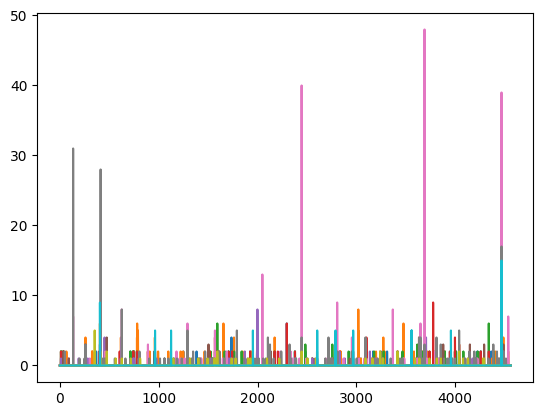

In [ ]:
plt.plot(X[:10, :].toarray().T)

In [ ]:
n_tokens = np.float32(np.sum(X[X.nonzero()]))

print(f"Number of tokens in training set = {n_tokens}")
print(
    "Sparsity = {}".format(len(X.nonzero()[0]) / float(X.shape[0] * X.shape[1]))
)

In [ ]:
!pip install pytensor
import pytensor
pytensor.config.floatX = "float32"

For this task, a document $d$ with tokens $w$, the log likelihood with $K$ latent topics is given by:
$$\log p(d|\theta_d,\beta)\propto\sum_{w\in d}\log\{\sum_{k=1}^K\exp(\log\theta_{d,k}+\log\beta_{k,w})\}$$

In [ ]:
def stick_breaking(u):
    """
    u: shape (batch_size, K-1)
    Returns a (batch_size, K) simplex.
    """
    one = pm.floatX(1)
    u = tt.clip(u, -10, 10)
    eps = 1e-8
    x = pm.math.sigmoid(u) * (1 - 2*eps) + eps  # shape (batch_size, K-1)

    # partial products for each "slice" of the stick
    # shape will be (batch_size, K-1)
    partial = tt.concatenate([
        tt.ones_like(x[:, [0]]),                 # shape (batch_size, 1)
        tt.cumprod(1 - x, axis=1)[:, :-1]        # shape (batch_size, K-2)
    ], axis=1)                                   # => (batch_size, K-1)

    # portion allocated to each of the first K-1 "pieces"
    portion = x * partial                       # shape (batch_size, K-1)

    # leftover is whatever remains for the final piece
    leftover = tt.cumprod(1 - x, axis=1)[:, -1:] # shape (batch_size, 1)

    # final shape = (batch_size, K)
    return tt.concatenate([portion, leftover], axis=1)



def logp_lda_doc(docs, beta, theta, n_tokens):
    """
    Custom log-density function for LDA documents.

    Parameters
    ----------
    docs : Pytensor tensor
        The observed document-term matrix.
    beta : Pytensor tensor
        Word distributions of shape (K, V).
    theta : Pytensor tensor
        Topic distributions for documents of shape (D, K).
    n_tokens : scalar
        A scaling constant (e.g. the total number of tokens in the dataset).

    Returns
    -------
    logp_val : Pytensor tensor
        The computed log likelihood.
    """
    # Identify the nonzero indices in the document-term matrix.
    dixs, vixs = tt.nonzero(docs)
    # Extract the corresponding word frequencies.
    vfreqs = docs[dixs, vixs]
    # Compute the logarithm for the relevant rows in theta and corresponding words in beta.
    log_theta = tt.log(tt.clip(theta[dixs], 1e-6, 1.0))
    log_beta = tt.log(tt.clip(beta.T[vixs], 1e-6, 1.0))
    # Numerically stable sum over topics.
    log_p = log_theta + log_beta
    max_log_p = tt.max(log_p, axis=1, keepdims=True)
    log_sum_exp = max_log_p + tt.log(tt.sum(tt.exp(log_p - max_log_p), axis=1,
                                            keepdims=True))
    # Compute the per-document contribution scaled by word frequencies.
    ll_docs = vfreqs * log_sum_exp.flatten()
    total_ll = tt.sum(ll_docs)
    # return total_ll
    avg_ll = total_ll / (tt.sum(vfreqs) + 1e-6)
    # Compute the average per-word log-likelihood, then scale by n_tokens.
    return avg_ll * n_tokens

In [ ]:
def relu(x):
    return tt.switch(tt.lt(x, 0), 0.0, x)

class LDAEncoder:
    """
    Feed‑forward encoder that maps a TF‑vector (optionally concatenated
    with a sentence embedding) to
        μ ∈ ℝ^{D×(K−1)}, ρ ∈ ℝ^{D×(K−1)}
    for stick‑breaking logistic‑normal topics.
    """

    def __init__(self, n_words, n_topics, dims=(512, 512, 256, 128),
                 dropout=0.2, pretrained_sent=None, seed=42):
        rng_np     = np.random.default_rng(seed)
        self.rng   = RandomStream(seed=seed)
        self.n_top = n_topics
        self.drop  = dropout
        in_dim     = n_words + (pretrained_sent or 0)

        # Xavier–uniform helper
        def xavier(fan_in, fan_out):
            bound = np.sqrt(6.0 / (fan_in + fan_out))
            return rng_np.uniform(-bound, bound, size=(fan_in,
                                                       fan_out)).astype("float32")

        # Hidden layers (exclude output)
        self.W = [shared(xavier(in_dim if i == 0 else dims[i-1], d),
                         name=f"W{i}") for i, d in enumerate(dims)]
        self.b = [shared(np.zeros(d, dtype="float32"), name=f"b{i}")
                  for i, d in enumerate(dims)]

        # Output layer -> 2*(K‑1)
        out_width   = 2*(n_topics - 1)
        self.W_out  = shared(xavier(dims[-1], out_width), name="W_out")
        self.b_out  = shared(np.zeros(out_width, dtype="float32"), name="b_out")

        # cache for skip‑projections
        self.skip = {}
        all_dims = [in_dim] + list(dims)           # e.g. [1000, 512, 512, 256, 128]
        for start, end in zip(all_dims[:-2], all_dims[2:]):   # every two layers
            if start != end:                       # only when sizes differ
                key = (start, end)                 # pure ints – always hashable
                self.skip[key] = shared(xavier(start, end),
                                        name=f"P{start}_{end}")

    def proj(self, x, key):
        """
        Project `x` with the pre‑built matrix stored under `key = (in_dim, out_dim)`.
        No shape guessing, no symbolic keys.
        """
        if key[0] == key[1]:        # same width → identity
            return x
        return tt.dot(x, self.skip[key])

    def _proj_matrix(self, in_dim, out_dim):
        key = (int(in_dim), int(out_dim))           # evaluated at graph‑build time
        if key not in self.skip:
            mat = np.random.uniform(
                    low=-np.sqrt(6.0/(in_dim+out_dim)),
                    high=np.sqrt(6.0/(in_dim+out_dim)),
                    size=(in_dim, out_dim)).astype("float32")
            self.skip[key] = shared(mat, name=f"P{in_dim}_{out_dim}")
        return self.skip[key]

    # ---------- forward ----------
    def encode(self, xs, mask=None, sent_emb=None):
        if sent_emb is not None:
            xs = tt.concatenate([xs, sent_emb], axis=1)

        h, residual = xs, xs
        prev_dim = self.W[0].get_value().shape[0]          # = input width

        for i, (W, b) in enumerate(zip(self.W, self.b)):
            out_dim = W.get_value().shape[1]
            h = relu(tt.dot(h, W) + b)

            # (inverted) dropout
            if self.drop and (mask is not None):
                h = h * mask[:, :out_dim] / (1.0 - self.drop)

            # residual every two layers
            if i % 2 == 1:
                res_proj = self.proj(residual, (prev_dim, out_dim))
                h = h + res_proj
                residual = h
                prev_dim = out_dim                   # keep in sync

            # LayerNorm
            std = tt.std(h, axis=1, keepdims=True) + 1e-6
            h = (h - tt.mean(h, axis=1, keepdims=True)) / std

        # ----- output head -----
        z   = tt.dot(h, self.W_out) + self.b_out
        mu  = tt.tanh(z[:, :self.n_top - 1]) * 3.0
        rho = z[:, self.n_top - 1:]
        return {"mu": mu, "rho": rho}

    def get_params(self):
        return self.W + self.b + [self.W_out, self.b_out] + list(self.skip.values())

In [ ]:
n_topics = 15
n_words = X.shape[1]
n_samples = X.shape[0]
# we have sparse dataset. It's better to have dence batch so that all words accure there
minibatch_size = 128
# defining minibatch
doc_data = X.toarray().astype(np.float32)

encoder = LDAEncoder(n_words, n_topics)

In [ ]:
eta = np.float32(1e-4)  # set learning rate
s = shared(np.float32(eta), name="learning_rate")

def reduce_rate(approx, history, i):
    """
    Reduces the learning rate over time.

    Parameters
    ----------
    approx: pm.Approximation
        The current approximation object
    history: list
        A list containing the history of the objective function values
    i: int
        The current iteration number
    """
    # Use the current iteration (i.e. the global iteration index) to adjust the learning rate.
    iter_f = np.float32(i) # Use 'i' for iteration
    mb_f = np.float32(minibatch_size)
    one = np.float32(1.0)
    power = np.float32(0.7)
    new_value = np.float32(np.float32(eta) / ((iter_f / mb_f) + one) ** power)
    s.set_value(new_value)

# def update_dropout_mask(encoder, current_batch_size):
#     mask1 = np.random.binomial(
#         n=1,
#         p=1 - encoder.p_corruption,
#         size=(current_batch_size, encoder.n_hidden)
#     ).astype(np.float32)

#     mask2 = np.random.binomial(
#         n=1,
#         p=1 - encoder.p_corruption,
#         size=(current_batch_size, encoder.n_hidden2)
#     ).astype(np.float32)

#     if encoder.p_corruption > 0:
#         mask1 /= (1 - encoder.p_corruption)
#         mask2 /= (1 - encoder.p_corruption)

#     encoder.mask1.set_value(mask1)  # Update to mask1
#     encoder.mask2.set_value(mask2)  # Update to mask2

# def train_step(approx, hist, step):
#     current_batch_size = doc_t_minibatch.eval().shape[0]
#     update_dropout_mask(encoder, current_batch_size)

In [ ]:
init_mask = np.ones((minibatch_size, 512), dtype=np.float32)
# eta_per_topic = np.array([0.01, 0.4, 0.1, 0.05, 0.01, 0.2, 0.3, 0.5, 0.04, 0.06],
#                          dtype=np.float32)
# a_mat = np.repeat(eta_per_topic[:, None], n_words, axis=1)  # shape = (n_topics, n_words)

with pm.Model() as model:
    dropout_mask = pm.MutableData("dropout_mask", init_mask)
    docs = pm.Minibatch(doc_data, batch_size=minibatch_size)

    # 1) encoder forward pass
    enc = encoder.encode(docs, mask=dropout_mask)
    mu, rho = pm.floatX(enc["mu"]), pm.floatX(enc["rho"])

    # 2) Stick‑breaking parameters
    theta_stick = pm.Normal(
        "theta_stick",
        mu=mu,
        sigma=pm.math.log1pexp(rho) + 1e-4,
        shape=(minibatch_size, n_topics-1)
    )
    theta = stick_breaking(theta_stick)

    # 3) Global topics
    eta_base = 1
    beta = pm.Dirichlet("beta",
                        a=np.full((n_topics, n_words), eta_base, dtype=np.float32),
                        shape=(n_topics, n_words)
                        )
    # beta = pm.Dirichlet(
    #     "beta",
    #     a=a_mat,                   # now each row k has its own eta_shared[k]
    #     shape=(n_topics, n_words)
    # )
    # eta_base = pm.Gamma("eta_base", alpha=0.01, beta=0.01, shape=n_topics)
    # A = eta_base.reshape((n_topics, 1)) * tt.ones((1, n_words))
    # beta = pm.Dirichlet("beta", a=A, shape=(n_topics, n_words))

    # 4) minibatch likelihood
    doc_lengths = tt.sum(docs, axis=1)
    tokens_in_batch = tt.sum(doc_lengths)
    scale = n_tokens / tokens_in_batch
    pm.Potential("doc_ll", scale * logp_lda_doc(docs, beta, theta, 1.0))

    # 5) Diversity bonus
    # λ_div = pm.Data("λ_div", 50, mutable=True)
    λ_div = pm.LogNormal("λ_div", mu=50, sigma=5)
    beta_norm = beta / beta.sum(axis=1, keepdims=True)
    div_loss = pm.math.sum(tt.triu(beta_norm @ beta_norm.T, k=1))
    pm.Potential("diversity_loss", λ_div * (-div_loss))

    # 6) Tie local RV to encoder outputs
    local_rv = OrderedDict([(theta_stick, enc)])

    # 7) ADVI fit
    advi = pm.ADVI(
        local_rv = local_rv,
        more_obj_params = encoder.get_params(),
        obj_optimizer = pm.adam(learning_rate=s, epsilon=1e-8),
        total_grad_norm_constraint = 10,
    )
    inference = pm.fit(
        10000,
        method = advi,          # our configured instance
        callbacks = [reduce_rate],
        progressbar = True,
    )

Output()

In [ ]:
model

Text(0.5, 1.0, 'Variational inference learning curve')

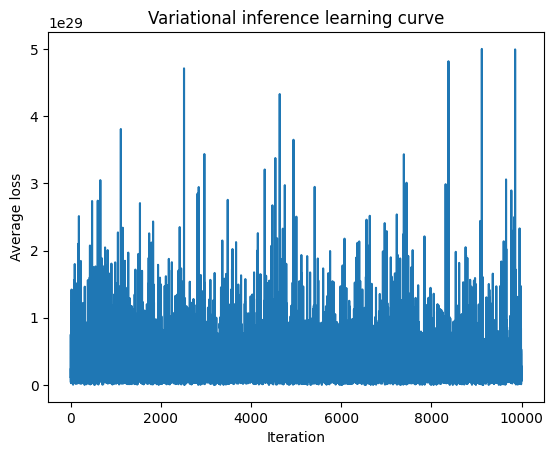

In [ ]:
plt.plot(inference.hist)
plt.xlabel("Iteration")
plt.ylabel("Average loss")
plt.title("Variational inference learning curve")

In [ ]:
def print_top_words(beta, feature_names, n_top_words=10):
    for i in range(len(beta)):
        print(
            ("Topic #%d: " % i)
            + " ".join([feature_names[j] for j in beta[i].argsort()[: -n_top_words-2 : -1]])
        )

doc_t=X.toarray()

idata = inference.sample(draws=100)
beta_pymc = idata.posterior["beta"].mean(axis=(0, 1))

print_top_words(beta_pymc, feature_names)

Topic #0: zip eating what extras hg recognition lager pig basis role report
Topic #1: zip weekly introduce yozakura assistance receive cambodia essence recruit rate mail
Topic #2: zip germany lincoln tribute pull regard cumbria session rat comedy height
Topic #3: zip tiene turtle freshness burma easter crime yellow scarborough yeast dog
Topic #4: zip colada conceive ecuador weave bhutan hygiene meaty stroll dumpling conservatory
Topic #5: zip surrounding midland cortado strive court bottling mystery accept oriental employer
Topic #6: zip stress blanc mauritius graham indicate oak margarita bramley catering important
Topic #7: zip thick seller express huge ice ambiente singular fully territory bottling
Topic #8: zip enjoyable thomas paste fashion winner hamper flair palate tart step
Topic #9: zip enquire haven walk grade mcnugget flour historical employer tuesday indonesia
Topic #10: zip execute stainless wash punch marry instead blue finesse baked cutlery
Topic #11: zip stretch degree 

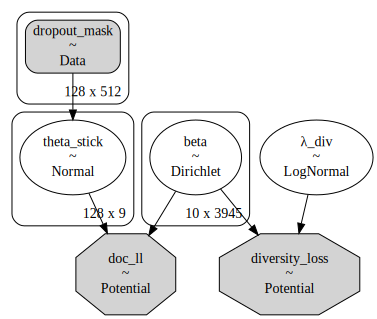

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
def calc_pp(ws, thetas, beta, wix):
    """
    Parameters
    ----------
    ws: ndarray (N,)
        Number of times the held-out word appeared in N documents.
    thetas: ndarray, shape=(N, K)
        Topic distributions for N documents.
    beta: ndarray, shape=(K, V)
        Word distributions for K topics.
    wix: int
        Index of the held-out word

    Return
    ------
    Log probability of held-out words.
    """
    return ws * np.log(thetas.dot(beta[:, wix]))


def eval_lda(transform, beta, docs_te, wixs):
    """Evaluate LDA model by log predictive probability.

    Parameters
    ----------
    transform: Python function
        Transform document vectors to posterior mean of topic proportions.
    wixs: iterable of int
        Word indices to be held-out.
    """
    lpss = []
    docs_ = deepcopy(docs_te)
    thetass = []
    wss = []
    total_words = 0
    for wix in wixs:
        ws = docs_te[:, wix].ravel()
        if 0 < ws.sum():
            # Hold-out
            docs_[:, wix] = 0

            # Topic distributions
            thetas = transform(docs_)

            # Predictive log probability
            lpss.append(calc_pp(ws, thetas, beta, wix))

            docs_[:, wix] = ws
            thetass.append(thetas)
            wss.append(ws)
            total_words += ws.sum()
        else:
            thetass.append(None)
            wss.append(None)

    # Log-probability
    lp = np.sum(np.hstack(lpss)) / total_words

    return {"lp": lp, "thetass": thetass, "beta": beta, "wss": wss}

For reference I also include the standard sklearn model, for computational speed and scalability, the final model will still use the `sklearn` model.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 15
alpha = 1 / n_topics
beta = 0.1
max_iter = 1000
random_state = 42
lda = LatentDirichletAllocation(
    n_components = n_topics,
    doc_topic_prior = alpha,
    topic_word_prior = beta,
    learning_method = "batch",
    max_iter = max_iter,
    evaluate_every = 5,            # re‑computes perplexity every 5 iters
    n_jobs = -1,
    random_state = random_state,
)
lda.fit(X)
doc_topic = lda.transform(X)
topic_word = lda.components_ / lda.components_.sum(axis=1, keepdims=True)

In [ ]:
def print_top_words_sklearn(lda, feature_names, n_top_words=10):
    for k, topic_vec in enumerate(lda.components_):
        top_idx = topic_vec.argsort()[-n_top_words:][::-1]
        words   = " | ".join(feature_names[i] for i in top_idx)
        print(f"Topic {k:2d}: {words}")

print_top_words_sklearn(lda, feature_names, n_top_words=10)

Topic  0: ps | price | email | regular | shop | address | free | sale | gin | farm
Topic  1: pm | coffee | cafe | de | saturday | monday | sunday | open | friday | hour
Topic  2: local | shop | brand | gift | community | whiskey | product | support | spirit | create
Topic  3: people | slot | di | box | add | yang | delivery | payment | papa | card
Topic  4: chicken | sauce | onion | serve | cook | spice | chip | fry | curry | rice
Topic  5: islands | island | republic | united | saint | south | guinea | new | congo | learn
Topic  6: slide | room | child | club | centre | park | hotel | adult | enjoy | area
Topic  7: malt | single | gin | whisky | purpose | use | cask | release | collection | access
Topic  8: guest | available | sushi | vegan | free | gluten | book | email | allergen | new
Topic  9: order | takeaway | want | online | pizza | eat | delivery | store | food | extra
Topic 10: food | restaurant | good | dish | experience | service | fresh | quality | great | enjoy
Topic 11: 

In [ ]:
# Use this function in the final model, computes predicted latent topic of new text
from scipy import sparse

def predict_topics(texts, top_n=3, return_probs=False):
    """
    Infer topic proportions for new documents.

    Parameters
    ----------
    texts : list[str] | scipy.sparse matrix
        Either a list/iterable of raw documents **or** a term‑frequency CSR matrix.
    top_n : int, default 3
        How many most‑probable topics to return for each document.
    return_probs : bool, default False
        If True, also return the full topic‑probability matrix.

    Returns
    -------
    preds : list[list[int]]
        For each document, a list of the top‑n topic indices (0‑based).
    probs : np.ndarray, optional
        `shape = (n_documents, n_topics)` matrix of topic probabilities.
        Only returned if `return_probs=True`.
    """
    if isinstance(texts, str):
        texts = [texts]

    if sparse.issparse(texts):
        X_new = texts
    else:
        X_new = tf_vectorizer.transform(texts)

    doc_topic_dist = lda.transform(X_new)        # rows sum to 1

    top_topics = np.argsort(-doc_topic_dist, axis=1)[:, :top_n]

    if return_probs:
        return top_topics.tolist(), doc_topic_dist
    return top_topics.tolist()

In [ ]:
# Computes JS divergence between 2 topic distributions, will be used for final model
from scipy.spatial.distance import jensenshannon

def js_divergence(p, q, base=2):
    """
    Jensen–Shannon divergence between two discrete distributions.

    Parameters
    ----------
    p, q : array‑like, shape (K,)
        Two probability vectors (will be renormalized defensively).
    base : int or float, default 2
        Logarithm base. 2 → divergence in bits; e → nats.

    Returns
    -------
    jsd : float
        Jensen–Shannon divergence D_JS(p‖q) ≥ 0.  (Not the square‑root distance.)
    """
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    p = p / p.sum()                    # roundoff error
    q = q / q.sum()

    js_distance = jensenshannon(p, q, base=base)
    return js_distance ** 2

In [ ]:
top_dict = {}
brand_first_10 = normalized_brand_txt[:10]
brand_names = brand_df['Product']
venue_names = venue_df['name']

_, venue_topic_matrix = predict_topics(
    normalized_venue_txt,    # a list of venue‑strings
    top_n=1,
    return_probs=True
)

for i, brand in enumerate(brand_first_10):
    print(f"Brand: {brand_names.iloc[i]}")
    _, brand_topic_dist = predict_topics([brand], top_n=1, return_probs=True)
    θ_brand = brand_topic_dist[0]
    js_scores = [
        js_divergence(θ_brand, θ_venue)
        for θ_venue in venue_topic_matrix
    ]

    best_idxs = sorted(
        range(len(js_scores)),
        key=lambda idx: js_scores[idx]
    )[:10]

    best_venue_names = [venue_names.iloc[j] for j in best_idxs]

    top_dict[brand_names.iloc[i]] = best_venue_names

    print("Top 10 similar venues:")
    for name, score in zip(best_venue_names, [js_scores[j] for j in best_idxs]):
        print(f"  {name}  (JS = {score:.4f})")
    print()


In [ ]:
import pickle

# save
with open('/content/drive/MyDrive/Capstone/lda_model.pkl','wb') as f:
    pickle.dump(lda,f)

In [ ]:
import pickle
lda = pickle.load(open("/content/drive/MyDrive/Capstone/lda_model.pkl", 'rb'))

In [ ]:
with open('/content/drive/MyDrive/Capstone/tf_vectorizer.pkl','wb') as f:
    pickle.dump(tf_vectorizer,f)

In [ ]:
tf_vectorizer = pickle.load(open("/content/drive/MyDrive/Capstone/tf_vectorizer.pkl", 'rb'))

## Sentence BERT Embedding
The second part of the model is to fine-tune a BERT model on our text data, with only the encoder. We will then obtain an informative word vector for each text.

In [ ]:
 pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 26.0 MB/s eta 0:00:00


In [ ]:
 pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import re
import emoji
from unidecode import unidecode

url_pattern       = re.compile(r'https?://[^\s]+', re.IGNORECASE)
email_pattern     = re.compile(r'\b[\w\.-]+@[\w\.-]+\.\w+\b')
phone_pattern     = re.compile(r'((\+?\d{1,2}[-.\s]?)?(\(?\d{3}\)?[-.\s]?)\d{3}[-.\s]?\d{4})')
html_tag_pattern  = re.compile(r'<[^>]+>')
split_regex       = re.compile(r'(?<!\b\w\.\w\.)[.?!]\s+')
number_pattern    = re.compile(r"\d+")

def clean_for_sbert(text: str,
                   drop_numbers: bool = True,
                   irrelevant_phrases: list = None) -> str:
    # 1. Null check
    if not text or not text.strip():
        return ""
    # 2. Remove URLs, emails, phones, HTML
    text = url_pattern.sub(" ", text)
    text = email_pattern.sub(" ", text)
    text = phone_pattern.sub(" ", text)
    text = html_tag_pattern.sub(" ", text)
    # 3. Remove custom irrelevant phrases
    if irrelevant_phrases:
        for p in irrelevant_phrases:
            text = re.sub(r'\b' + re.escape(p) + r'\b', " ", text, flags=re.IGNORECASE)
    # 4. Remove emojis
    text = emoji.replace_emoji(text, replace="")
    # 5. Split into sentences & drop any sentence still containing noise
    sentences = split_regex.split(text)
    cleaned_sents = []
    for s in sentences:
        s = s.strip()
        if not s:
            continue
        # if any of our patterns still in the sentence, skip it
        if (url_pattern.search(s)
            or email_pattern.search(s)
            or phone_pattern.search(s)
            or html_tag_pattern.search(s)):
            continue
        cleaned_sents.append(s)
    # 6. Re‑join, optionally strip numbers
    joined = " ".join(cleaned_sents)
    if drop_numbers:
        joined = number_pattern.sub("", joined)
    # 7. Remove accents
    joined = unidecode(joined)
    # 8. Collapse whitespace
    joined = re.sub(r'\s+', " ", joined).strip()
    return joined

irrelevant_phrases = ["cookies", "subscribe"]
# Apply lists:
cleaned_brand_txt_sbert = [clean_for_sbert(t, True, irrelevant_phrases) for t in brand_txt]
cleaned_venue_txt_sbert = [clean_for_sbert(t, True, irrelevant_phrases) for t in venue_txt]

all_txt_sbert = cleaned_brand_txt_sbert + cleaned_venue_txt_sbert

In [ ]:
all_txt_sbert[:3]

["'s COSMO Play Video The zippy, more refreshing, Prohibition era version of the cult classic Crafted with London Dry Gin, Triple Sec, lemon juice and raspberry flavoured syrup CL | % ABV Method Pour mls into a cocktail shaker, add ice, shake well, strain into a chilled martini glass Garnish with a lemon twist Taste Profile Sour, sweet and fruity Serving Notes Clean lemon, jammy berry, finished with well composed hint of gin The zippy, more refreshing, Prohibition era version of the cult classic Crafted with London Dry Gin, Triple Sec, lemon juice and raspberry flavoured syrup CL | % ABV Pour mls into a cocktail shaker, add ice, shake well, strain into a chilled martini glass Garnish with a lemon twist Sour, sweet and fruity Clean lemon, jammy berry, finished with well composed hint of gin.",
 'PINA COLADA Play Video The classic summer cocktail, with zingy pineapple, blended with sweet coconut and Caribbean white rum CL | % ABV Method Born on the beaches of Puerto Rico the Pina Colada 

We will compare 3 strategies: **contrastive learning** with data augmentation and TSDAE (Denoising Autoencoder).

In [ ]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
 pip install datasets

  Using cached datasets-3.5.0-py3-none-any.whl.metadata (19 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
from sentence_transformers import SentenceTransformer, InputExample
from sentence_transformers import models, losses
from torch.utils.data import Dataset, DataLoader
from sentence_transformers.datasets import DenoisingAutoEncoderDataset
import datasets
from datasets import Dataset, DatasetDict

In [ ]:
# No augmentation
model_name = 'sentence-transformers/all-mpnet-base-v2'
word_embedding_model1 = models.Transformer(model_name, max_seq_length=64)
pooling_model1 = models.Pooling(word_embedding_model1.get_word_embedding_dimension())
model1 = SentenceTransformer(modules=[word_embedding_model1, pooling_model1])
train_examples = [InputExample(texts=[s, s]) for s in all_txt_sbert]
train_dataloader = DataLoader(train_examples, batch_size=128, shuffle=True)
train_loss = losses.MultipleNegativesRankingLoss(model1)
model1.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=1,
    show_progress_bar=True
)

In [ ]:
# Save both the Transformer and pooling heads so you can reload with SentenceTransformer()
model1.save_pretrained('/content/drive/MyDrive/model1/')

In [ ]:
# del model1

In [ ]:
model1 = SentenceTransformer("/content/drive/MyDrive/Capstone/model1")

In [ ]:
brand_embeddings1 = model1.encode(brand_txt, normalize_embeddings=True)
venue_embeddings1 = model1.encode(venue_txt, normalize_embeddings=True)

In [ ]:
from sentence_transformers import util

brand_names = brand_df['Product']
venue_names = venue_df['name']

# Find top-10 venue matches for each brand
hits = util.semantic_search(brand_embeddings1, venue_embeddings1, top_k=10)
for i, brand_hits in enumerate(hits):
  if i <= 10:
    print(f"Brand: {brand_names[i]}")
    for hit in brand_hits:
        venue_id = hit['corpus_id']
        score = hit['score']
        print(f"  -> Similar Venue: {venue_names[venue_id]} (score={score:.4f})")
    print()
  else:
    break

Brand: MR L'S 1930'S COSMO 15% 70CL
  -> Similar Venue: Yurt Lush (score=0.4906)
  -> Similar Venue: Freemasons Arms (score=0.4489)
  -> Similar Venue: Three Horseshoes (score=0.4489)
  -> Similar Venue: Officer's Mess (score=0.4444)
  -> Similar Venue: Gin and Olive Southsea (score=0.4223)
  -> Similar Venue: The Barbican Botanics Gin Room (score=0.4151)
  -> Similar Venue: The Brass Monkey (score=0.4095)
  -> Similar Venue: The George Hotel (score=0.3989)
  -> Similar Venue: Shafton Village Working Mens Club (score=0.3948)
  -> Similar Venue: The Ginistry (score=0.3802)

Brand: MR L'S PINA COLADA 15% 70CL
  -> Similar Venue: Yurt Lush (score=0.4702)
  -> Similar Venue: Kite Surf Cafe (score=0.3741)
  -> Similar Venue: Elsewhere (score=0.3715)
  -> Similar Venue: Puccino (score=0.3601)
  -> Similar Venue: Pepitos Restaurant (score=0.3533)
  -> Similar Venue: Coffee#1 Thornbury (score=0.3434)
  -> Similar Venue: Rios Piri Piri Hamilton (score=0.3257)
  -> Similar Venue: Potters Heron P

## Scoring Metric

In [ ]:
import numpy as np
import torch
from typing import List, Tuple, Callable
from sentence_transformers import util, SentenceTransformer

brand_names = brand_df['Product']
venue_names = venue_df['name']
venues_sbert = [clean_for_sbert(v, True, irrelevant_phrases) for v in venue_txt]
venue_embs  = model1.encode(venues_sbert, convert_to_tensor=True)       # shape (N, D)

In [ ]:
def rank_venues_by_metric(
    brand: str,
    venues: List[str],
    venue_embs,
    embedding_model: SentenceTransformer,
    predict_topics_fn: Callable[[List[str], int, bool], Tuple[List, np.ndarray]],
    js_divergence_fn: Callable[[np.ndarray, np.ndarray], float],
    top_k: int = 10
) -> List[Tuple[str, float]]:
    """
    Rank venues based on a custom metric combining JS divergence and cosine similarity.

    Parameters
    ----------
    brand : str
        The brand description to compare.
    venues : List[str]
        A list of venue descriptions.
    embedding_model : SentenceTransformer
        Pretrained embedding model with `.encode()` and `util.cos_sim()`.
    predict_topics_fn : Callable
        Function with signature
            predict_topics_fn(docs: List[str], top_n: int, return_probs: bool)
        that returns (topic_ids, topic_prob_matrix).
    js_divergence_fn : Callable
        Function to compute JS divergence between two prob. vectors.
    top_k : int, default=10
        Number of top venues to return.

    Returns
    -------
    List of (venue_string, score), sorted by descending score.
    """
    # Embed brand and venues
    brand_sbert = clean_for_sbert(brand, True, irrelevant_phrases)
    brand_emb   = embedding_model.encode(brand_sbert,  convert_to_tensor=True)       # shape (D,)

    # Get topic distributions
    _, θ_brand  = predict_topics_fn([brand], top_n=1, return_probs=True)       # θ_brand shape (1, K)
    θ_brand     = θ_brand[0]                                                   # shape (K,)
    _, θ_venues = predict_topics_fn(venues, top_n=1, return_probs=True)       # θ_venues shape (N, K)

    # Compute cosine similarities
    cos_scores = util.cos_sim(brand_emb, venue_embs)   # shape (1, N)
    cos_scores = cos_scores.squeeze(0).cpu().numpy()  # shape (N,)

    # Compute JS divergences
    js_scores = np.array([js_divergence_fn(θ_brand, θ_v) for θ_v in θ_venues])  # shape (N,)

    # Combine into custom metric
    custom_scores = ((1.0 - js_scores) + 3.0 * cos_scores) / 4.0                  # shape (N,)

    # Select top k
    top_idxs = np.argsort(custom_scores)[::-1][:top_k].tolist()

    return [(venue_names[i], float(custom_scores[i]), i) for i in top_idxs]

In [ ]:
from random import sample
import random

idx = sample(range(len(brand_txt)), 10)
brand_txt_sample = [normalized_brand_txt[i] for i in idx]
for i, brand in enumerate(brand_txt_sample):
    print(f"Brand: {brand_names[idx[i]]}")
    top_venues = rank_venues_by_metric(
        brand,
        normalized_venue_txt,
        venue_embs,
        model1,
        predict_topics,
        js_divergence,
        top_k=10
    )
    for venue, score, i in top_venues:
        print(f"  -> Similar Venue: {venue} (score={score:.4f}) (id:{i})")
    print()

Brand: GLENFIDDICH FIRE & CANE 43% 70CL
  -> Similar Venue: Yurt Lush (score=0.4876) (id:1881)
  -> Similar Venue: Euro Coffee House (score=0.4516) (id:237)
  -> Similar Venue: Spice Club (score=0.4331) (id:1774)
  -> Similar Venue: Southsea Local (score=0.4221) (id:2036)
  -> Similar Venue: The Barbican Botanics Gin Room (score=0.4138) (id:621)
  -> Similar Venue: Freemasons Arms (score=0.4059) (id:1197)
  -> Similar Venue: The Shenai (score=0.4043) (id:1679)
  -> Similar Venue: The Chocolate Bar (score=0.4015) (id:139)
  -> Similar Venue: Three Horseshoes (score=0.4011) (id:665)
  -> Similar Venue: Knoops (score=0.3964) (id:1457)

Brand: BAYOU GATOR BITE SATSUMA RUM LIQUEUR 30%
  -> Similar Venue: The Barbican Botanics Gin Room (score=0.4490) (id:621)
  -> Similar Venue: The Firsty Foal - Gin Tastings Hampshire (score=0.4193) (id:1383)
  -> Similar Venue: O’Briens Beer Café (score=0.3950) (id:799)
  -> Similar Venue: The Cocktail Club - Corn Street Bristol (score=0.3656) (id:1180)
  

In [ ]:
brands_sbert = [clean_for_sbert(v, True, irrelevant_phrases) for v in brand_txt]
brand_embs  = model1.encode(brands_sbert, convert_to_tensor=True)

In [ ]:
idx2 = sample(range(len(venue_txt)), 10)
venue_txt_sample = [normalized_venue_txt[i] for i in idx2]
for i, venue in enumerate(venue_txt_sample):
    print(f"Venue: {venue_names[idx2[i]]}")
    top_brands = rank_venues_by_metric(
        venue,
        normalized_brand_txt,
        brand_embs,
        model1,
        predict_topics,
        js_divergence,
        top_k=10
    )
    for _, score, i in top_brands:
        print(f"  -> Similar Brand: {brand_names[i]} (score={score:.4f}) (id:{i})")
    print()

Venue: Direct Pizza
  -> Similar Brand: MERCHANTS CHOICE GIN 40% 70CL (score=0.3260) (id:463)
  -> Similar Brand: MASON'S YORKSHIRE GIN 42% 70CL (score=0.3108) (id:455)
  -> Similar Brand: MASONS FRUIT OF THE TROPIC 38% 70CL (score=0.3108) (id:456)
  -> Similar Brand: MASON'S PINK GRAPEFRUIT AND CUCUMBER GIN (score=0.3108) (id:454)
  -> Similar Brand: LIVERPOOL ORGANIC GIN 46% 70CL (score=0.3043) (id:438)
  -> Similar Brand: FROGS LIP GIN 47% 70CL (score=0.2931) (id:373)
  -> Similar Brand: BLACK TOT LAST CONSIGNMENT RUM 54.3% 70CL (score=0.2834) (id:566)
  -> Similar Brand: BLACK TOT FINEST CARIBEAN RUM 46.2% 70CL (score=0.2834) (id:565)
  -> Similar Brand: BLACK TOT BLENDERS RESERVE RUM 54.5% 70CL (score=0.2834) (id:564)
  -> Similar Brand: DOWNTON ABBEY PREMIUM GIN 40% 70CL (score=0.2749) (id:343)

Venue: Black Dog Deli Saxmundham
  -> Similar Brand: BLACK TOT LAST CONSIGNMENT RUM 54.3% 70CL (score=0.3963) (id:566)
  -> Similar Brand: BLACK TOT FINEST CARIBEAN RUM 46.2% 70CL (score=